In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import glob
from IPython.display import display, HTML
from pandas import Series, DataFrame

In [2]:
gu = pd.DataFrame({'Category': ['Average Heart Rate', 'Average Pace', 'Average Speed', 'Calories Total', 'Distance', 'Duration Total', 'Elevation Gain', 'Total Ascent Gradient', 'Total Descent Gradient', 'Weather'], 
                   'Unit': ['bpm', 'spk', 'kph', 'kcal', 'km', 'sec', 'm', 'km', 'km', 'Celsius']}).set_index('Category')
gu_script = gu.to_html()
gu #gw4 unit
#print(gu_script)

,Unit
Category,
Average Heart Rate,bpm
Average Pace,spk
Average Speed,kph
Calories Total,kcal
Distance,km
Duration Total,sec
Elevation Gain,m
Total Ascent Gradient,km
Total Descent Gradient,km


In [81]:
glist = [] #gw4 list of dataframes
for ggather in glob.glob('data/*_gw4.csv'): #gw4 gather records
    print(f'Loading {ggather}')
    gmerged = pd.read_csv(ggather, parse_dates=["Date"]).sort_index() #gw4 merged records
    glist.append(gmerged)

print('Number of Files Loaded: ',len(glist))

gt = pd.concat(glist).set_index('Date') #gw4 total
gst = gt.reindex(sorted(gt.columns), axis=1) #gw4 sorted total
gst.tail()

Loading data\02072024_gw4.csv
Loading data\02142024_gw4.csv
Loading data\02212024_gw4.csv
Loading data\03202024_gw4.csv
Loading data\04032024_gw4.csv
Loading data\04172024_gw4.csv
Loading data\05082024_gw4.csv
Loading data\05152024_gw4.csv
Loading data\05202024_gw4.csv
Loading data\05222024_gw4.csv
Loading data\05272024_gw4.csv
Loading data\05292024_gw4.csv
Loading data\06032024_gw4.csv
Loading data\06052024_gw4.csv
Loading data\06112024_gw4.csv
Loading data\06172024_gw4.csv
Loading data\06192024_gw4.csv
Loading data\06242024_gw4.csv
Number of Files Loaded:  18


,Average Heart Rate,Average Pace,Average Speed,Calories Total,Distance,Duration Total,Elevation Gain,Purpose,Total Ascent Gradient,Total Descent Gradient,Weather
Date,,,,,,,,,,,
2024-06-11,157.0,200,17.9,1386,33.93,14335,91.0,Training,0.76,0.61,28.0
2024-06-17,NaN,239,15.0,1294,38.95,13388,134.0,Training,0.95,0.88,28.0
2024-06-19,NaN,227,15.8,269,7.99,1819,45.0,Bike to Work,0.37,0.20,32.0
2024-06-19,NaN,269,13.3,236,7.37,1985,28.0,Home from Work,0.04,0.30,31.0
2024-06-24,NaN,229,15.7,1835,57.83,16986,180.0,Training,0.82,1.18,27.0


In [4]:
dg = gst.groupby("Purpose") #draft group
gg = dg.size().reset_index().rename(columns={0: 'Count'}) #gw4 group
tc = gg['Count'].sum() #total count

gc = pd.DataFrame({'Inventory' : ['Total Records', 'Files Loaded'], 'Count' : [tc, len(glist)]}).set_index('Inventory')
gc #gw4 count
gc_script = gc.to_html()
#print(gc_script)
print(gg)
print(gc)

          Purpose  Count
0    Bike to Mall      1
1    Bike to Work     11
2  Home from Mall      1
3  Home from Work     11
4        Training      6
               Count
Inventory           
Total Records     30
Files Loaded      18


In [5]:
gave = pd.pivot_table(data=gst,index='Purpose').round(2).fillna(0)
gave.columns = pd.MultiIndex.from_product([['Ave'], ["Average Heart Rate", "Average Pace", "Average Speed", "Calories Total", "Distance", "Duration Total", "Elevation Gain", "Total Ascent Gradient", "Total Descent Gradient", "Weather"]])
gave_script = gave.to_html()
#gave_script
gave #gw4 average per purpose

Ave                                            \
               Average Heart Rate Average Pace Average Speed Calories Total   
Purpose                                                                       
Bike to Mall                  0.0       272.00         13.20         121.00   
Bike to Work                151.0       270.82         13.71         245.27   
Home from Mall                0.0       209.00         17.20         121.00   
Home from Work              145.4       233.64         15.49         187.09   
Training                    153.5       245.33         15.30        1446.33   

                                                                             \
               Distance Duration Total Elevation Gain Total Ascent Gradient   
Purpose                                                                       
Bike to Mall       3.25        1120.00          59.00                  0.27   
Bike to Work       5.40        1737.91          33.64                  0.27   
Home from Mall     3.04         899.00           0.00                  0.00   
Home from Work     4.40        1392.91          26.91                  0.01   
Training          35.34       12176.33         111.00                  0.69   

                                               
               Total Descent Gradient Weather  
Purpose                                        
Bike to Mall                     0.00    36.0  
Bike to Work                     0.07    31.5  
Home from Mall                   0.30    32.0  
Home from Work                   0.28    30.2  
Training                         0.91    28.5

In [6]:
gsum = gst[["Calories Total", "Distance", "Duration Total", "Elevation Gain", "Total Ascent Gradient", "Total Descent Gradient"]].sum().reset_index().rename(columns={0: 'Sum', 'index': 'Category'}).round(2).set_index('Category')
gsum_script = gsum.to_html()
#gsum_script
gsum #gw4 sum all purpose

,Sum
Category,
Calories Total,13676.00
Distance,326.09
Duration Total,109516.00
Elevation Gain,1391.00
Total Ascent Gradient,7.52
Total Descent Gradient,9.52


In [7]:
p1 = dg.get_group("Bike to Mall").set_index('Purpose')
gminp1 = p1[["Average Heart Rate", "Average Pace", "Average Speed", "Calories Total", "Distance", "Duration Total", "Elevation Gain", "Total Ascent Gradient", "Total Descent Gradient", "Weather"]].min().reset_index().rename(columns={0: 'Bike to Mall', 'index': 'Category'}).round(2).set_index('Category') #gw4 min bike to mall purpose
p2 = dg.get_group("Bike to Work").set_index('Purpose')
gminp2 = p2[["Average Heart Rate", "Average Pace", "Average Speed", "Calories Total", "Distance", "Duration Total", "Elevation Gain", "Total Ascent Gradient", "Total Descent Gradient", "Weather"]].min().reset_index().rename(columns={0: 'Bike to Work', 'index': 'Category'}).round(2).set_index('Category') #gw4 min bike to work purpose
p3 = dg.get_group("Home from Mall").set_index('Purpose')
gminp3 = p3[["Average Heart Rate", "Average Pace", "Average Speed", "Calories Total", "Distance", "Duration Total", "Elevation Gain", "Total Ascent Gradient", "Total Descent Gradient", "Weather"]].min().reset_index().rename(columns={0: "Home from Mall", 'index': 'Category'}).round(2).set_index('Category') #gw4 min home from mall purpose
p4 = dg.get_group("Home from Work").set_index('Purpose')
gminp4 = p4[["Average Heart Rate", "Average Pace", "Average Speed", "Calories Total", "Distance", "Duration Total", "Elevation Gain", "Total Ascent Gradient", "Total Descent Gradient", "Weather"]].min().reset_index().rename(columns={0: "Home from Work", 'index': 'Category'}).round(2).set_index('Category') #gw4 min home from work purpose
p5 = dg.get_group("Training").set_index('Purpose')
gminp5 = p5[["Average Heart Rate", "Average Pace", "Average Speed", "Calories Total", "Distance", "Duration Total", "Elevation Gain", "Total Ascent Gradient", "Total Descent Gradient", "Weather"]].min().reset_index().rename(columns={0: 'Training', 'index': 'Category'}).round(2).set_index('Category') #gw4 min training purpose
gminlist = [gminp1, gminp2, gminp3, gminp4, gminp5]
gmint = pd.concat(gminlist, axis=1).fillna(0)
gmint.columns = pd.MultiIndex.from_product([['Min'], ["Bike to Mall", "Bike to Work", "Home from Mall", "Home from Work", "Training"]])
gmint #gw4 min total

p1 = dg.get_group("Bike to Mall").set_index('Purpose')
gmaxp1 = p1[["Average Heart Rate", "Average Pace", "Average Speed", "Calories Total", "Distance", "Duration Total", "Elevation Gain", "Total Ascent Gradient", "Total Descent Gradient", "Weather"]].max().reset_index().rename(columns={0: 'Bike to Mall', 'index': 'Category'}).round(2).set_index('Category') #gw4 max bike to mall purpose
p2 = dg.get_group("Bike to Work").set_index('Purpose')
gmaxp2 = p2[["Average Heart Rate", "Average Pace", "Average Speed", "Calories Total", "Distance", "Duration Total", "Elevation Gain", "Total Ascent Gradient", "Total Descent Gradient", "Weather"]].max().reset_index().rename(columns={0: 'Bike to Work', 'index': 'Category'}).round(2).set_index('Category') #gw4 max bike to work purpose
p3 = dg.get_group("Home from Mall").set_index('Purpose')
gmaxp3 = p3[["Average Heart Rate", "Average Pace", "Average Speed", "Calories Total", "Distance", "Duration Total", "Elevation Gain", "Total Ascent Gradient", "Total Descent Gradient", "Weather"]].max().reset_index().rename(columns={0: "Home from Mall", 'index': 'Category'}).round(2).set_index('Category') #gw4 max home from mall purpose
p4 = dg.get_group("Home from Work").set_index('Purpose')
gmaxp4 = p4[["Average Heart Rate", "Average Pace", "Average Speed", "Calories Total", "Distance", "Duration Total", "Elevation Gain", "Total Ascent Gradient", "Total Descent Gradient", "Weather"]].max().reset_index().rename(columns={0: "Home from Work", 'index': 'Category'}).round(2).set_index('Category') #gw4 max home from work purpose
p5 = dg.get_group("Training").set_index('Purpose')
gmaxp5 = p5[["Average Heart Rate", "Average Pace", "Average Speed", "Calories Total", "Distance", "Duration Total", "Elevation Gain", "Total Ascent Gradient", "Total Descent Gradient", "Weather"]].max().reset_index().rename(columns={0: 'Training', 'index': 'Category'}).round(2).set_index('Category') #gw4 max training purpose
gmaxlist = [gmaxp1, gmaxp2, gmaxp3, gmaxp4, gmaxp5]
gmaxt = pd.concat(gmaxlist, axis=1).fillna(0)
gmaxt.columns = pd.MultiIndex.from_product([['Max'], ["Bike to Mall", "Bike to Work", "Home from Mall", "Home from Work", "Training"]])
gmaxt #gw4 max total

gminmax = pd.concat ([gmint, gmaxt], axis=1)
gminmax_script = gminmax.to_html()
#gminmax_script
gminmax

Min                              \
                       Bike to Mall Bike to Work Home from Mall   
Category                                                          
Average Heart Rate             0.00       111.00           0.00   
Average Pace                 272.00       207.00         209.00   
Average Speed                 13.20         8.50          17.20   
Calories Total               121.00       170.00         121.00   
Distance                       3.25         4.10           3.04   
Duration Total              1120.00      1350.00         899.00   
Elevation Gain                59.00        30.00           0.00   
Total Ascent Gradient          0.27         0.10           0.00   
Total Descent Gradient         0.00         0.01           0.30   
Weather                       36.00        28.00          32.00   

                                                        Max               \
                       Home from Work Training Bike to Mall Bike to Work   
Category                                                                   
Average Heart Rate             140.00   131.00         0.00       168.00   
Average Pace                   195.00   200.00       272.00       418.00   
Average Speed                   13.30    11.50        13.20        17.30   
Calories Total                 146.00  1228.00       121.00       353.00   
Distance                         4.01    25.11         3.25         7.99   
Duration Total                1069.00  8330.00      1120.00      2158.00   
Elevation Gain                  10.00    75.00        59.00        45.00   
Total Ascent Gradient            0.00     0.43         0.27         0.37   
Total Descent Gradient           0.23     0.61         0.00         0.20   
Weather                         27.00    27.00        36.00        34.00   

                                                                
                       Home from Mall Home from Work  Training  
Category                                                        
Average Heart Rate               0.00         151.00    165.00  
Average Pace                   209.00         269.00    310.00  
Average Speed                   17.20          18.30     17.90  
Calories Total                 121.00         236.00   1835.00  
Distance                         3.04           7.37     57.83  
Duration Total                 899.00        1985.00  16986.00  
Elevation Gain                   0.00          58.00    180.00  
Total Ascent Gradient            0.00           0.05      0.95  
Total Descent Gradient           0.30           0.31      1.18  
Weather                         32.00          33.00     32.00

In [8]:
ahr_btm = gst.loc[gst["Purpose"] == "Bike to Mall"].loc[:,"Average Heart Rate"]
ahr_btmd = ahr_btm.to_frame(name="Bike to Mall")
ahr_btw = gst.loc[gst["Purpose"] == "Bike to Work"].loc[:,"Average Heart Rate"]
ahr_btwd = ahr_btw.to_frame(name="Bike to Work")
ahr_hfm = gst.loc[gst["Purpose"] == "Home from Mall"].loc[:,"Average Heart Rate"]
ahr_hfmd = ahr_hfm.to_frame(name="Home from Mall")
ahr_hfw = gst.loc[gst["Purpose"] == "Home from Work"].loc[:,"Average Heart Rate"]
ahr_hfwd = ahr_hfw.to_frame(name="Home from Work")
ahr_tra = gst.loc[gst["Purpose"] == "Training"].loc[:,"Average Heart Rate"]
ahr_trad = ahr_tra.to_frame(name="Training")
ahrlist = [ahr_btmd, ahr_btwd, ahr_hfmd, ahr_hfwd, ahr_trad]
ahrt = pd.concat(ahrlist, axis=1).fillna(0)
ahrt.columns = pd.MultiIndex.from_product([["Average Heart Rate"], ["Bike to Mall", "Bike to Work", "Home from Mall", "Home from Work", "Training"]])
ahrt.head() #average heart rate total

Average Heart Rate                                             \
                 Bike to Mall Bike to Work Home from Mall Home from Work   
Date                                                                       
2024-02-07                0.0          0.0            0.0            0.0   
2024-02-14                0.0          0.0            0.0            0.0   
2024-02-21                0.0          0.0            0.0            0.0   
2024-03-20                0.0        153.0            0.0          146.0   
2024-04-03                0.0        111.0            0.0            0.0   

                     
           Training  
Date                 
2024-02-07      0.0  
2024-02-14      0.0  
2024-02-21      0.0  
2024-03-20      0.0  
2024-04-03      0.0

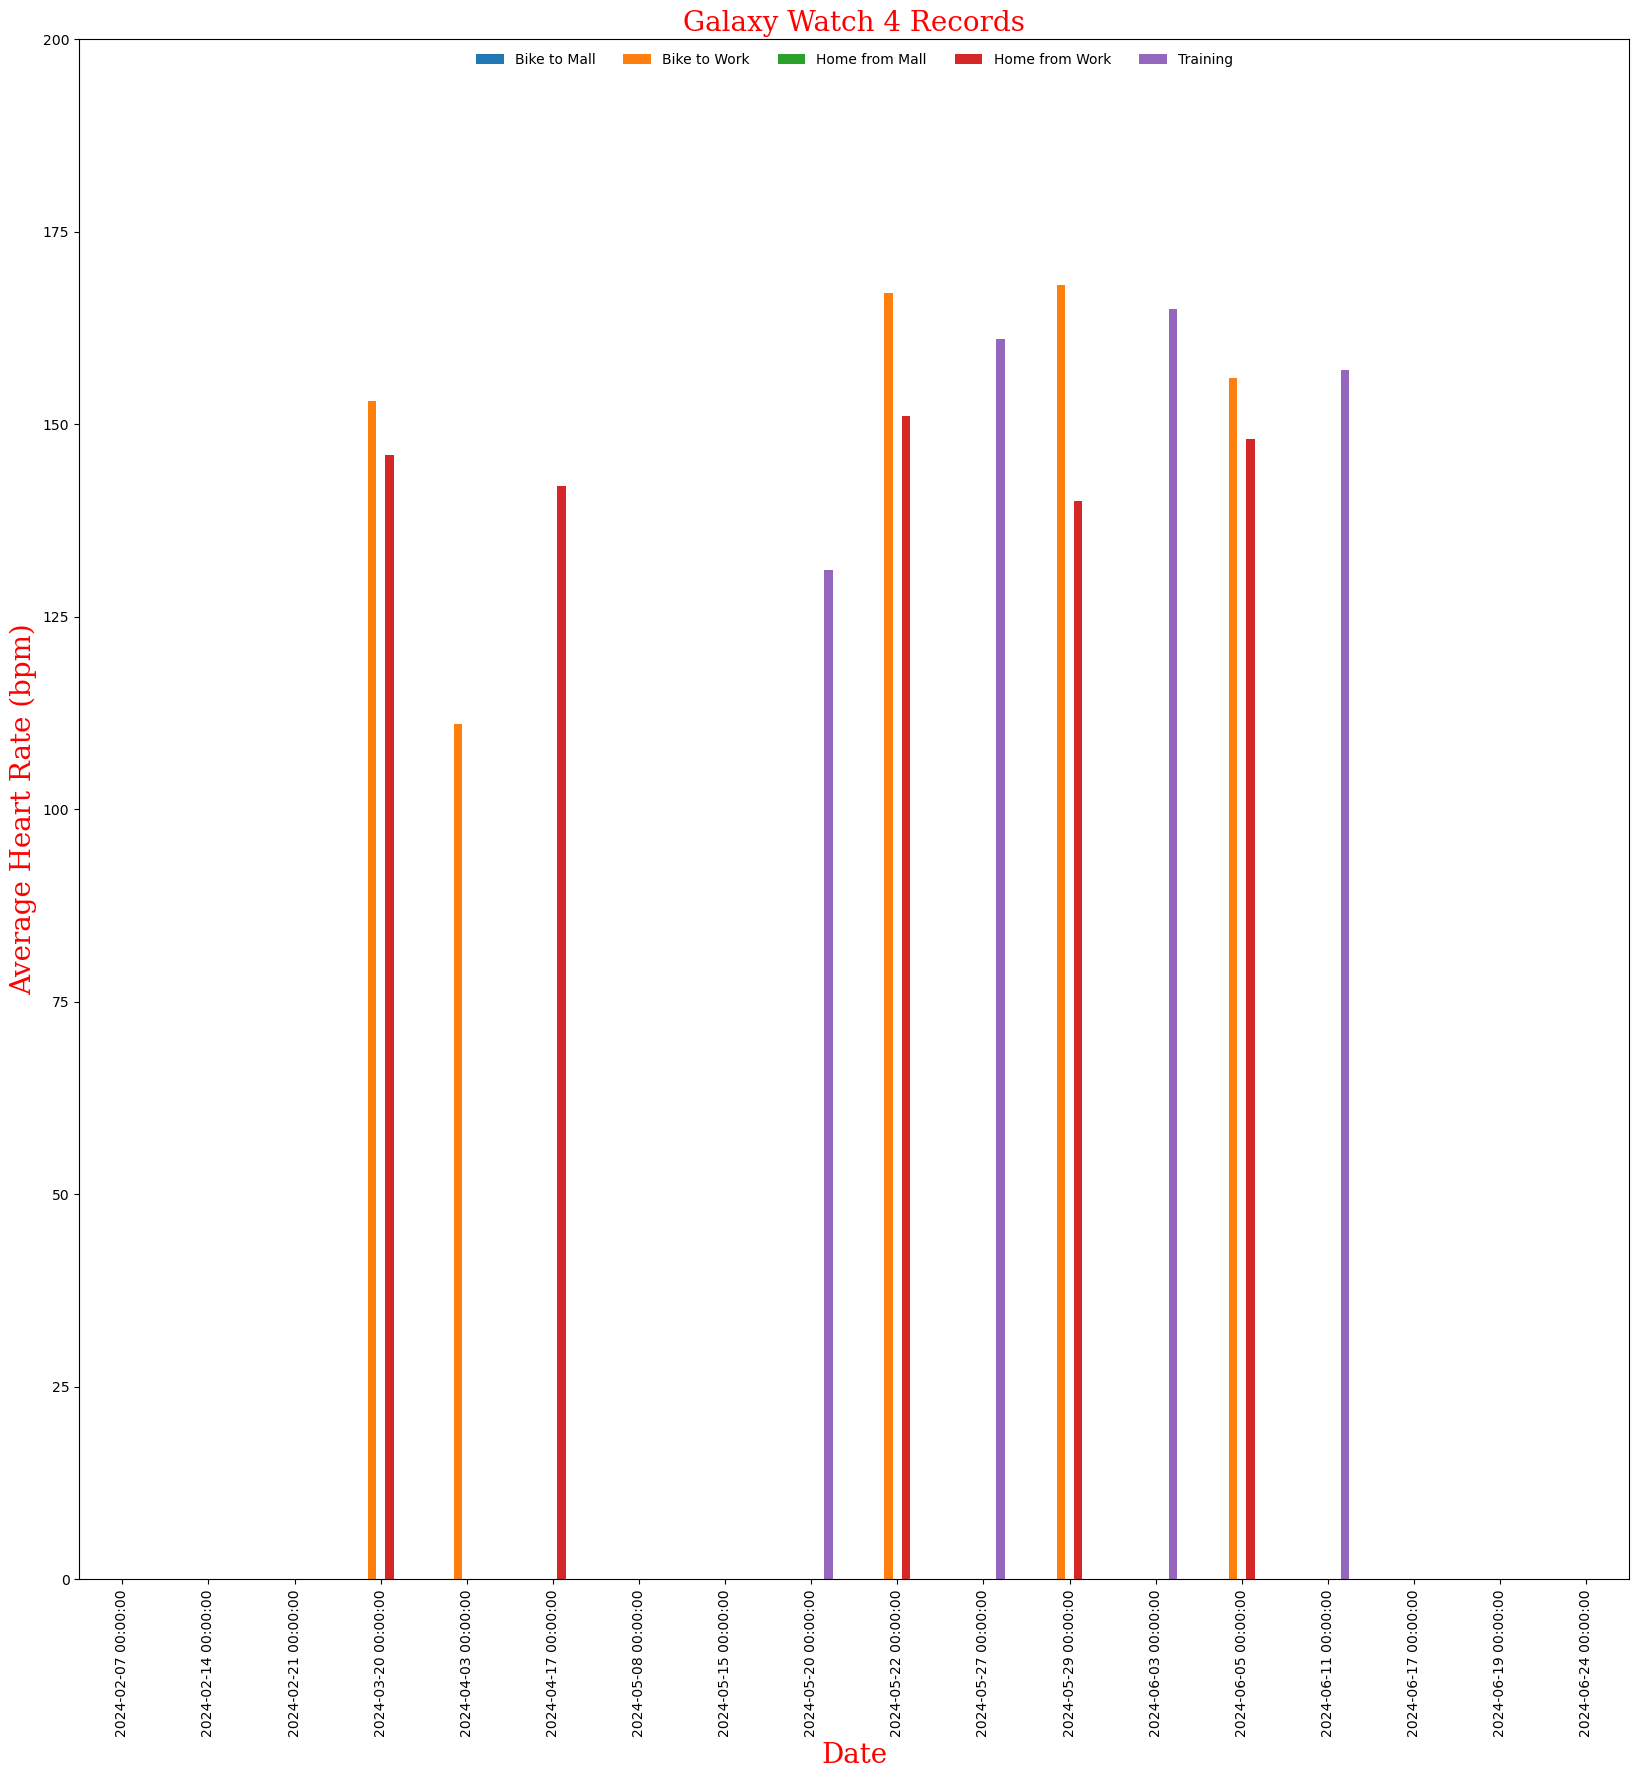

In [9]:
f1 = {'family': 'serif', 'size':20, 'color': 'red'}
ahrt.plot(figsize=(20,20), kind="bar")
plt.legend(["Bike to Mall", "Bike to Work", "Home from Mall", "Home from Work", "Training"], borderpad=0.5, fontsize=10, loc="upper center", frameon=False, ncol=6)
plt.title('Galaxy Watch 4 Records', fontdict=f1)
plt.xlabel('Date', fontdict=f1)
plt.ylabel('Average Heart Rate (bpm)', fontdict=f1)
plt.ylim(0, 200)
plt.savefig("fig/ahrt_gw4.png")
plt.show()

In [10]:
ap_btm = gst.loc[gst["Purpose"] == "Bike to Mall"].loc[:,"Average Pace"]
ap_btmd = ap_btm.to_frame(name="Bike to Mall")
ap_btw = gst.loc[gst["Purpose"] == "Bike to Work"].loc[:,"Average Pace"]
ap_btwd = ap_btw.to_frame(name="Bike to Work")
ap_hfm = gst.loc[gst["Purpose"] == "Home from Mall"].loc[:,"Average Pace"]
ap_hfmd = ap_hfm.to_frame(name="Home from Mall")
ap_hfw = gst.loc[gst["Purpose"] == "Home from Work"].loc[:,"Average Pace"]
ap_hfwd = ap_hfw.to_frame(name="Home from Work")
ap_tra = gst.loc[gst["Purpose"] == "Training"].loc[:,"Average Pace"]
ap_trad = ap_tra.to_frame(name="Training")
aplist = [ap_btmd, ap_btwd, ap_hfmd, ap_hfwd, ap_trad]
apt = pd.concat(aplist, axis=1).fillna(0)
apt.columns = pd.MultiIndex.from_product([["Average Pace"], ["Bike to Mall", "Bike to Work", "Home from Mall", "Home from Work", "Training"]])
apt.head() #average pace total

Average Pace                                                    
           Bike to Mall Bike to Work Home from Mall Home from Work Training
Date                                                                       
2024-02-07          0.0        418.0            0.0          249.0      0.0
2024-02-14          0.0        297.0            0.0          260.0      0.0
2024-02-21          0.0        294.0            0.0          250.0      0.0
2024-03-20          0.0        295.0            0.0          226.0      0.0
2024-04-03          0.0        271.0            0.0            0.0      0.0

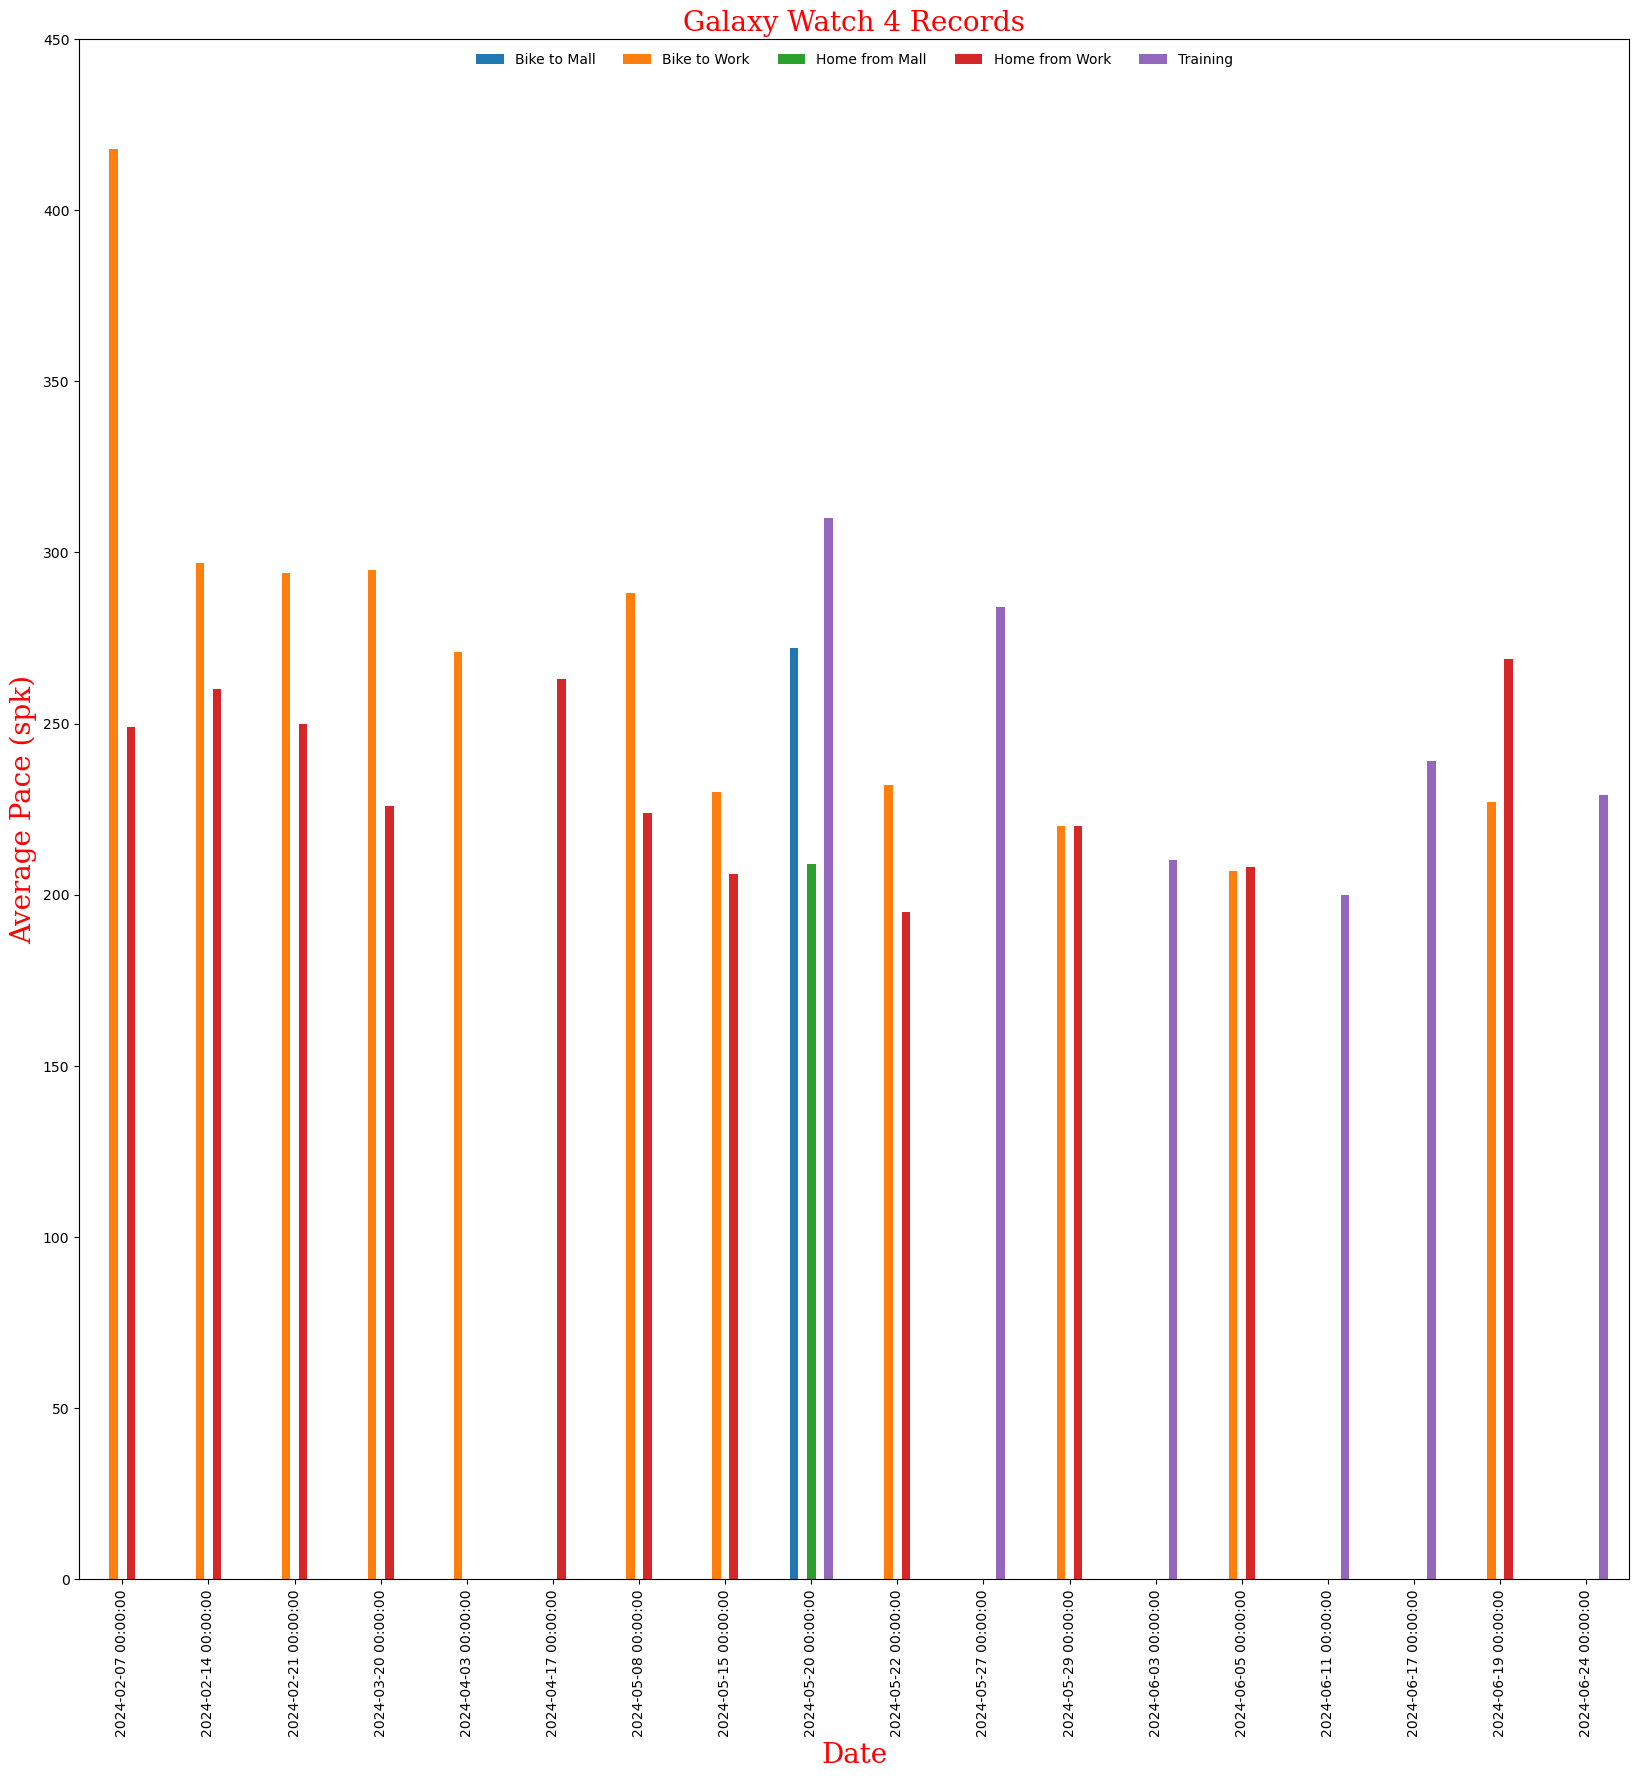

In [11]:
f1 = {'family': 'serif', 'size':20, 'color': 'red'}
apt.plot(figsize=(20,20), kind="bar")
plt.legend(["Bike to Mall", "Bike to Work", "Home from Mall", "Home from Work", "Training"], borderpad=0.5, fontsize=10, loc="upper center", frameon=False, ncol=6)
plt.title('Galaxy Watch 4 Records', fontdict=f1)
plt.xlabel('Date', fontdict=f1)
plt.ylabel('Average Pace (spk)', fontdict=f1)
plt.ylim(0, 450)
plt.savefig("fig/apt_gw4.png")
plt.show()

In [12]:
as_btm = gst.loc[gst["Purpose"] == "Bike to Mall"].loc[:,"Average Speed"]
as_btmd = as_btm.to_frame(name="Bike to Mall")
as_btw = gst.loc[gst["Purpose"] == "Bike to Work"].loc[:,"Average Speed"]
as_btwd = as_btw.to_frame(name="Bike to Work")
as_hfm = gst.loc[gst["Purpose"] == "Home from Mall"].loc[:,"Average Speed"]
as_hfmd = as_hfm.to_frame(name="Home from Mall")
as_hfw = gst.loc[gst["Purpose"] == "Home from Work"].loc[:,"Average Speed"]
as_hfwd = as_hfw.to_frame(name="Home from Work")
as_tra = gst.loc[gst["Purpose"] == "Training"].loc[:,"Average Speed"]
as_trad = as_tra.to_frame(name="Training")
aslist = [as_btmd, as_btwd, as_hfmd, as_hfwd, as_trad]
ast = pd.concat(aslist, axis=1).fillna(0)
ast.columns = pd.MultiIndex.from_product([["Average Speed"], ["Bike to Mall", "Bike to Work", "Home from Mall", "Home from Work", "Training"]])
ast.head() #average speed total

Average Speed                                                    
            Bike to Mall Bike to Work Home from Mall Home from Work Training
Date                                                                        
2024-02-07           0.0          8.5            0.0           14.4      0.0
2024-02-14           0.0         12.0            0.0           13.8      0.0
2024-02-21           0.0         12.2            0.0           14.3      0.0
2024-03-20           0.0         12.1            0.0           15.8      0.0
2024-04-03           0.0         13.2            0.0            0.0      0.0

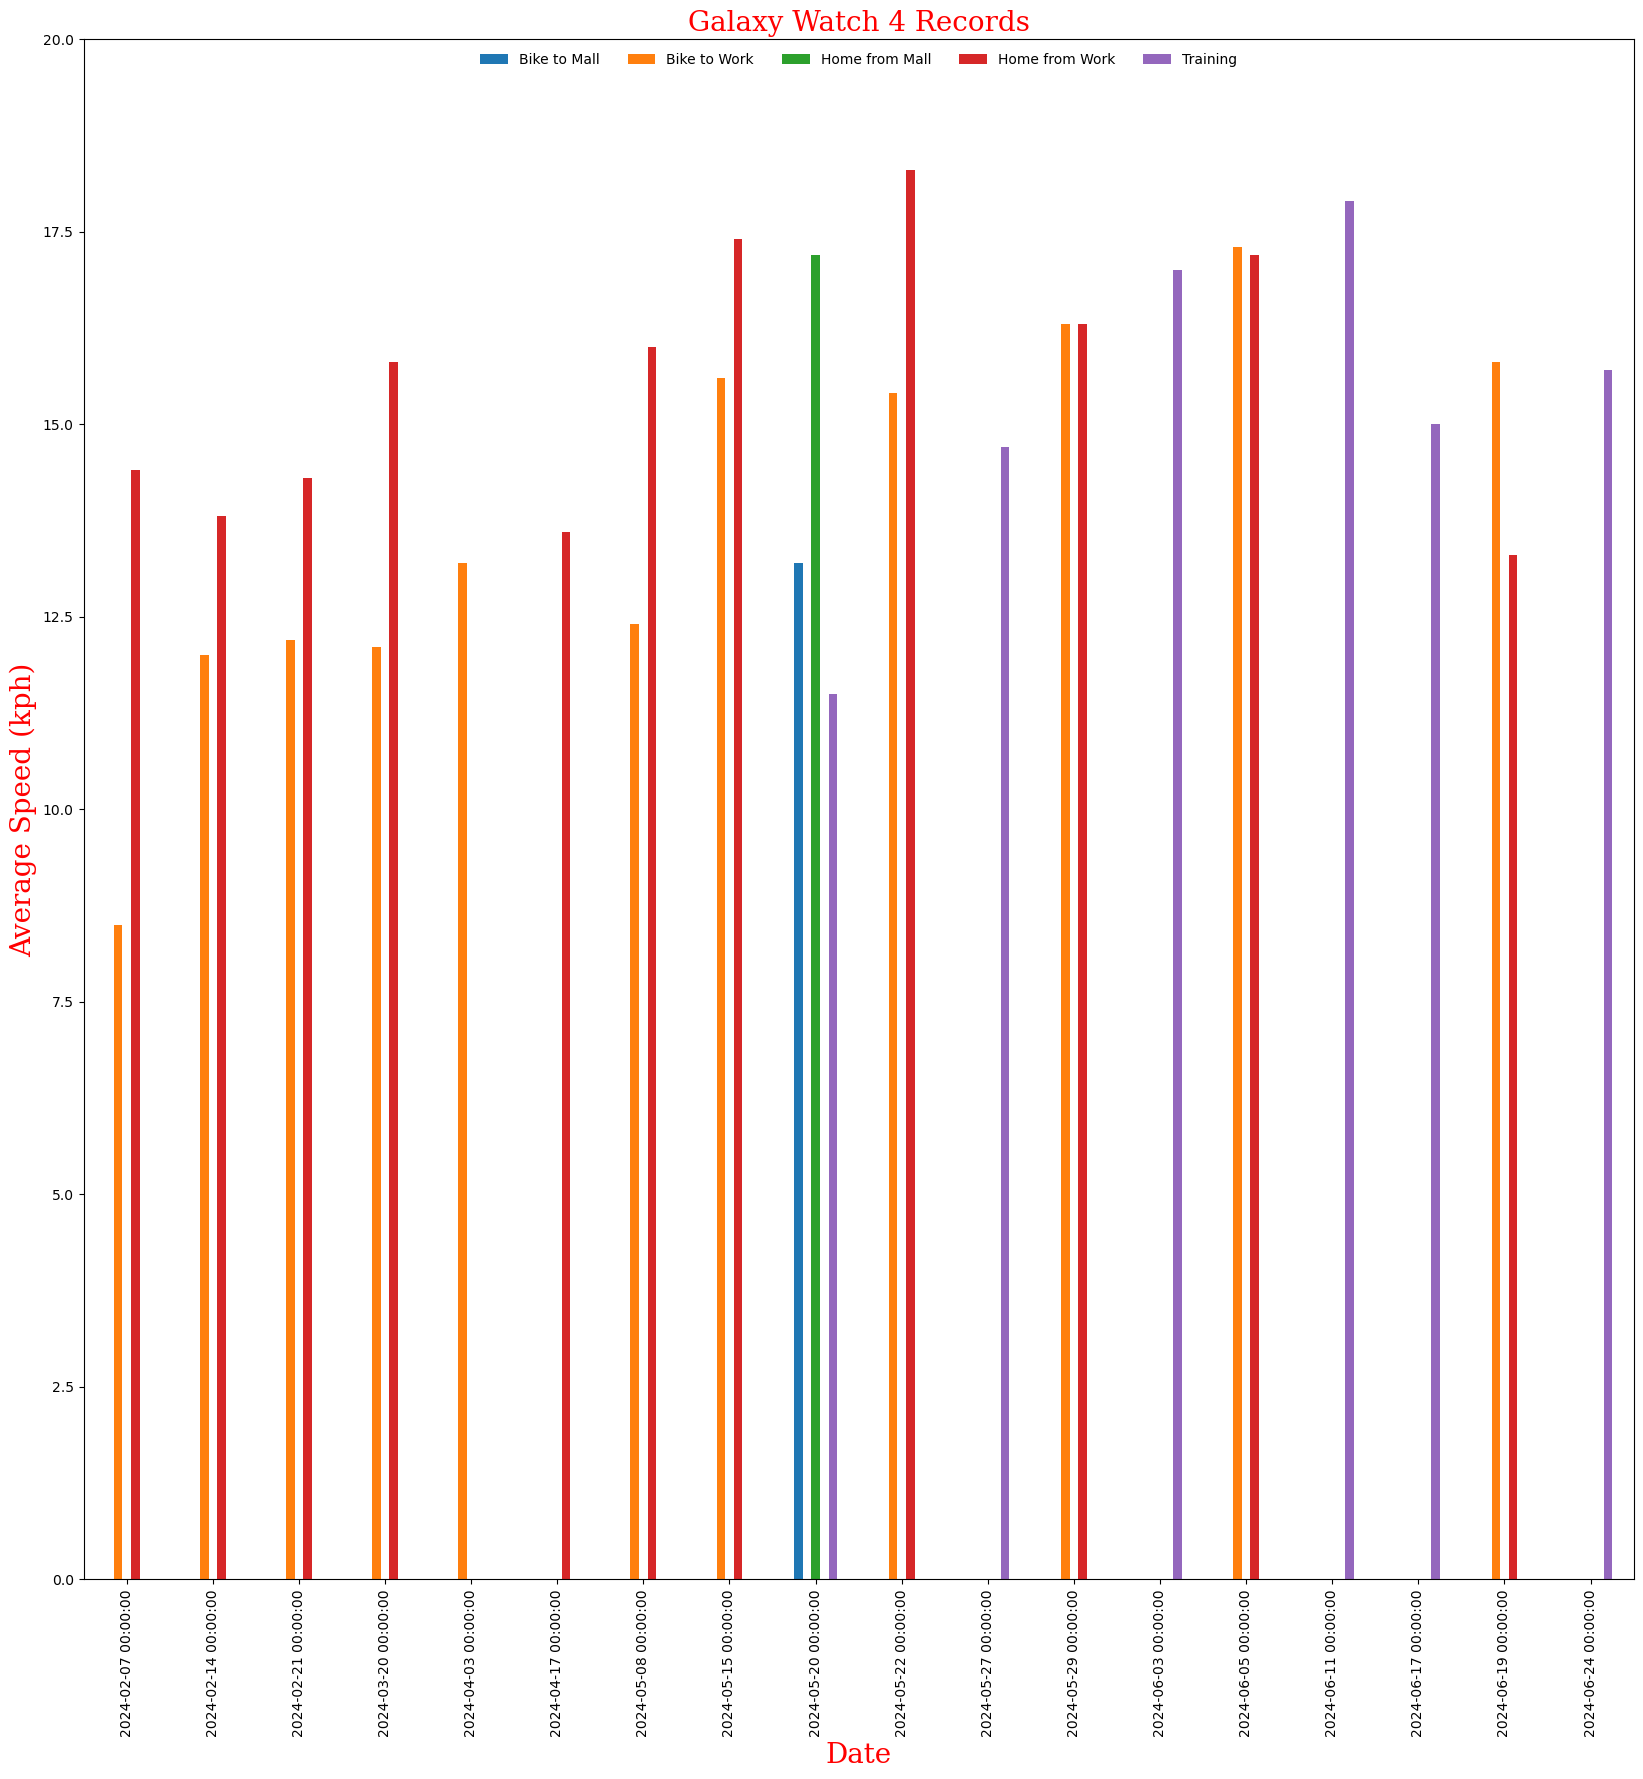

In [13]:
f1 = {'family': 'serif', 'size':20, 'color': 'red'}
ast.plot(figsize=(20,20), kind="bar")
plt.legend(["Bike to Mall", "Bike to Work", "Home from Mall", "Home from Work", "Training"], borderpad=0.5, fontsize=10, loc="upper center", frameon=False, ncol=6)
plt.title('Galaxy Watch 4 Records', fontdict=f1)
plt.xlabel('Date', fontdict=f1)
plt.ylabel('Average Speed (kph)', fontdict=f1)
plt.ylim(0, 20)
plt.savefig("fig/ast_gw4.png")
plt.show()

In [14]:
ct_btm = gst.loc[gst["Purpose"] == "Bike to Mall"].loc[:,"Calories Total"]
ct_btmd = ct_btm.to_frame(name="Bike to Mall")
ct_btw = gst.loc[gst["Purpose"] == "Bike to Work"].loc[:,"Calories Total"]
ct_btwd = ct_btw.to_frame(name="Bike to Work")
ct_hfm = gst.loc[gst["Purpose"] == "Home from Mall"].loc[:,"Calories Total"]
ct_hfmd = ct_hfm.to_frame(name="Home from Mall")
ct_hfw = gst.loc[gst["Purpose"] == "Home from Work"].loc[:,"Calories Total"]
ct_hfwd = ct_hfw.to_frame(name="Home from Work")
ct_tra = gst.loc[gst["Purpose"] == "Training"].loc[:,"Calories Total"]
ct_trad = ct_tra.to_frame(name="Training")
ctlist = [ct_btmd, ct_btwd, ct_hfmd, ct_hfwd, ct_trad]
ctt = pd.concat(ctlist, axis=1).fillna(0)
ctt.columns = pd.MultiIndex.from_product([["Calories Total"], ["Bike to Mall", "Bike to Work", "Home from Mall", "Home from Work", "Training"]])
ctt.head() #calories total total

Calories Total                                                    
             Bike to Mall Bike to Work Home from Mall Home from Work Training
Date                                                                         
2024-02-07            0.0        283.0            0.0          181.0      0.0
2024-02-14            0.0        172.0            0.0          233.0      0.0
2024-02-21            0.0        211.0            0.0          196.0      0.0
2024-03-20            0.0        170.0            0.0          186.0      0.0
2024-04-03            0.0        207.0            0.0            0.0      0.0

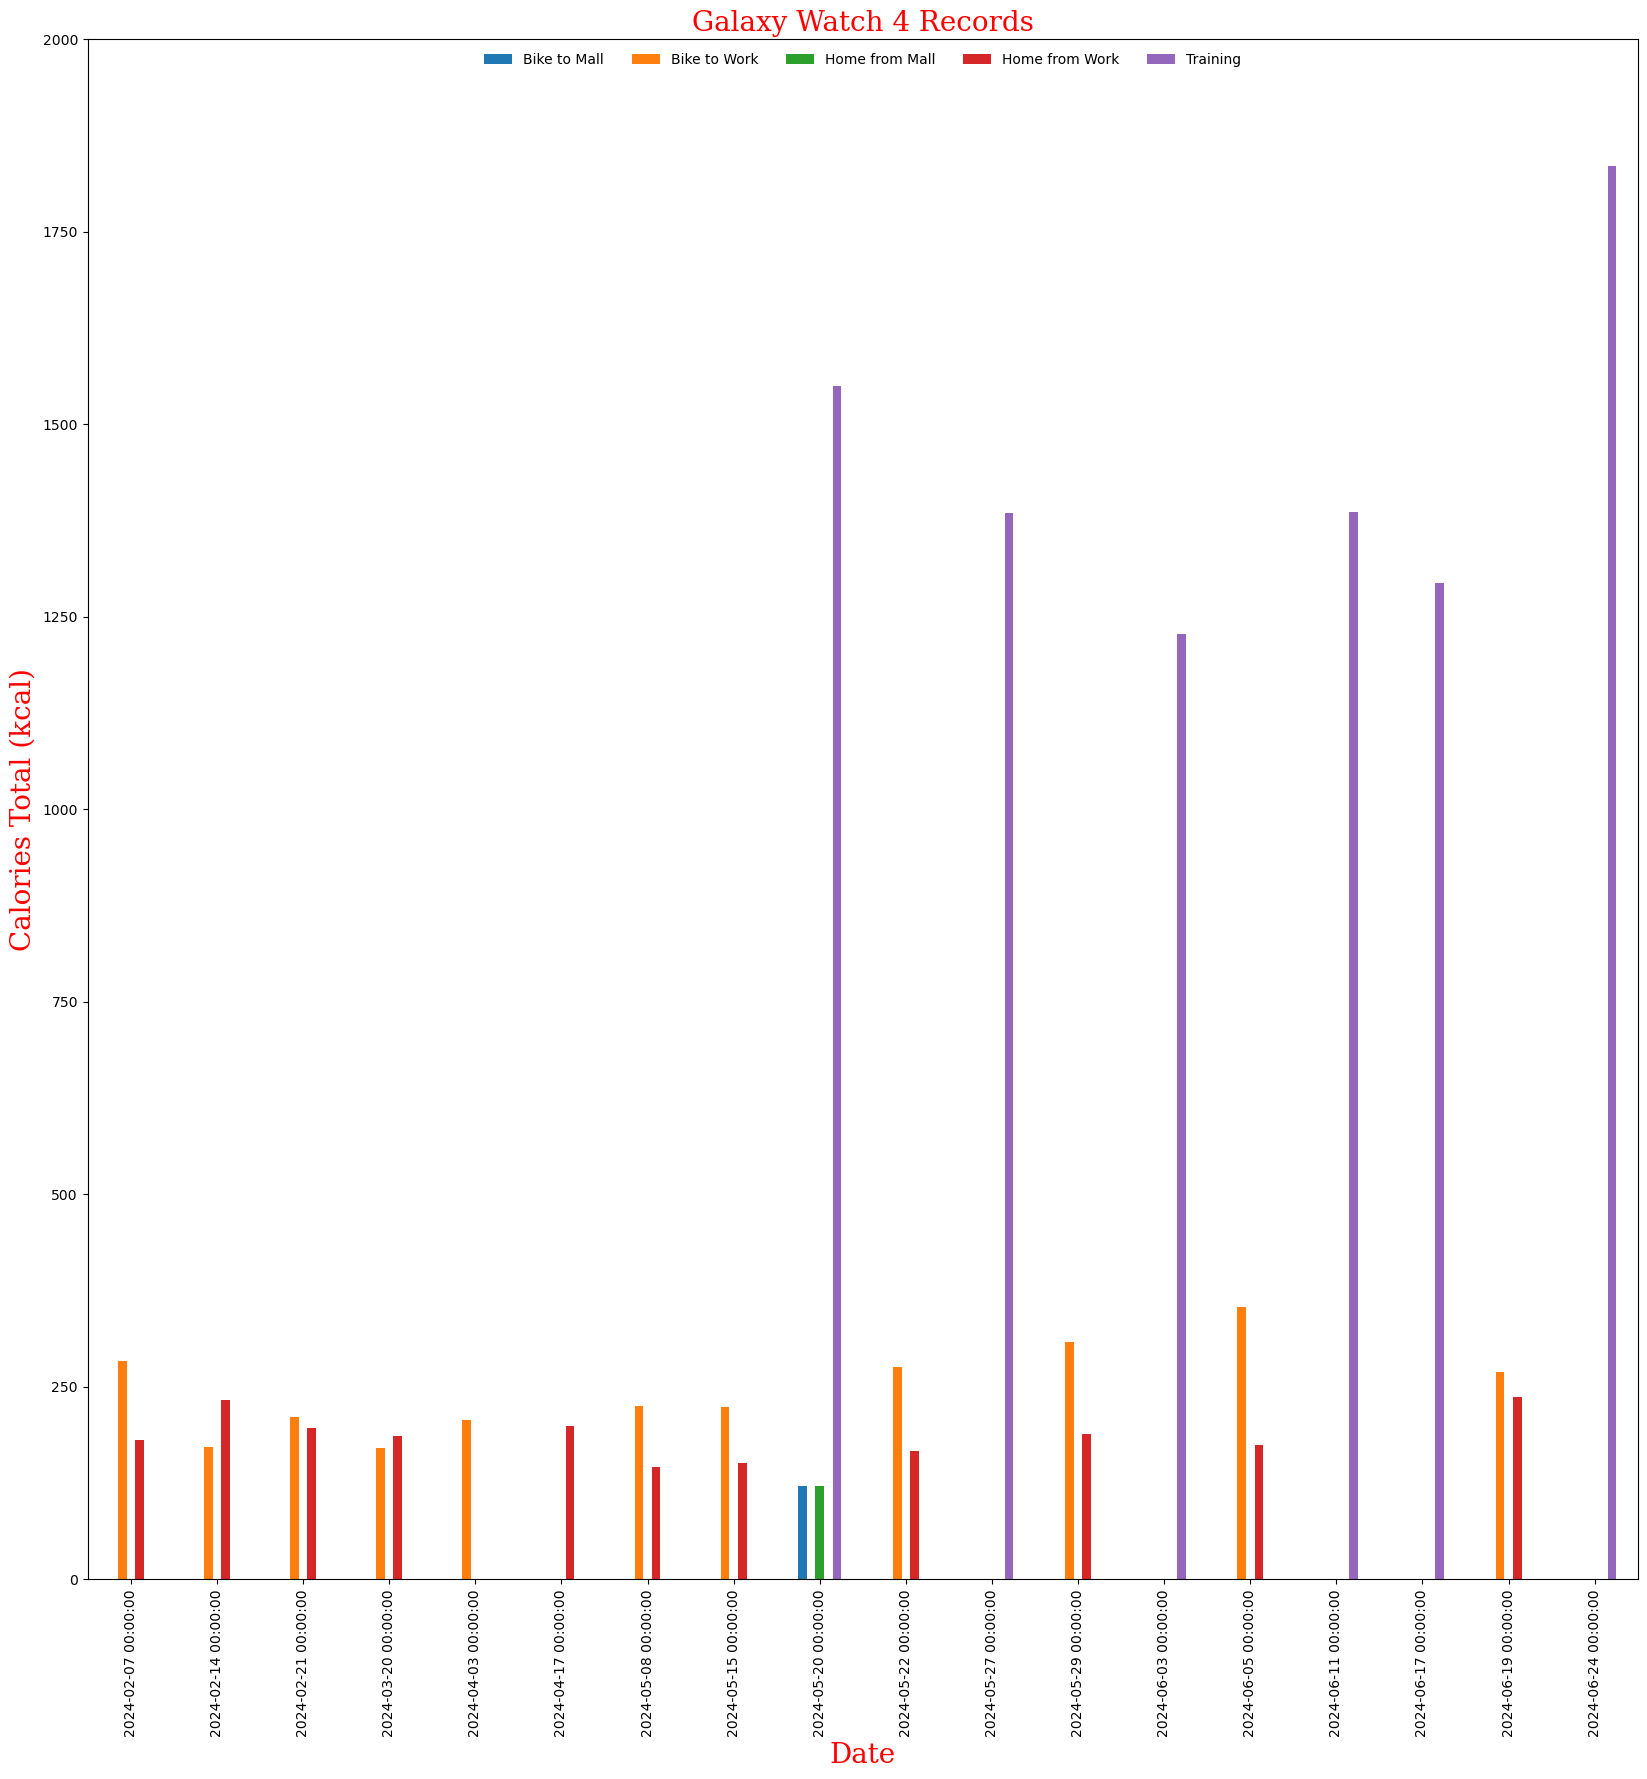

In [15]:
f1 = {'family': 'serif', 'size':20, 'color': 'red'}
ctt.plot(figsize=(20,20), kind="bar")
plt.legend(["Bike to Mall", "Bike to Work", "Home from Mall", "Home from Work", "Training"], borderpad=0.5, fontsize=10, loc="upper center", frameon=False, ncol=6)
plt.title('Galaxy Watch 4 Records', fontdict=f1)
plt.xlabel('Date', fontdict=f1)
plt.ylabel('Calories Total (kcal)', fontdict=f1)
plt.ylim(0, 2000)
plt.savefig("fig/ctt_gw4.png")
plt.show()

In [16]:
d_btm = gst.loc[gst["Purpose"] == "Bike to Mall"].loc[:,"Distance"]
d_btmd = d_btm.to_frame(name="Bike to Mall")
d_btw = gst.loc[gst["Purpose"] == "Bike to Work"].loc[:,"Distance"]
d_btwd = d_btw.to_frame(name="Bike to Work")
d_hfm = gst.loc[gst["Purpose"] == "Home from Mall"].loc[:,"Distance"]
d_hfmd = d_hfm.to_frame(name="Home from Mall")
d_hfw = gst.loc[gst["Purpose"] == "Home from Work"].loc[:,"Distance"]
d_hfwd = d_hfw.to_frame(name="Home from Work")
d_tra = gst.loc[gst["Purpose"] == "Training"].loc[:,"Distance"]
d_trad = d_tra.to_frame(name="Training")
dlist = [d_btmd, d_btwd, d_hfmd, d_hfwd, d_trad]
dt = pd.concat(dlist, axis=1).fillna(0)
dt.columns = pd.MultiIndex.from_product([["Distance"], ["Bike to Mall", "Bike to Work", "Home from Mall", "Home from Work", "Training"]])
dt.head() #distance total

Distance                                                    
           Bike to Mall Bike to Work Home from Mall Home from Work Training
Date                                                                       
2024-02-07          0.0         4.46            0.0           4.09      0.0
2024-02-14          0.0         4.10            0.0           4.13      0.0
2024-02-21          0.0         4.51            0.0           4.19      0.0
2024-03-20          0.0         4.14            0.0           4.15      0.0
2024-04-03          0.0         4.57            0.0           0.00      0.0

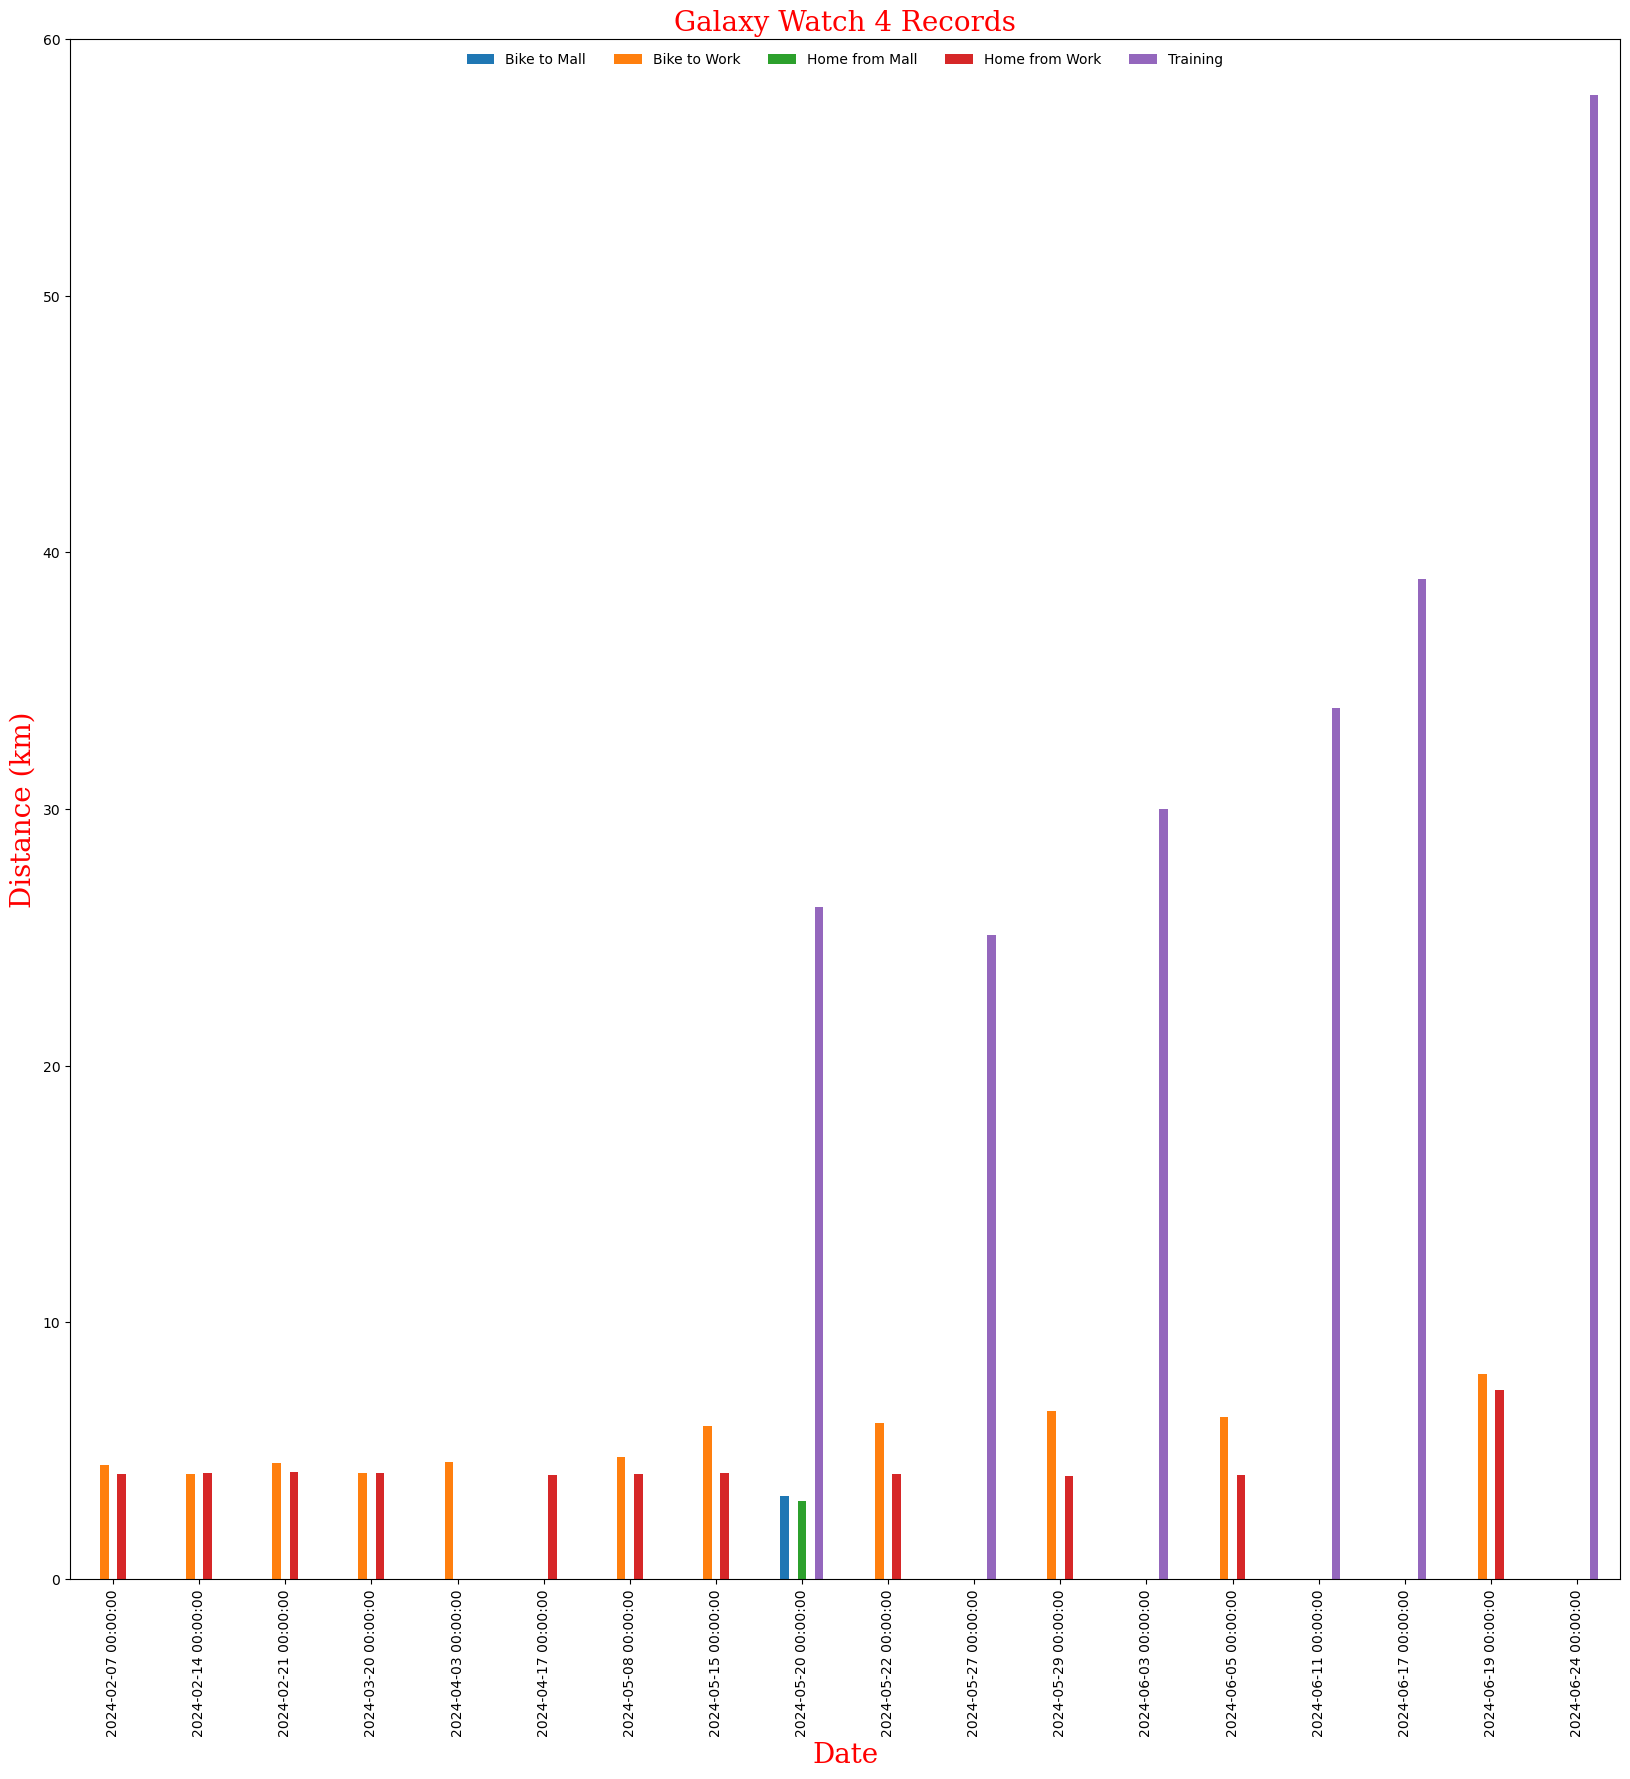

In [17]:
f1 = {'family': 'serif', 'size':20, 'color': 'red'}
dt.plot(figsize=(20,20), kind="bar")
plt.legend(["Bike to Mall", "Bike to Work", "Home from Mall", "Home from Work", "Training"], borderpad=0.5, fontsize=10, loc="upper center", frameon=False, ncol=6)
plt.title('Galaxy Watch 4 Records', fontdict=f1)
plt.xlabel('Date', fontdict=f1)
plt.ylabel('Distance (km)', fontdict=f1)
plt.ylim(0, 60)
plt.savefig("fig/dt_gw4.png")
plt.show()

In [18]:
dt_btm = gst.loc[gst["Purpose"] == "Bike to Mall"].loc[:,"Duration Total"]
dt_btmd = dt_btm.to_frame(name="Bike to Mall")
dt_btw = gst.loc[gst["Purpose"] == "Bike to Work"].loc[:,"Duration Total"]
dt_btwd = dt_btw.to_frame(name="Bike to Work")
dt_hfm = gst.loc[gst["Purpose"] == "Home from Mall"].loc[:,"Duration Total"]
dt_hfmd = dt_hfm.to_frame(name="Home from Mall")
dt_hfw = gst.loc[gst["Purpose"] == "Home from Work"].loc[:,"Duration Total"]
dt_hfwd = dt_hfw.to_frame(name="Home from Work")
dt_tra = gst.loc[gst["Purpose"] == "Training"].loc[:,"Duration Total"]
dt_trad = dt_tra.to_frame(name="Training")
dlist = [dt_btmd, dt_btwd, dt_hfmd, dt_hfwd, dt_trad]
dtt = pd.concat(dlist, axis=1).fillna(0)
dtt.columns = pd.MultiIndex.from_product([["Duration Total"], ["Bike to Mall", "Bike to Work", "Home from Mall", "Home from Work", "Training"]])
dtt.head() #duration total total

Duration Total                                                    
             Bike to Mall Bike to Work Home from Mall Home from Work Training
Date                                                                         
2024-02-07            0.0       2158.0            0.0         1391.0      0.0
2024-02-14            0.0       1420.0            0.0         1731.0      0.0
2024-02-21            0.0       1672.0            0.0         1479.0      0.0
2024-03-20            0.0       1350.0            0.0         1364.0      0.0
2024-04-03            0.0       1707.0            0.0            0.0      0.0

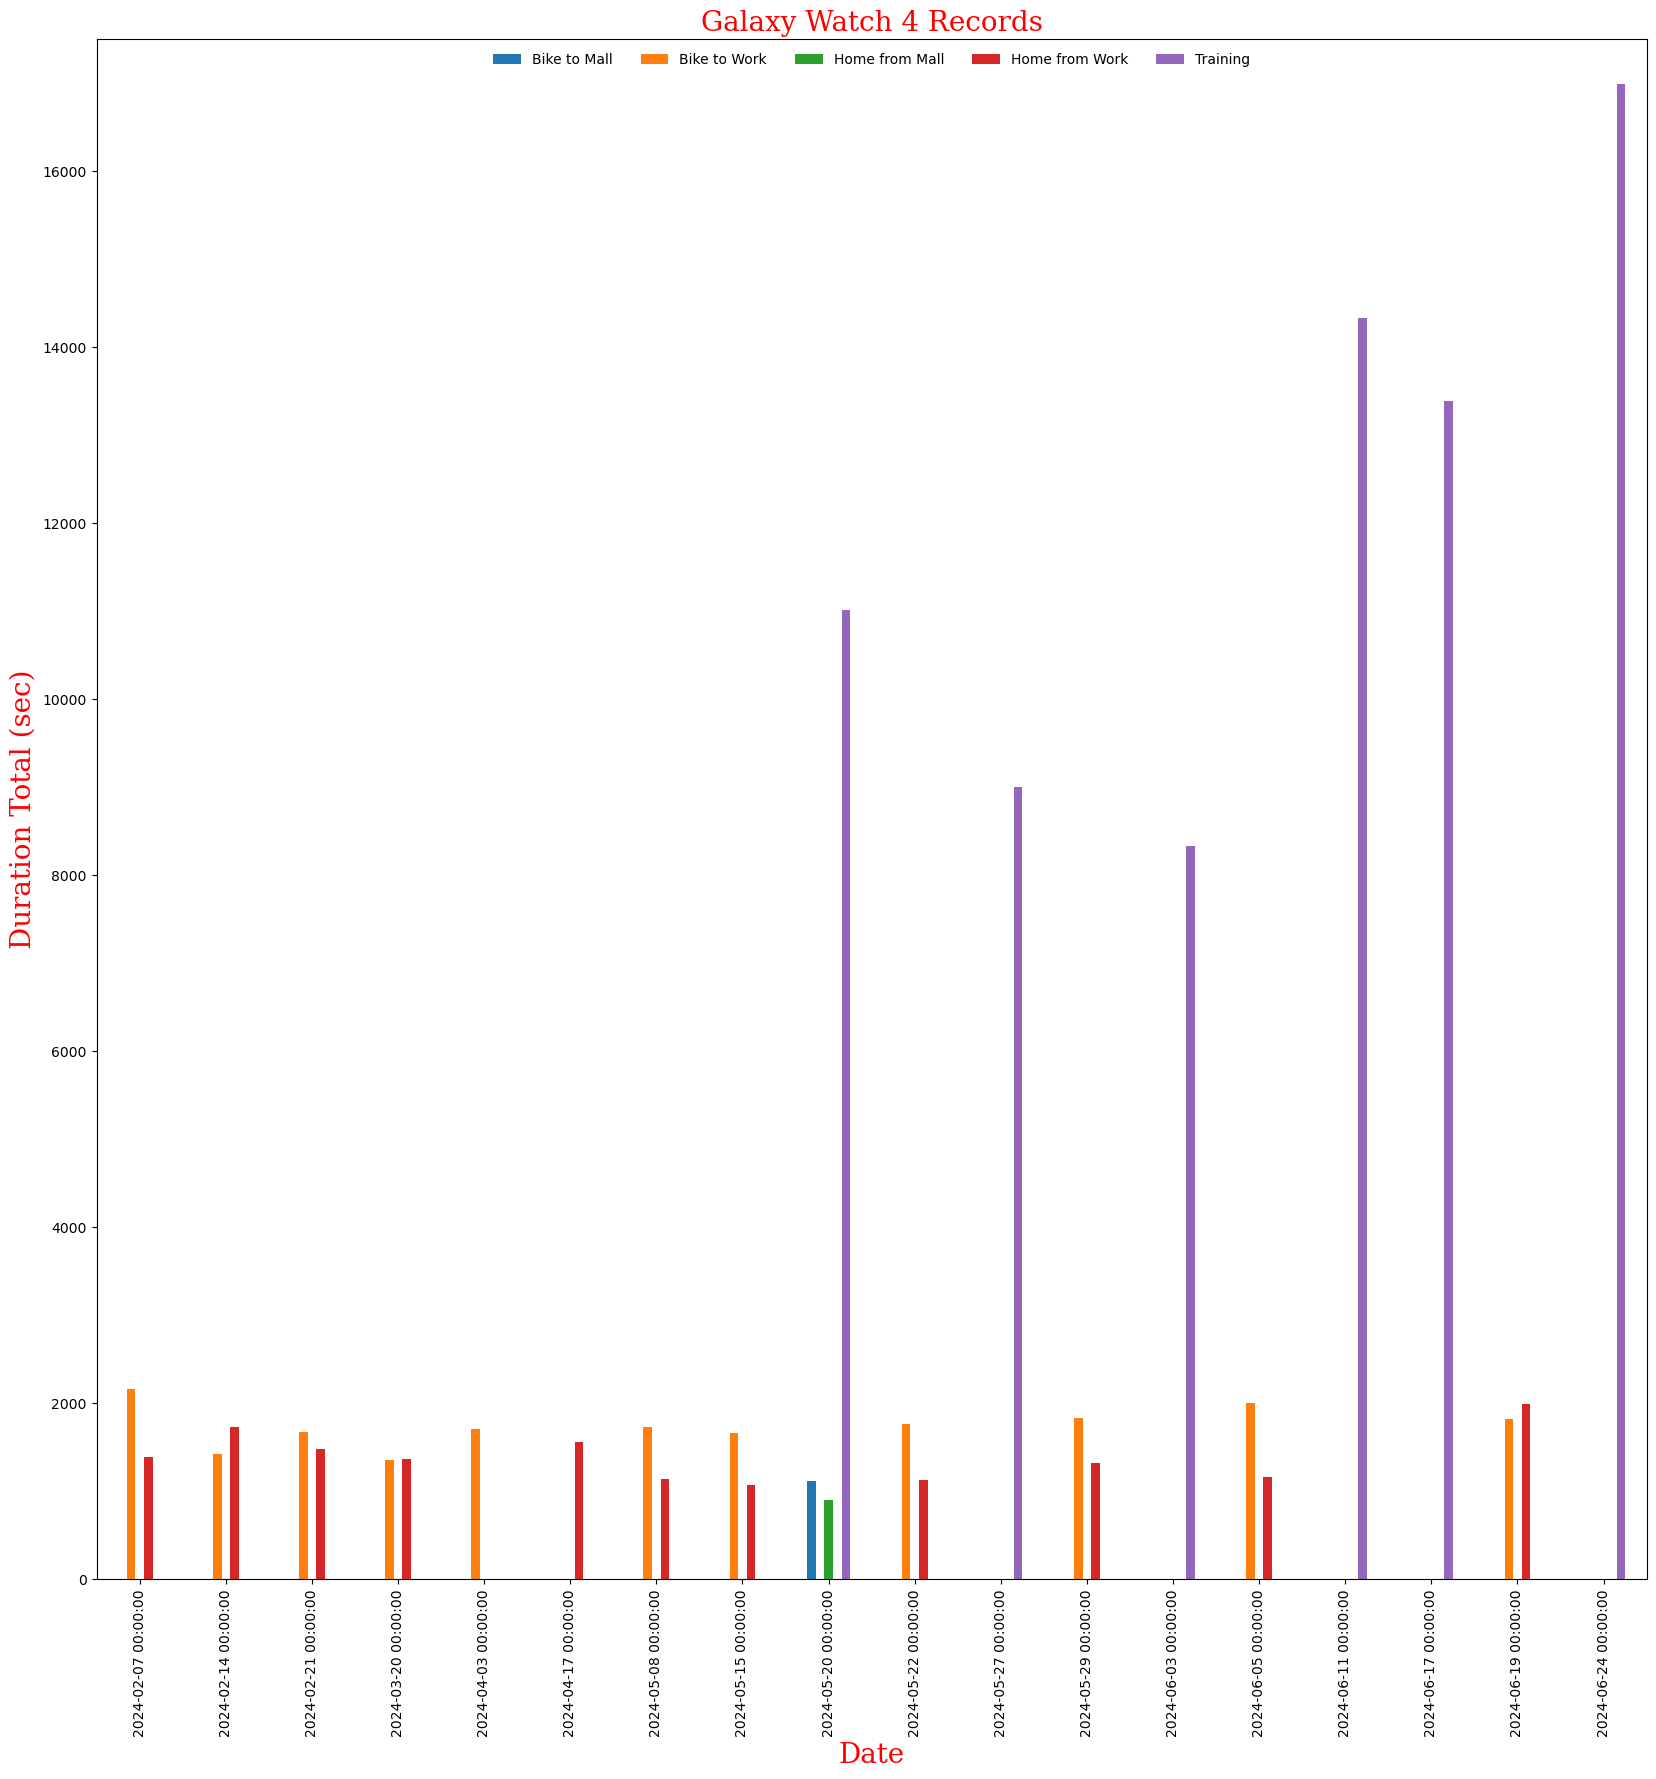

In [19]:
f1 = {'family': 'serif', 'size':20, 'color': 'red'}
dtt.plot(figsize=(20,20), kind="bar")
plt.legend(["Bike to Mall", "Bike to Work", "Home from Mall", "Home from Work", "Training"], borderpad=0.5, fontsize=10, loc="upper center", frameon=False, ncol=6)
plt.title('Galaxy Watch 4 Records', fontdict=f1)
plt.xlabel('Date', fontdict=f1)
plt.ylabel('Duration Total (sec)', fontdict=f1)
plt.ylim(0, 17500)
plt.savefig("fig/dtt_gw4.png")
plt.show()

In [20]:
eg_btm = gst.loc[gst["Purpose"] == "Bike to Mall"].loc[:,"Elevation Gain"]
eg_btmd = eg_btm.to_frame(name="Bike to Mall")
eg_btw = gst.loc[gst["Purpose"] == "Bike to Work"].loc[:,"Elevation Gain"]
eg_btwd = eg_btw.to_frame(name="Bike to Work")
eg_hfm = gst.loc[gst["Purpose"] == "Home from Mall"].loc[:,"Elevation Gain"]
eg_hfmd = eg_hfm.to_frame(name="Home from Mall")
eg_hfw = gst.loc[gst["Purpose"] == "Home from Work"].loc[:,"Elevation Gain"]
eg_hfwd = eg_hfw.to_frame(name="Home from Work")
eg_tra = gst.loc[gst["Purpose"] == "Training"].loc[:,"Elevation Gain"]
eg_trad = eg_tra.to_frame(name="Training")
dlist = [eg_btmd, eg_btwd, eg_hfmd, eg_hfwd, eg_trad]
egt = pd.concat(dlist, axis=1).fillna(0)
egt.columns = pd.MultiIndex.from_product([["Elevation Gain"], ["Bike to Mall", "Bike to Work", "Home from Mall", "Home from Work", "Training"]])
egt.head() #elevation gain total

Elevation Gain                                                    
             Bike to Mall Bike to Work Home from Mall Home from Work Training
Date                                                                         
2024-02-07            0.0         30.0            0.0           37.0      0.0
2024-02-14            0.0         30.0            0.0           27.0      0.0
2024-02-21            0.0         30.0            0.0           34.0      0.0
2024-03-20            0.0         30.0            0.0           33.0      0.0
2024-04-03            0.0         30.0            0.0            0.0      0.0

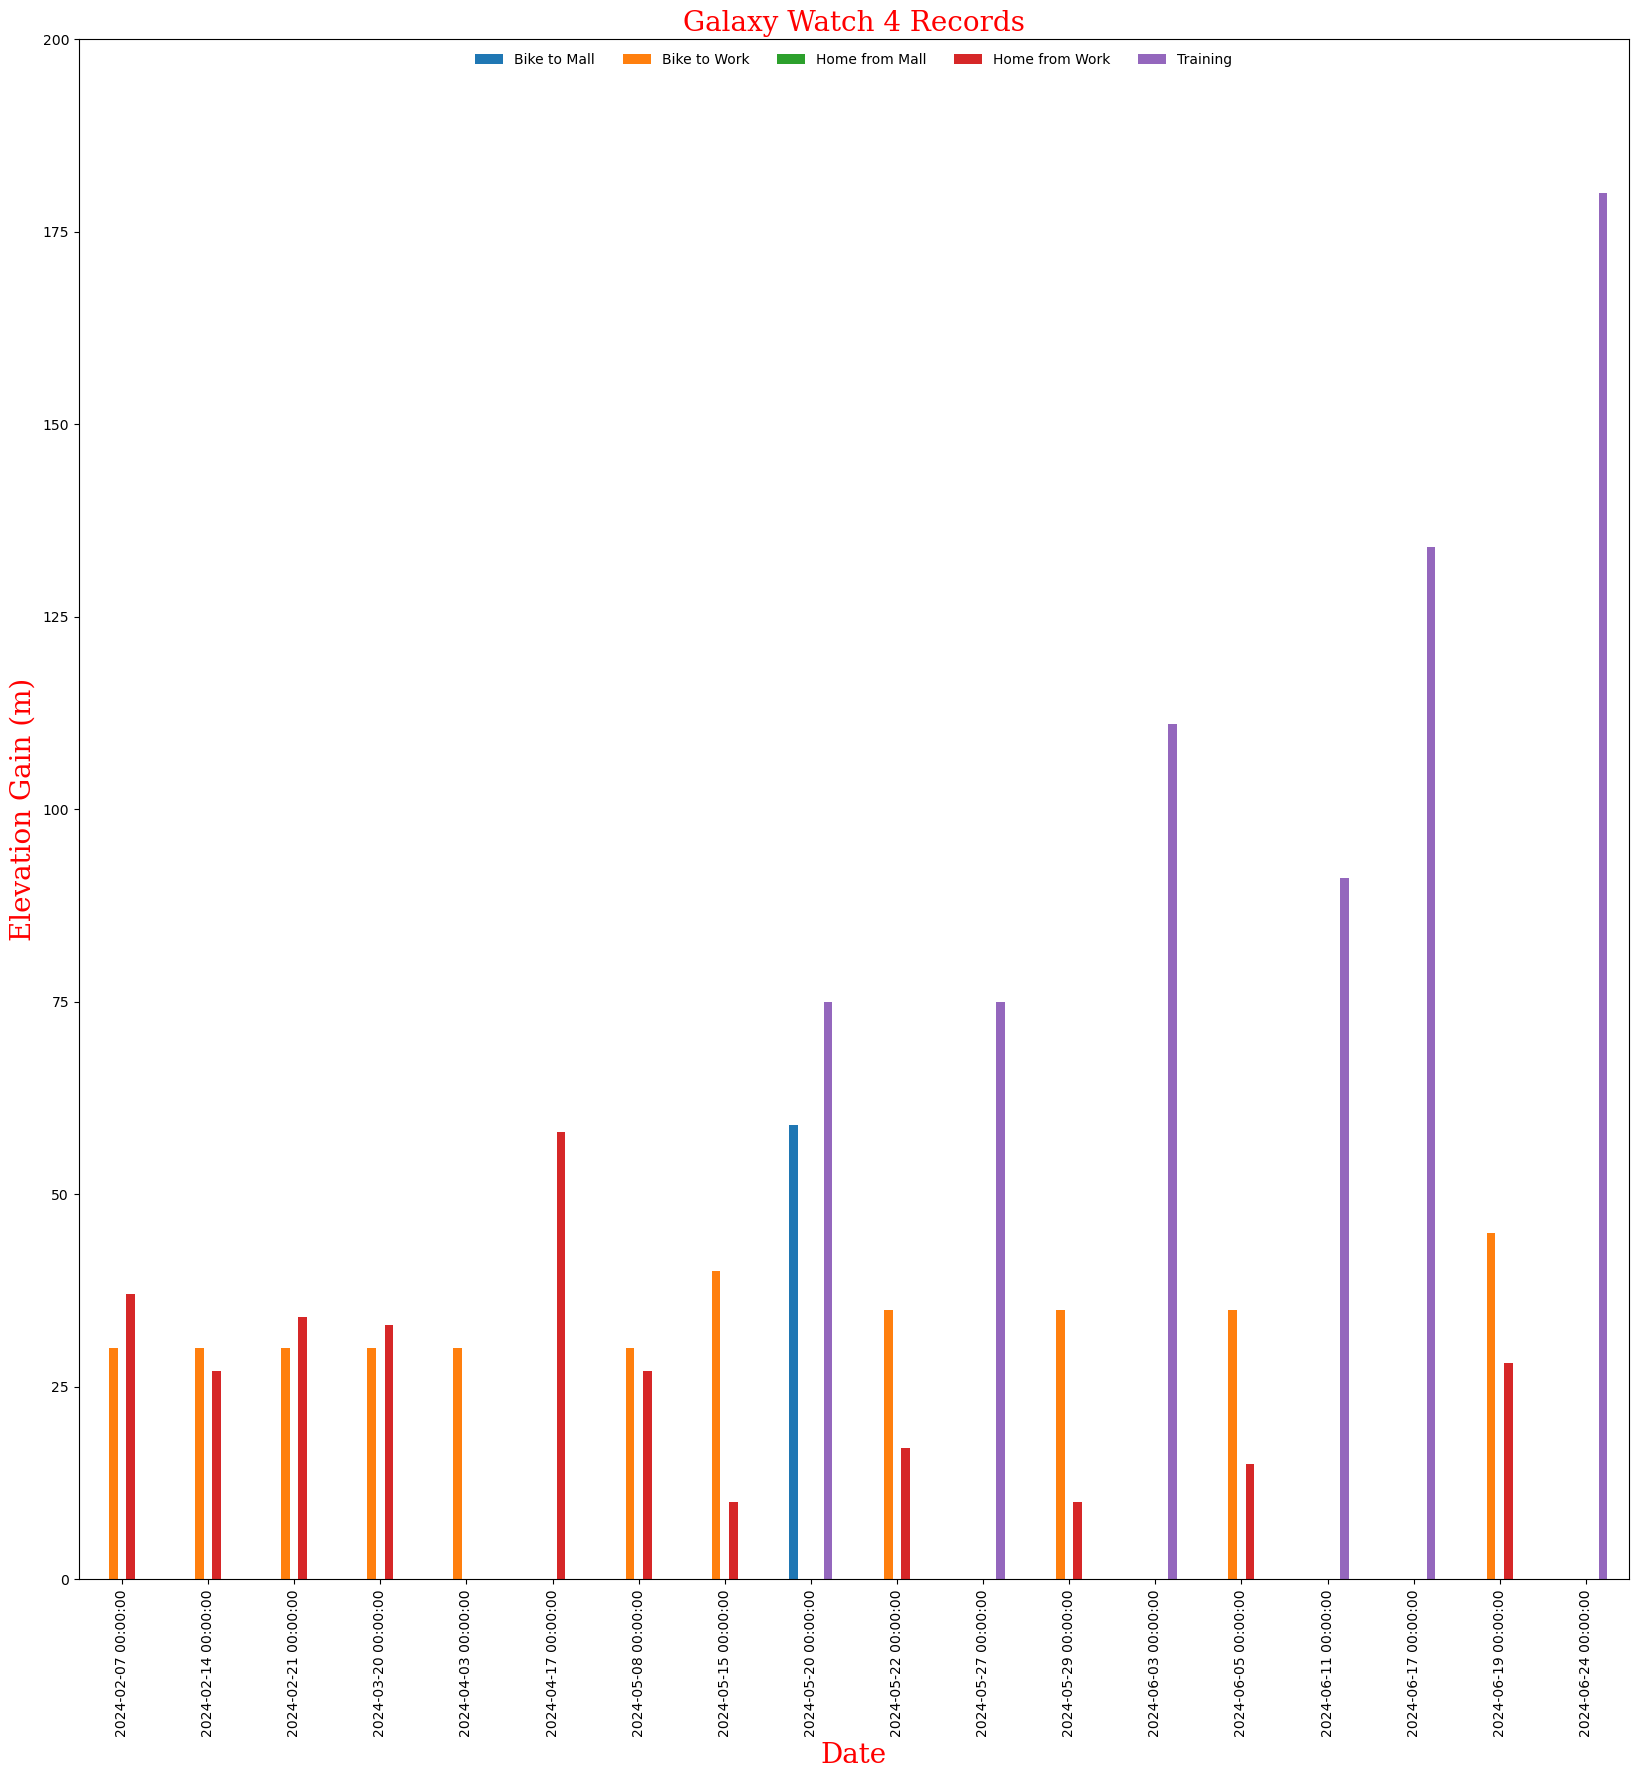

In [21]:
f1 = {'family': 'serif', 'size':20, 'color': 'red'}
egt.plot(figsize=(20,20), kind="bar")
plt.legend(["Bike to Mall", "Bike to Work", "Home from Mall", "Home from Work", "Training"], borderpad=0.5, fontsize=10, loc="upper center", frameon=False, ncol=6)
plt.title('Galaxy Watch 4 Records', fontdict=f1)
plt.xlabel('Date', fontdict=f1)
plt.ylabel('Elevation Gain (m)', fontdict=f1)
plt.ylim(0, 200)
plt.savefig("fig/egt_gw4.png")
plt.show()

In [22]:
tag_btm = gst.loc[gst["Purpose"] == "Bike to Mall"].loc[:,"Total Ascent Gradient"]
tag_btmd = tag_btm.to_frame(name="Bike to Mall")
tag_btw = gst.loc[gst["Purpose"] == "Bike to Work"].loc[:,"Total Ascent Gradient"]
tag_btwd = tag_btw.to_frame(name="Bike to Work")
tag_hfm = gst.loc[gst["Purpose"] == "Home from Mall"].loc[:,"Total Ascent Gradient"]
tag_hfmd = tag_hfm.to_frame(name="Home from Mall")
tag_hfw = gst.loc[gst["Purpose"] == "Home from Work"].loc[:,"Total Ascent Gradient"]
tag_hfwd = tag_hfw.to_frame(name="Home from Work")
tag_tra = gst.loc[gst["Purpose"] == "Training"].loc[:,"Total Ascent Gradient"]
tag_trad = tag_tra.to_frame(name="Training")
dlist = [tag_btmd, tag_btwd, tag_hfmd, tag_hfwd, tag_trad]
tagt = pd.concat(dlist, axis=1).fillna(0)
tagt.columns = pd.MultiIndex.from_product([["Total Ascent Gradient"], ["Bike to Mall", "Bike to Work", "Home from Mall", "Home from Work", "Training"]])
tagt.head() #total ascent gradient total

Total Ascent Gradient                                             \
                    Bike to Mall Bike to Work Home from Mall Home from Work   
Date                                                                          
2024-02-07                   0.0         0.31            0.0           0.01   
2024-02-14                   0.0         0.36            0.0           0.00   
2024-02-21                   0.0         0.36            0.0           0.00   
2024-03-20                   0.0         0.31            0.0           0.05   
2024-04-03                   0.0         0.32            0.0           0.00   

                     
           Training  
Date                 
2024-02-07      0.0  
2024-02-14      0.0  
2024-02-21      0.0  
2024-03-20      0.0  
2024-04-03      0.0

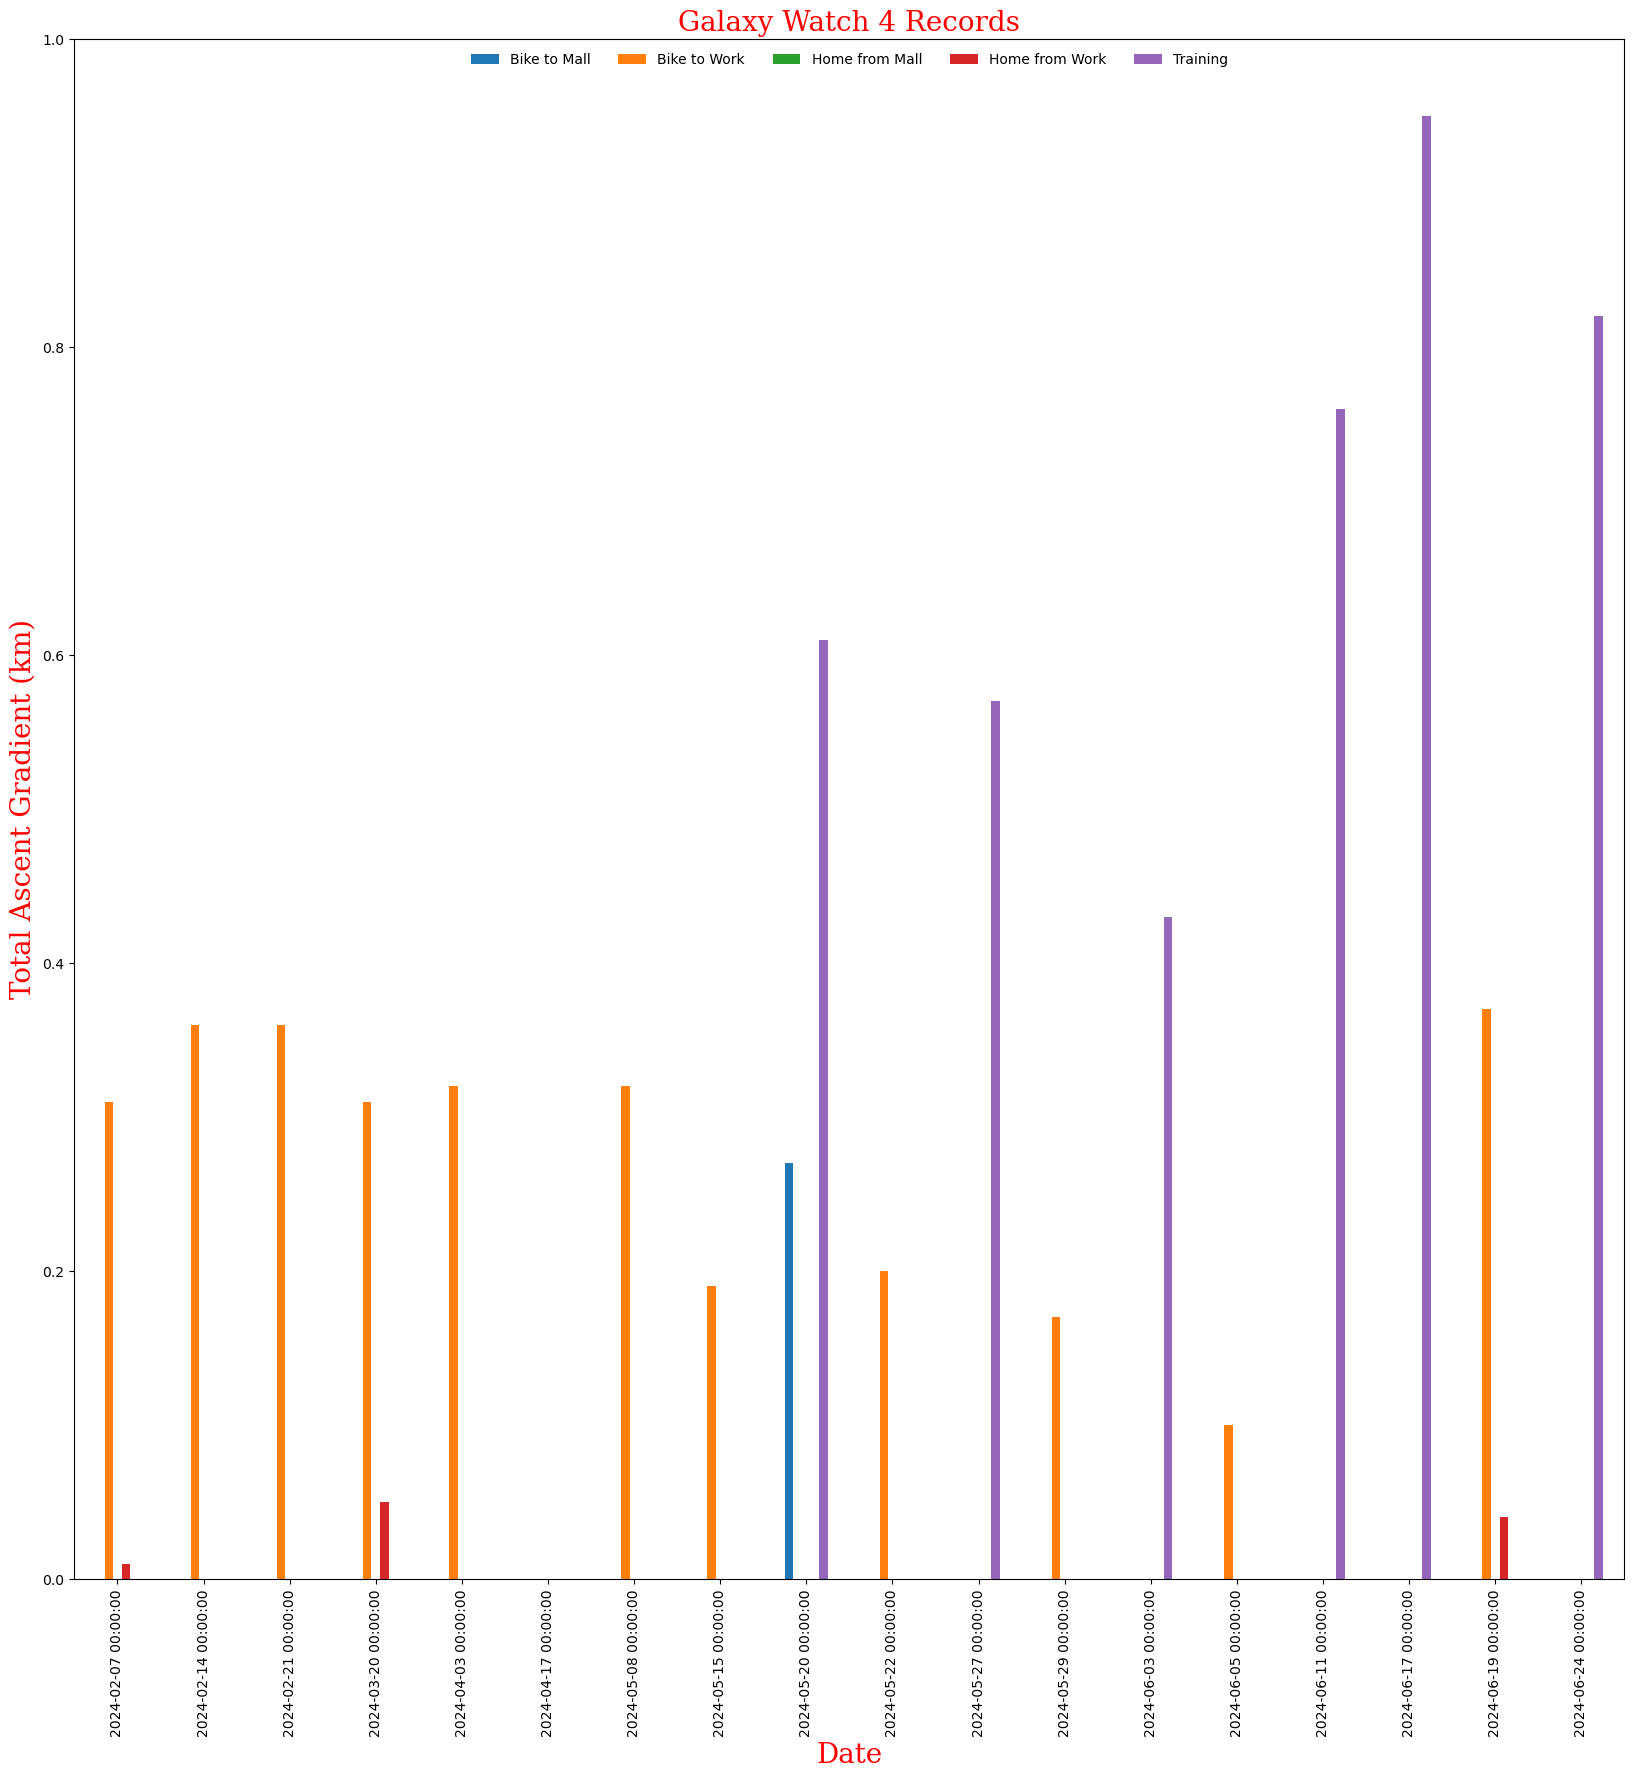

In [23]:
f1 = {'family': 'serif', 'size':20, 'color': 'red'}
tagt.plot(figsize=(20,20), kind="bar")
plt.legend(["Bike to Mall", "Bike to Work", "Home from Mall", "Home from Work", "Training"], borderpad=0.5, fontsize=10, loc="upper center", frameon=False, ncol=6)
plt.title('Galaxy Watch 4 Records', fontdict=f1)
plt.xlabel('Date', fontdict=f1)
plt.ylabel('Total Ascent Gradient (km)', fontdict=f1)
plt.ylim(0, 1)
plt.savefig("fig/tagt_gw4.png")
plt.show()

In [24]:
tdg_btm = gst.loc[gst["Purpose"] == "Bike to Mall"].loc[:,"Total Descent Gradient"]
tdg_btmd = tdg_btm.to_frame(name="Bike to Mall")
tdg_btw = gst.loc[gst["Purpose"] == "Bike to Work"].loc[:,"Total Descent Gradient"]
tdg_btwd = tdg_btw.to_frame(name="Bike to Work")
tdg_hfm = gst.loc[gst["Purpose"] == "Home from Mall"].loc[:,"Total Descent Gradient"]
tdg_hfmd = tdg_hfm.to_frame(name="Home from Mall")
tdg_hfw = gst.loc[gst["Purpose"] == "Home from Work"].loc[:,"Total Descent Gradient"]
tdg_hfwd = tdg_hfw.to_frame(name="Home from Work")
tdg_tra = gst.loc[gst["Purpose"] == "Training"].loc[:,"Total Descent Gradient"]
tdg_trad = tdg_tra.to_frame(name="Training")
dlist = [tdg_btmd, tdg_btwd, tdg_hfmd, tdg_hfwd, tdg_trad]
tdgt = pd.concat(dlist, axis=1).fillna(0)
tdgt.columns = pd.MultiIndex.from_product([["Total Descent Gradient"], ["Bike to Mall", "Bike to Work", "Home from Mall", "Home from Work", "Training"]])
tdgt.head() #total descent gradient total

Total Descent Gradient                                             \
                     Bike to Mall Bike to Work Home from Mall Home from Work   
Date                                                                           
2024-02-07                    0.0         0.01            0.0           0.31   
2024-02-14                    0.0         0.02            0.0           0.23   
2024-02-21                    0.0         0.08            0.0           0.29   
2024-03-20                    0.0         0.00            0.0           0.28   
2024-04-03                    0.0         0.01            0.0           0.00   

                     
           Training  
Date                 
2024-02-07      0.0  
2024-02-14      0.0  
2024-02-21      0.0  
2024-03-20      0.0  
2024-04-03      0.0

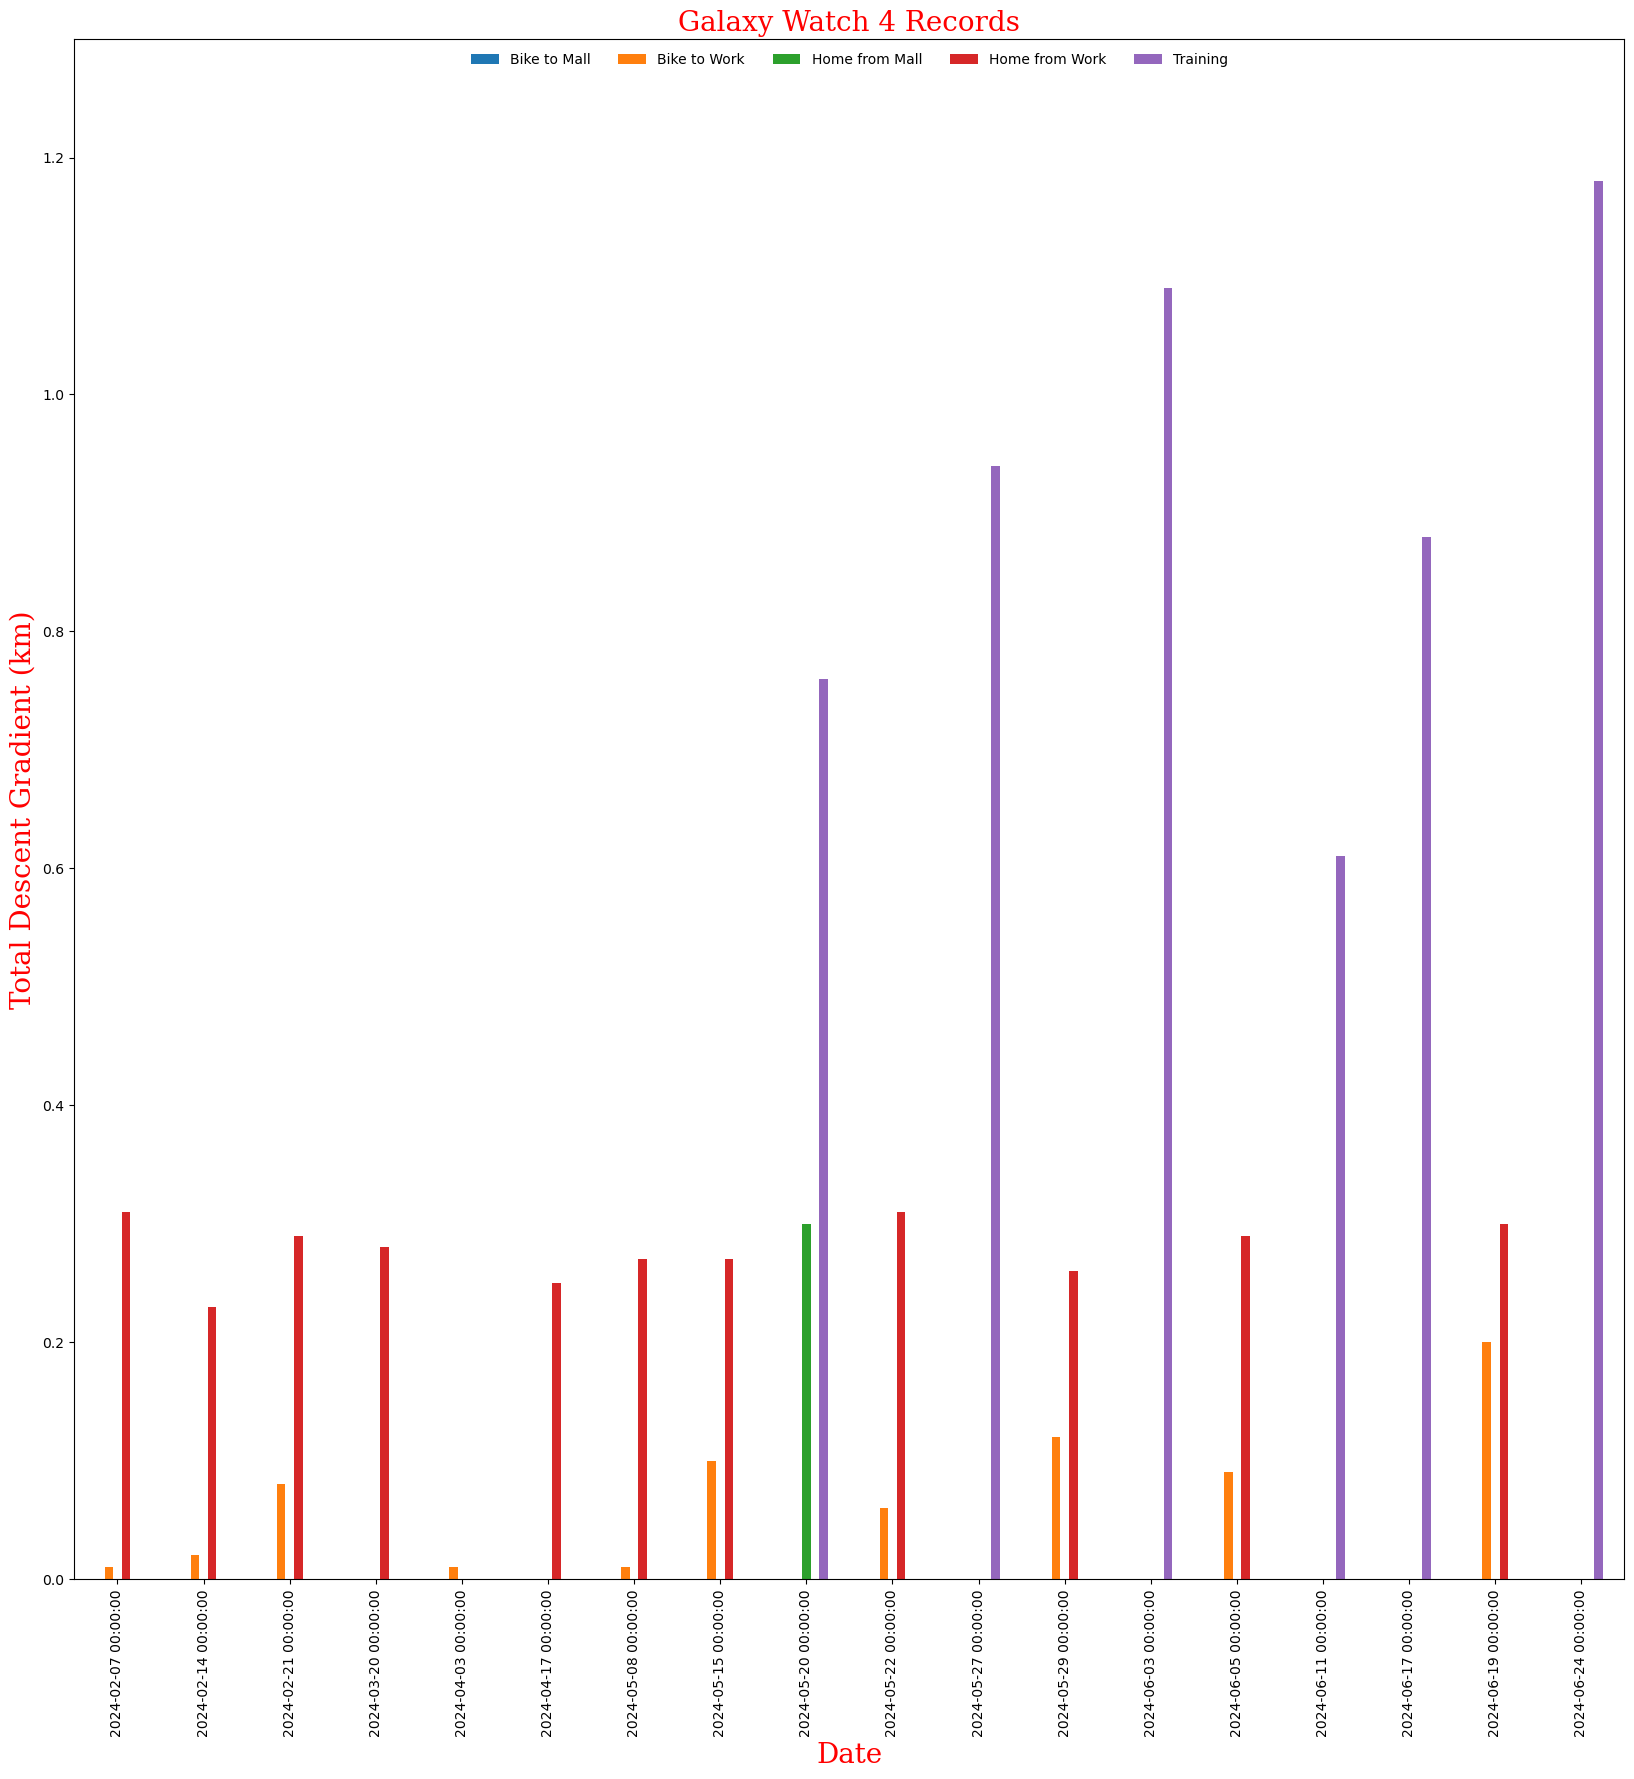

In [25]:
f1 = {'family': 'serif', 'size':20, 'color': 'red'}
tdgt.plot(figsize=(20,20), kind="bar")
plt.legend(["Bike to Mall", "Bike to Work", "Home from Mall", "Home from Work", "Training"], borderpad=0.5, fontsize=10, loc="upper center", frameon=False, ncol=6)
plt.title('Galaxy Watch 4 Records', fontdict=f1)
plt.xlabel('Date', fontdict=f1)
plt.ylabel('Total Descent Gradient (km)', fontdict=f1)
plt.ylim(0, 1.3)
plt.savefig("fig/tdgt_gw4.png")
plt.show()

In [26]:
w_btm = gst.loc[gst["Purpose"] == "Bike to Mall"].loc[:,"Weather"]
w_btmd = w_btm.to_frame(name="Bike to Mall")
w_btw = gst.loc[gst["Purpose"] == "Bike to Work"].loc[:,"Weather"]
w_btwd = w_btw.to_frame(name="Bike to Work")
w_hfm = gst.loc[gst["Purpose"] == "Home from Mall"].loc[:,"Weather"]
w_hfmd = w_hfm.to_frame(name="Home from Mall")
w_hfw = gst.loc[gst["Purpose"] == "Home from Work"].loc[:,"Weather"]
w_hfwd = w_hfw.to_frame(name="Home from Work")
w_tra = gst.loc[gst["Purpose"] == "Training"].loc[:,"Weather"]
w_trad = w_tra.to_frame(name="Training")
dlist = [w_btmd, w_btwd, w_hfmd, w_hfwd, w_trad]
wt = pd.concat(dlist, axis=1).fillna(0)
wt.columns = pd.MultiIndex.from_product([["Weather"], ["Bike to Mall", "Bike to Work", "Home from Mall", "Home from Work", "Training"]])
wt.head() #weather total

Weather                                                    
           Bike to Mall Bike to Work Home from Mall Home from Work Training
Date                                                                       
2024-02-07          0.0          0.0            0.0           29.0      0.0
2024-02-14          0.0         30.0            0.0           28.0      0.0
2024-02-21          0.0         29.0            0.0            0.0      0.0
2024-03-20          0.0         31.0            0.0           31.0      0.0
2024-04-03          0.0         32.0            0.0            0.0      0.0

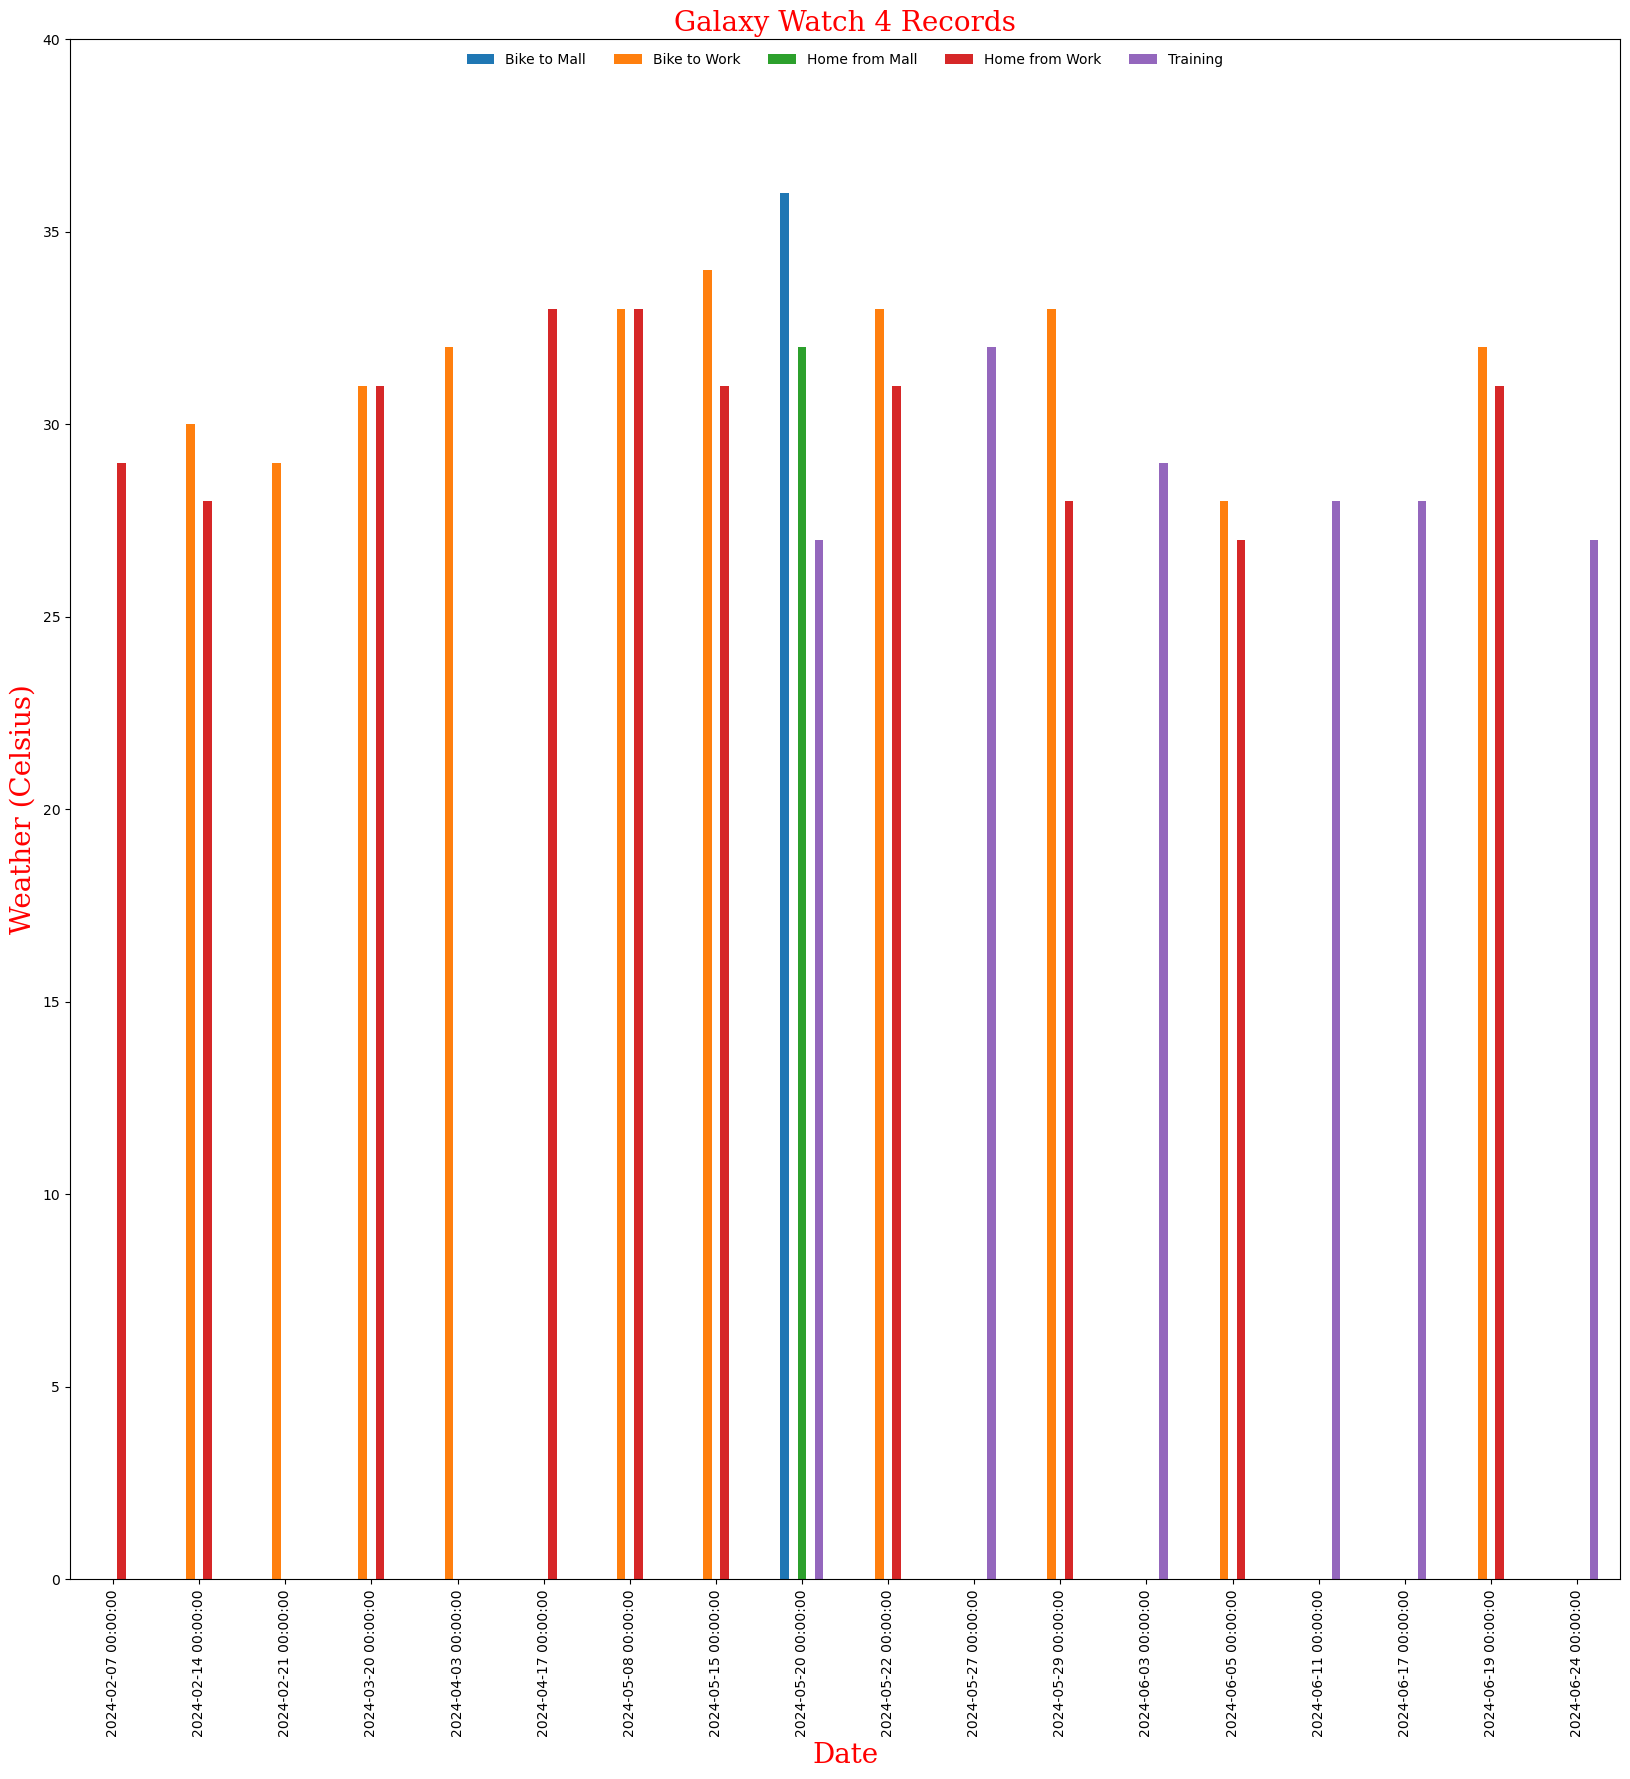

In [27]:
f1 = {'family': 'serif', 'size':20, 'color': 'red'}
wt.plot(figsize=(20,20), kind="bar")
plt.legend(["Bike to Mall", "Bike to Work", "Home from Mall", "Home from Work", "Training"], borderpad=0.5, fontsize=10, loc="upper center", frameon=False, ncol=6)
plt.title('Galaxy Watch 4 Records', fontdict=f1)
plt.xlabel('Date', fontdict=f1)
plt.ylabel('Weather (Celsius)', fontdict=f1)
plt.ylim(0, 40)
plt.savefig("fig/wt_gw4.png")
plt.show()

In [28]:
catt = pd.concat([ahrt, apt, ast, ctt, dt, dtt, egt, tagt, tdgt, wt], axis=1)
catt.head() #category total merged

Average Heart Rate                                             \
                 Bike to Mall Bike to Work Home from Mall Home from Work   
Date                                                                       
2024-02-07                0.0          0.0            0.0            0.0   
2024-02-14                0.0          0.0            0.0            0.0   
2024-02-21                0.0          0.0            0.0            0.0   
2024-03-20                0.0        153.0            0.0          146.0   
2024-04-03                0.0        111.0            0.0            0.0   

                    Average Pace                                             \
           Training Bike to Mall Bike to Work Home from Mall Home from Work   
Date                                                                          
2024-02-07      0.0          0.0        418.0            0.0          249.0   
2024-02-14      0.0          0.0        297.0            0.0          260.0   
2024-02-21      0.0          0.0        294.0            0.0          250.0   
2024-03-20      0.0          0.0        295.0            0.0          226.0   
2024-04-03      0.0          0.0        271.0            0.0            0.0   

                     ... Total Descent Gradient                              \
           Training  ...           Bike to Mall Bike to Work Home from Mall   
Date                 ...                                                      
2024-02-07      0.0  ...                    0.0         0.01            0.0   
2024-02-14      0.0  ...                    0.0         0.02            0.0   
2024-02-21      0.0  ...                    0.0         0.08            0.0   
2024-03-20      0.0  ...                    0.0         0.00            0.0   
2024-04-03      0.0  ...                    0.0         0.01            0.0   

                                        Weather                              \
           Home from Work Training Bike to Mall Bike to Work Home from Mall   
Date                                                                          
2024-02-07           0.31      0.0          0.0          0.0            0.0   
2024-02-14           0.23      0.0          0.0         30.0            0.0   
2024-02-21           0.29      0.0          0.0         29.0            0.0   
2024-03-20           0.28      0.0          0.0         31.0            0.0   
2024-04-03           0.00      0.0          0.0         32.0            0.0   

                                    
           Home from Work Training  
Date                                
2024-02-07           29.0      0.0  
2024-02-14           28.0      0.0  
2024-02-21            0.0      0.0  
2024-03-20           31.0      0.0  
2024-04-03            0.0      0.0  

[5 rows x 50 columns]

In [29]:
#Rankings Average Heart Rate
ahrbtm_r = ahr_btmd
ahrbtmr = ahrbtm_r["Bike to Mall"].rank(ascending=True)
ahrbtm_r['BTMR'] = ahrbtmr
ahrbtm_r = ahrbtm_r.sort_values('BTMR').head(3)

ahrbtw_r = ahr_btwd
ahrbtwr = ahrbtw_r["Bike to Work"].rank(ascending=True)
ahrbtw_r['BTWR'] = ahrbtwr
ahrbtw_r = ahrbtw_r.sort_values('BTWR').head(3)

ahrhfm_r = ahr_hfmd
ahrhfmr = ahrhfm_r["Home from Mall"].rank(ascending=True)
ahrhfm_r['HFMR'] = ahrhfmr
ahrhfm_r = ahrhfm_r.sort_values('HFMR').head(3)

ahrhfw_r = ahr_hfwd
ahrhfwr = ahrhfw_r["Home from Work"].rank(ascending=True)
ahrhfw_r['HFWR'] = ahrhfwr
ahrhfw_r = ahrhfw_r.sort_values('HFWR').head(3)

ahrtra_r = ahr_trad
ahrtrar = ahrtra_r["Training"].rank(ascending=True)
ahrtra_r['TRAR'] = ahrtrar
ahrtra_r = ahrtra_r.sort_values('TRAR').head(3)

ahrlistr = [ahrbtm_r, ahrbtw_r, ahrhfm_r, ahrhfw_r, ahrtra_r]
ahrtr = pd.concat(ahrlistr, axis=1).fillna('0').sort_values(['BTMR', 'BTWR', 'HFMR', 'HFWR', 'TRAR'], ascending=[True,True,True,True,True])
ahrtr.columns = pd.MultiIndex.from_product([["Average Heart Rate"], ["Bike to Mall", "BTMR", "Bike to Work", "BTWR", "Home from Mall", "HFMR", "Home from Work", "HFWR", "Training", "TRAR"]])
ahrtr = ahrtr.iloc[:, [0, 2, 4, 6, 8]].astype(float)
ahrtr #average heart rate total rank

Average Heart Rate                                             \
                 Bike to Mall Bike to Work Home from Mall Home from Work   
Date                                                                       
2024-04-03                0.0        111.0            0.0            0.0   
2024-03-20                0.0        153.0            0.0          146.0   
2024-06-05                0.0        156.0            0.0            0.0   
2024-05-29                0.0          0.0            0.0          140.0   
2024-04-17                0.0          0.0            0.0          142.0   
2024-05-20                0.0          0.0            0.0            0.0   
2024-06-11                0.0          0.0            0.0            0.0   
2024-05-27                0.0          0.0            0.0            0.0   

                     
           Training  
Date                 
2024-04-03      0.0  
2024-03-20      0.0  
2024-06-05      0.0  
2024-05-29      0.0  
2024-04-17      0.0  
2024-05-20    131.0  
2024-06-11    157.0  
2024-05-27    161.0

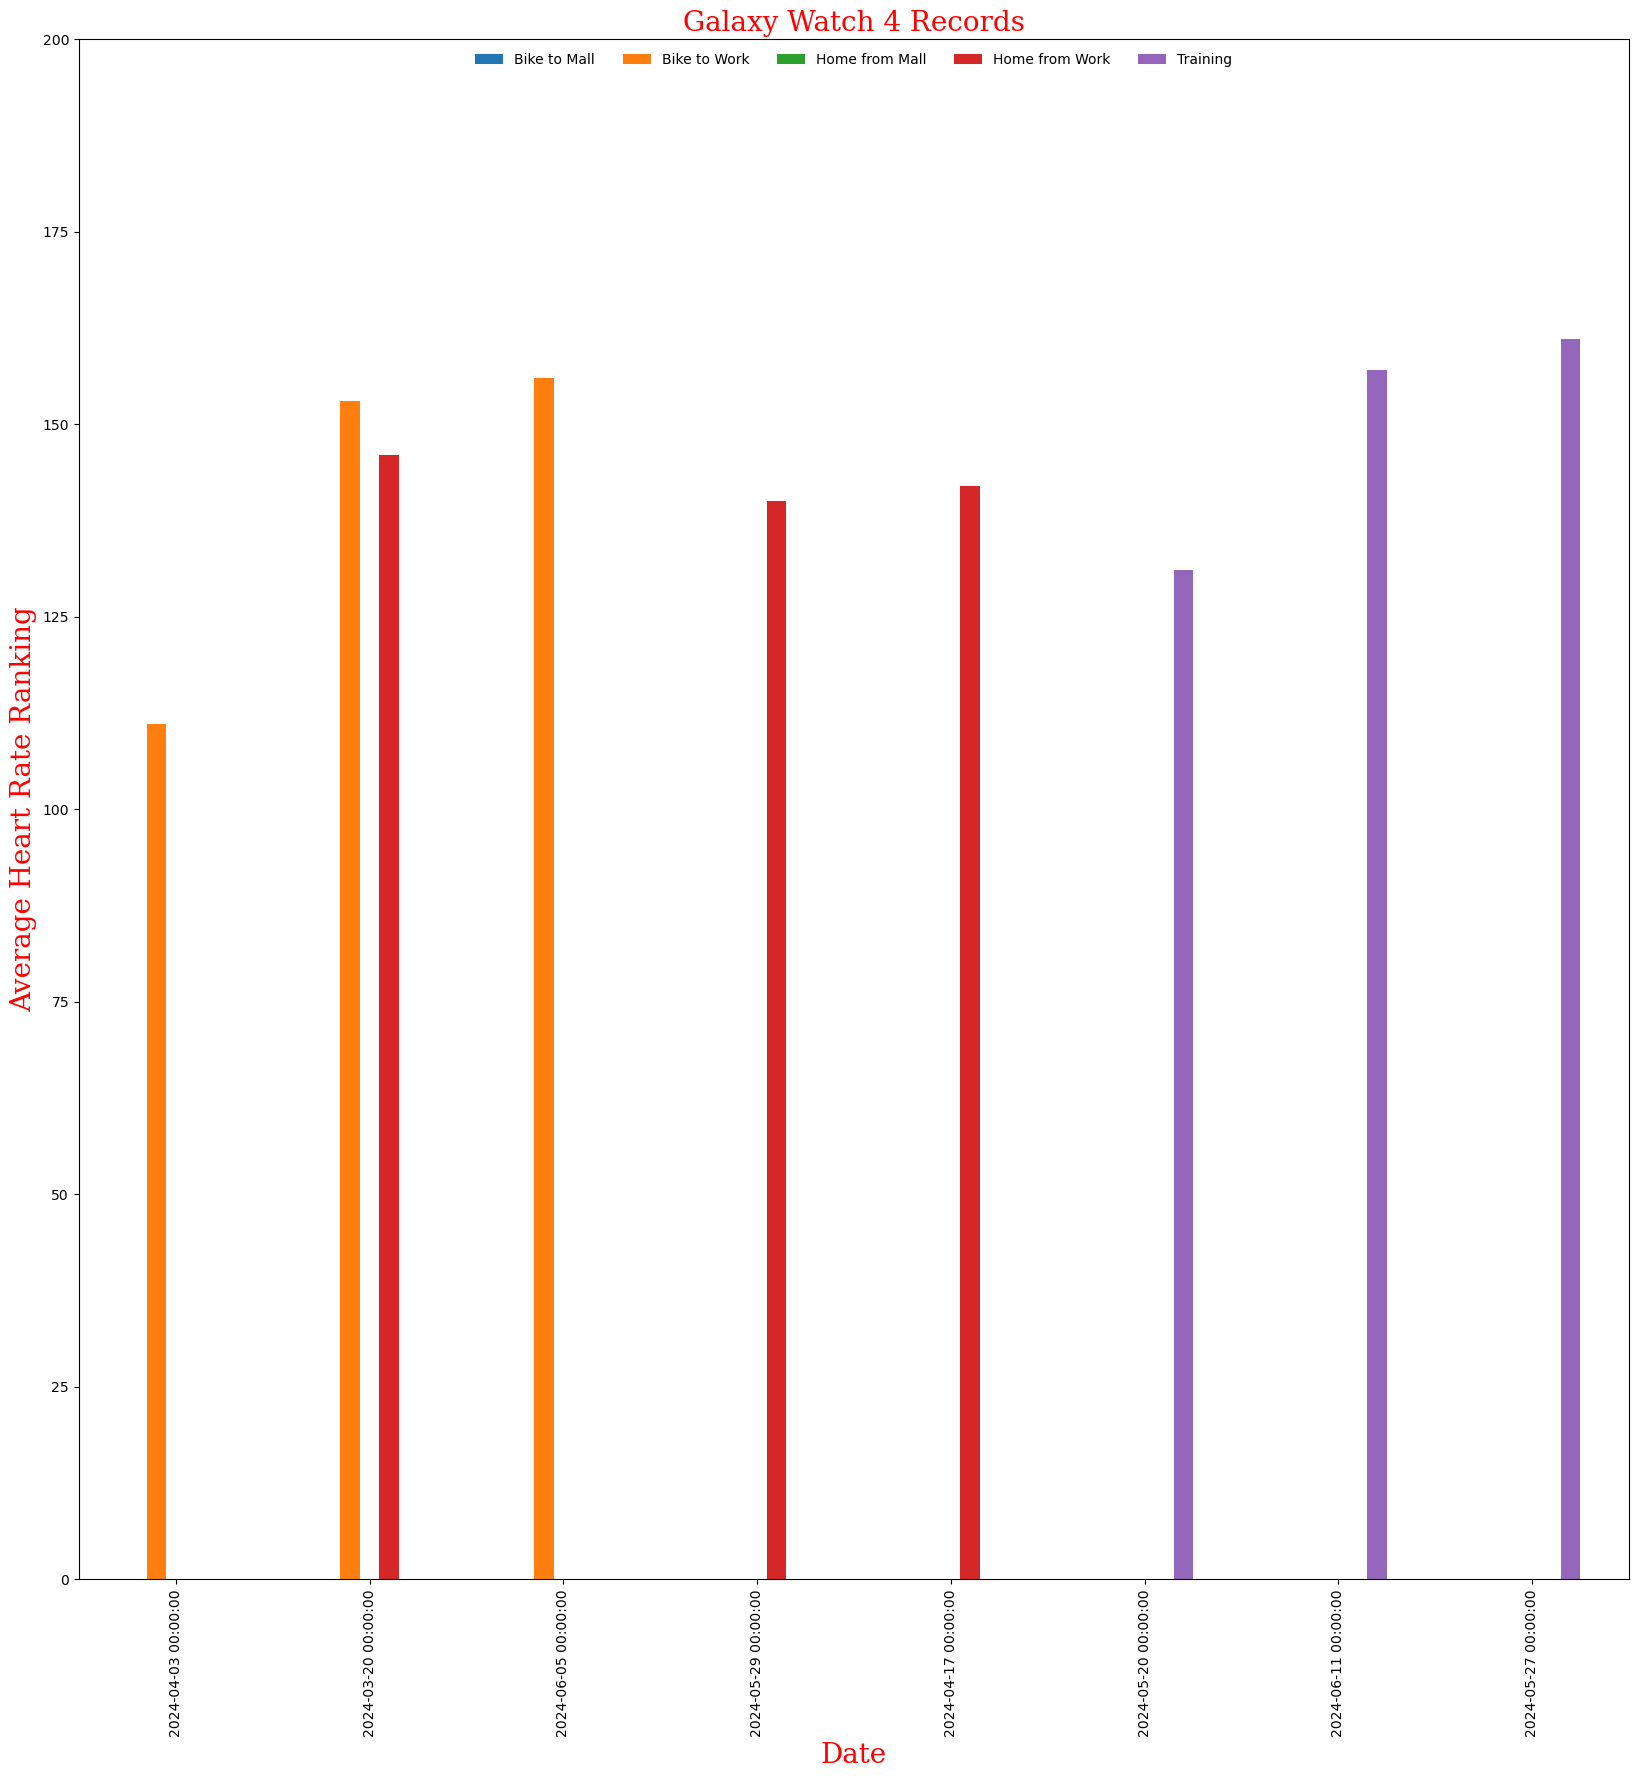

In [58]:
f1 = {'family': 'serif', 'size':20, 'color': 'red'}
ahrtr.plot(figsize=(20,20), kind="bar")
plt.legend(["Bike to Mall", "Bike to Work", "Home from Mall", "Home from Work", "Training"], borderpad=0.5, fontsize=10, loc="upper center", frameon=False, ncol=6)
plt.title('Galaxy Watch 4 Records', fontdict=f1)
plt.xlabel('Date', fontdict=f1)
plt.ylabel('Average Heart Rate Ranking', fontdict=f1)
plt.ylim(0, 200)
plt.savefig("fig/ahrtr_gw4.png")
plt.show()

In [73]:
#Rankings Average Pace
apbtm_r = ap_btmd
apbtmr = apbtm_r["Bike to Mall"].rank(ascending=True)
apbtm_r['BTMR'] = apbtmr
apbtm_r = apbtm_r.sort_values('BTMR').head(3)

apbtw_r = ap_btwd
apbtwr = apbtw_r["Bike to Work"].rank(ascending=True)
apbtw_r['BTWR'] = apbtwr
apbtw_r = apbtw_r.sort_values('BTWR').head(3)

aphfm_r = ap_hfmd
aphfmr = aphfm_r["Home from Mall"].rank(ascending=True)
aphfm_r['HFMR'] = aphfmr
aphfm_r = aphfm_r.sort_values('HFMR').head(3)

aphfw_r = ap_hfwd
aphfwr = aphfw_r["Home from Work"].rank(ascending=True)
aphfw_r['HFWR'] = aphfwr
aphfw_r = aphfw_r.sort_values('HFWR').head(3)

aptra_r = ap_trad
aptrar = aptra_r["Training"].rank(ascending=True)
aptra_r['TRAR'] = aptrar
aptra_r = aptra_r.sort_values('TRAR').head(3)

aplistr = [apbtm_r, apbtw_r, aphfm_r, aphfw_r, aptra_r]
aptr = pd.concat(aplistr, axis=1).fillna('0').sort_values(['BTMR', 'BTWR', 'HFMR', 'HFWR', 'TRAR'], ascending=[True,True,True,True,True])
aptr.columns = pd.MultiIndex.from_product([["Average Pace"], ["Bike to Mall", "BTMR", "Bike to Work", "BTWR", "Home from Mall", "HFMR", "Home from Work", "HFWR", "Training", "TRAR"]])
aptr = aptr.iloc[:, [0, 2, 4, 6, 8]].astype(float)
aptr #average pace total rank

Average Pace                                                    
           Bike to Mall Bike to Work Home from Mall Home from Work Training
Date                                                                       
2024-05-20        272.0          0.0          209.0            0.0      0.0
2024-06-05          0.0        207.0            0.0          208.0      0.0
2024-05-29          0.0        220.0            0.0            0.0      0.0
2024-06-19          0.0        227.0            0.0            0.0      0.0
2024-05-22          0.0          0.0            0.0          195.0      0.0
2024-05-15          0.0          0.0            0.0          206.0      0.0
2024-06-11          0.0          0.0            0.0            0.0    200.0
2024-06-03          0.0          0.0            0.0            0.0    210.0
2024-06-24          0.0          0.0            0.0            0.0    229.0

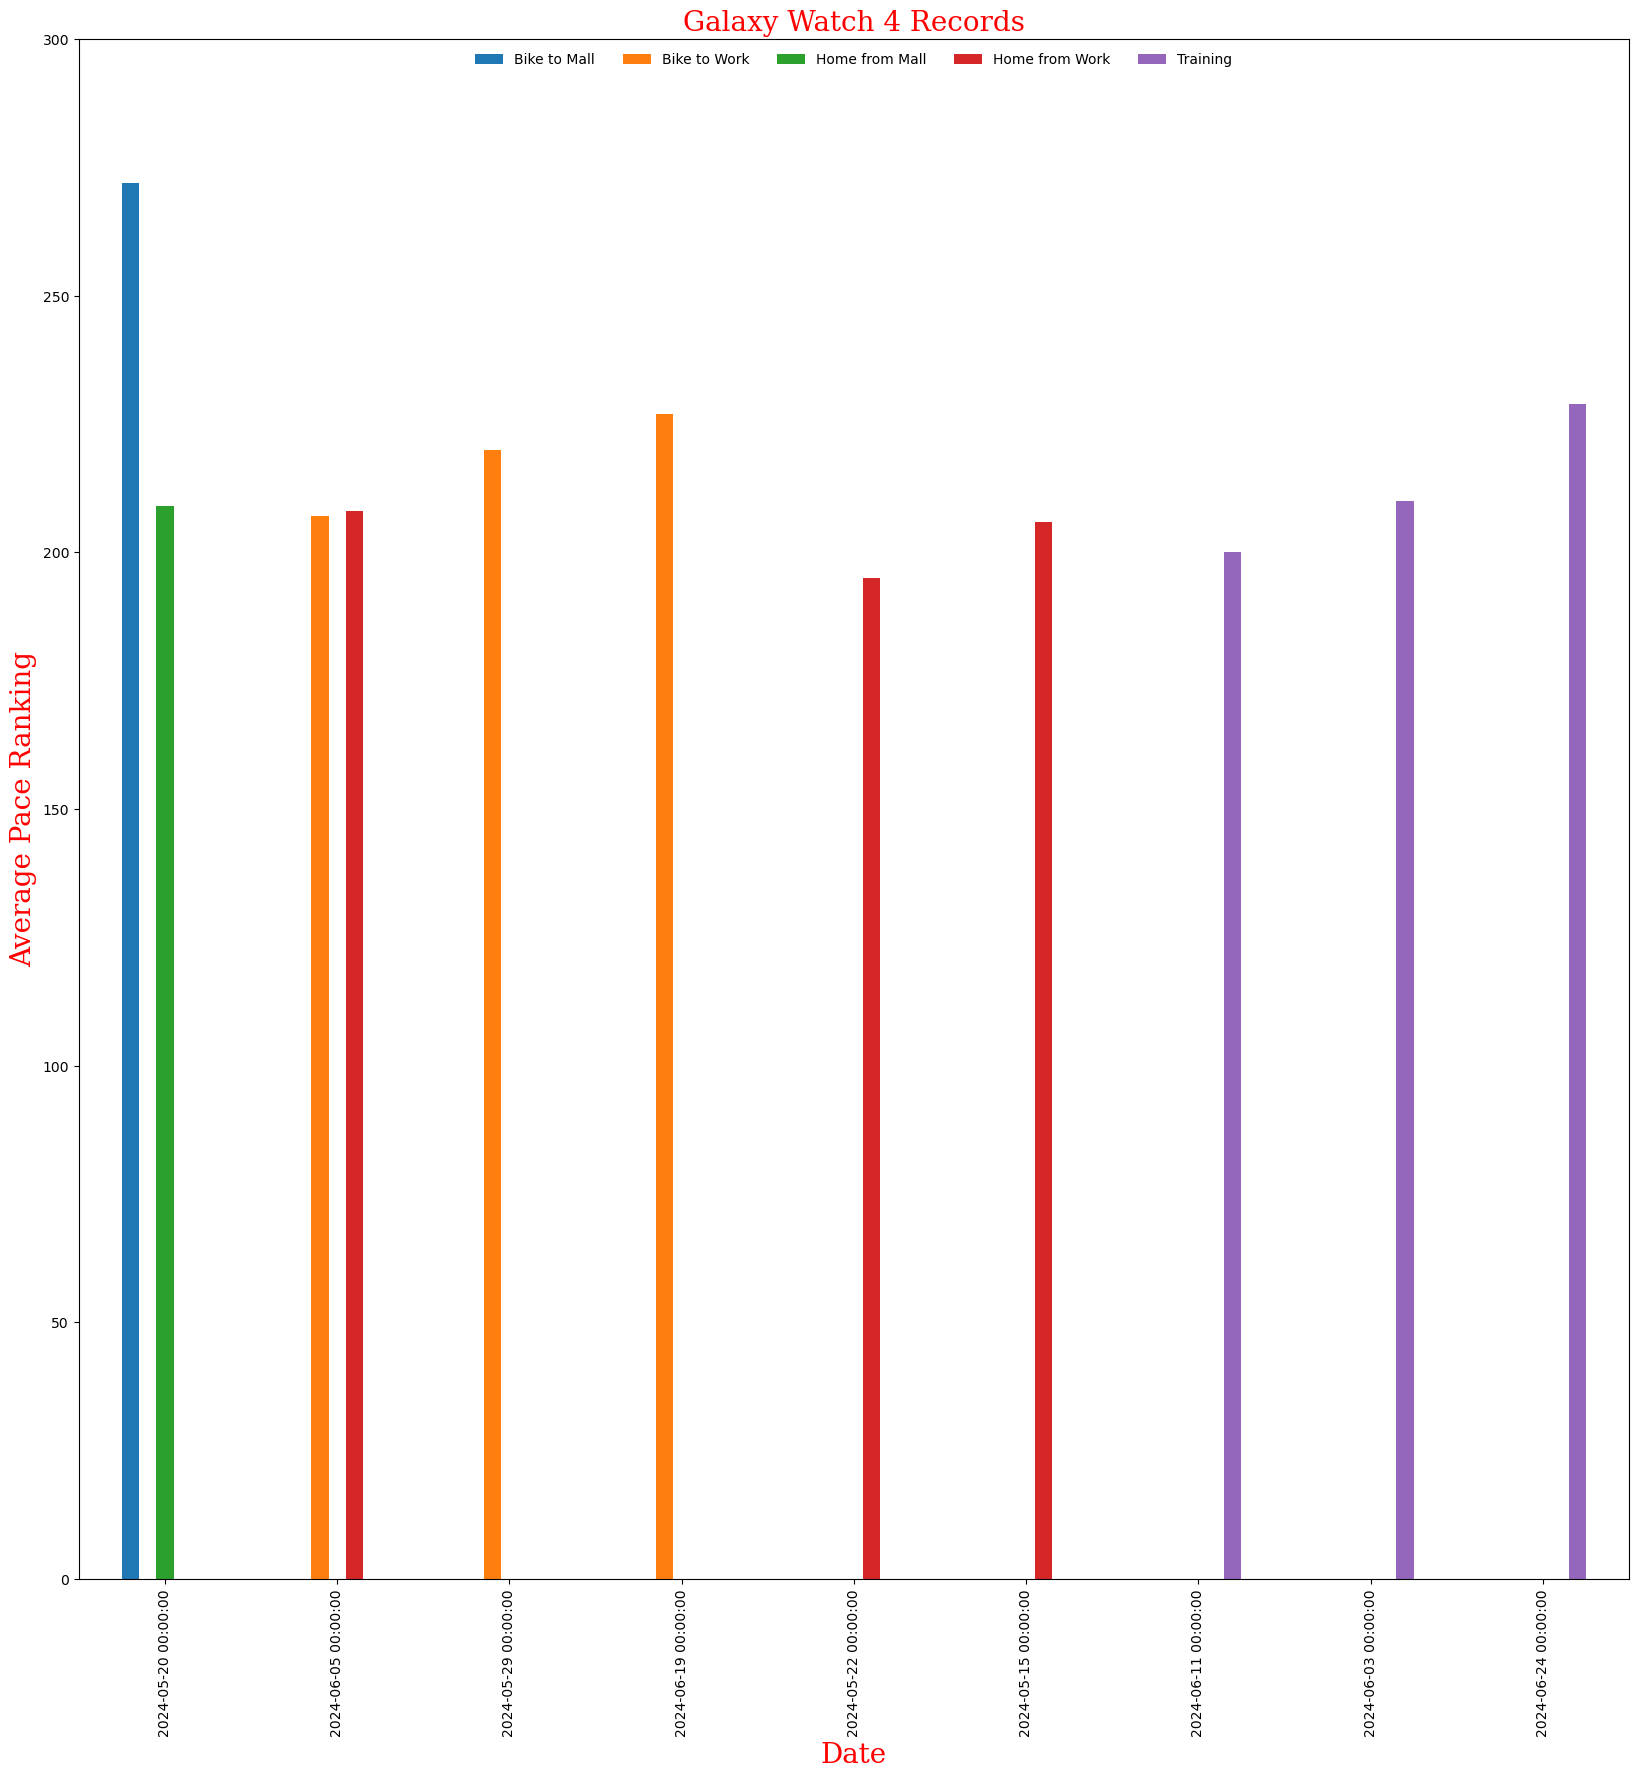

In [59]:
f1 = {'family': 'serif', 'size':20, 'color': 'red'}
aptr.plot(figsize=(20,20), kind="bar")
plt.legend(["Bike to Mall", "Bike to Work", "Home from Mall", "Home from Work", "Training"], borderpad=0.5, fontsize=10, loc="upper center", frameon=False, ncol=6)
plt.title('Galaxy Watch 4 Records', fontdict=f1)
plt.xlabel('Date', fontdict=f1)
plt.ylabel('Average Pace Ranking', fontdict=f1)
plt.ylim(0, 300)
plt.savefig("fig/aptr_gw4.png")
plt.show()

In [33]:
#Rankings Average Speed
asbtm_r = as_btmd
asbtmr = asbtm_r["Bike to Mall"].rank(ascending=False)
asbtm_r['BTMR'] = asbtmr
asbtm_r = asbtm_r.sort_values('BTMR').head(3)

asbtw_r = as_btwd
asbtwr = asbtw_r["Bike to Work"].rank(ascending=False)
asbtw_r['BTWR'] = asbtwr
asbtw_r = asbtw_r.sort_values('BTWR').head(3)

ashfm_r = as_hfmd
ashfmr = ashfm_r["Home from Mall"].rank(ascending=False)
ashfm_r['HFMR'] = ashfmr
ashfm_r = ashfm_r.sort_values('HFMR').head(3)

ashfw_r = as_hfwd
ashfwr = ashfw_r["Home from Work"].rank(ascending=False)
ashfw_r['HFWR'] = ashfwr
ashfw_r = ashfw_r.sort_values('HFWR').head(3)

astra_r = as_trad
astrar = astra_r["Training"].rank(ascending=False)
astra_r['TRAR'] = astrar
astra_r = astra_r.sort_values('TRAR').head(3)

aslistr = [asbtm_r, asbtw_r, ashfm_r, ashfw_r, astra_r]
astr = pd.concat(aslistr, axis=1).fillna('0').sort_values(['BTMR', 'BTWR', 'HFMR', 'HFWR', 'TRAR'], ascending=[True,True,True,True,True])
astr.columns = pd.MultiIndex.from_product([["Average Speed"], ["Bike to Mall", "BTMR", "Bike to Work", "BTWR", "Home from Mall", "HFMR", "Home from Work", "HFWR", "Training", "TRAR"]])
astr = astr.iloc[:, [0, 2, 4, 6, 8]].astype(float)
astr #average speed total rank

Average Speed                                                    
            Bike to Mall Bike to Work Home from Mall Home from Work Training
Date                                                                        
2024-05-20          13.2          0.0           17.2            0.0      0.0
2024-06-05           0.0         17.3            0.0           17.2      0.0
2024-05-29           0.0         16.3            0.0            0.0      0.0
2024-06-19           0.0         15.8            0.0            0.0      0.0
2024-05-22           0.0          0.0            0.0           18.3      0.0
2024-05-15           0.0          0.0            0.0           17.4      0.0
2024-06-11           0.0          0.0            0.0            0.0     17.9
2024-06-03           0.0          0.0            0.0            0.0     17.0
2024-06-24           0.0          0.0            0.0            0.0     15.7

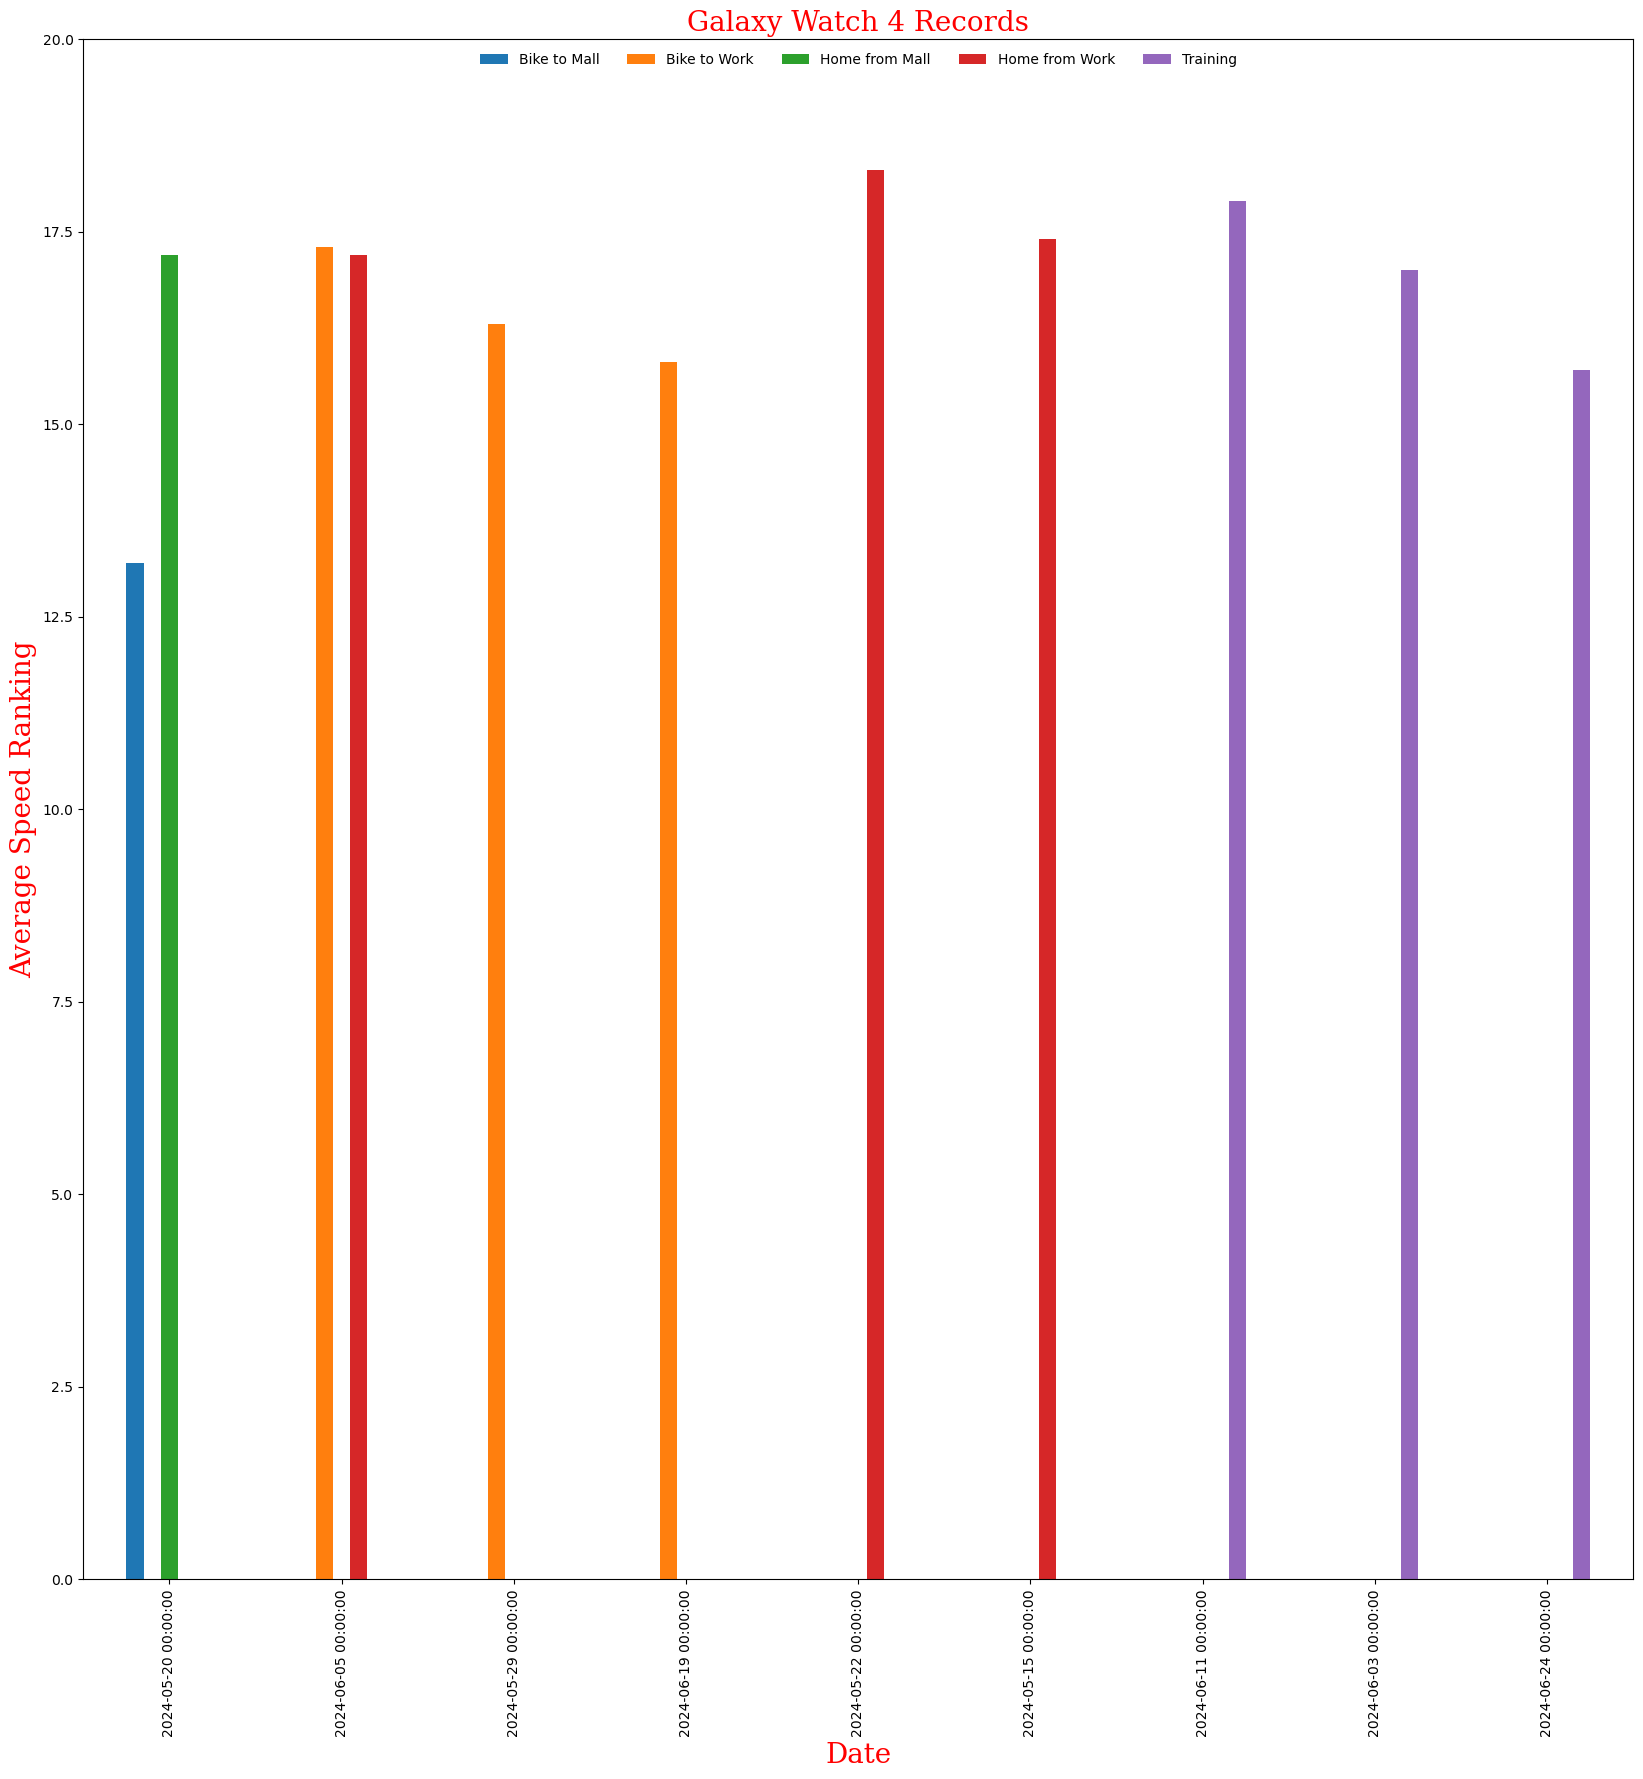

In [60]:
f1 = {'family': 'serif', 'size':20, 'color': 'red'}
astr.plot(figsize=(20,20), kind="bar")
plt.legend(["Bike to Mall", "Bike to Work", "Home from Mall", "Home from Work", "Training"], borderpad=0.5, fontsize=10, loc="upper center", frameon=False, ncol=6)
plt.title('Galaxy Watch 4 Records', fontdict=f1)
plt.xlabel('Date', fontdict=f1)
plt.ylabel('Average Speed Ranking', fontdict=f1)
plt.ylim(0, 20)
plt.savefig("fig/astr_gw4.png")
plt.show()

In [35]:
#Rankings Calories Total
ctbtm_r = ct_btmd
ctbtmr = ctbtm_r["Bike to Mall"].rank(ascending=False)
ctbtm_r['BTMR'] = ctbtmr
ctbtm_r = ctbtm_r.sort_values('BTMR').head(3)

ctbtw_r = ct_btwd
ctbtwr = ctbtw_r["Bike to Work"].rank(ascending=False)
ctbtw_r['BTWR'] = ctbtwr
ctbtw_r = ctbtw_r.sort_values('BTWR').head(3)

cthfm_r = ct_hfmd
cthfmr = cthfm_r["Home from Mall"].rank(ascending=False)
cthfm_r['HFMR'] = cthfmr
cthfm_r = cthfm_r.sort_values('HFMR').head(3)

cthfw_r = ct_hfwd
cthfwr = cthfw_r["Home from Work"].rank(ascending=False)
cthfw_r['HFWR'] = cthfwr
cthfw_r = cthfw_r.sort_values('HFWR').head(3)

cttra_r = ct_trad
cttrar = cttra_r["Training"].rank(ascending=False)
cttra_r['TRAR'] = cttrar
cttra_r = cttra_r.sort_values('TRAR').head(3)

ctlistr = [ctbtm_r, ctbtw_r, cthfm_r, cthfw_r, cttra_r]
cttr = pd.concat(ctlistr, axis=1).fillna('0').sort_values(['BTMR', 'BTWR', 'HFMR', 'HFWR', 'TRAR'], ascending=[True,True,True,True,True])
cttr.columns = pd.MultiIndex.from_product([["Calories Total"], ["Bike to Mall", "BTMR", "Bike to Work", "BTWR", "Home from Mall", "HFMR", "Home from Work", "HFWR", "Training", "TRAR"]])
cttr = cttr.iloc[:, [0, 2, 4, 6, 8]].astype(float)
cttr #calories total total rank

Calories Total                                                    
             Bike to Mall Bike to Work Home from Mall Home from Work Training
Date                                                                         
2024-05-20          121.0          0.0          121.0            0.0   1550.0
2024-06-05            0.0        353.0            0.0            0.0      0.0
2024-05-29            0.0        308.0            0.0            0.0      0.0
2024-02-07            0.0        283.0            0.0            0.0      0.0
2024-06-19            0.0          0.0            0.0          236.0      0.0
2024-02-14            0.0          0.0            0.0          233.0      0.0
2024-04-17            0.0          0.0            0.0          199.0      0.0
2024-06-24            0.0          0.0            0.0            0.0   1835.0
2024-06-11            0.0          0.0            0.0            0.0   1386.0

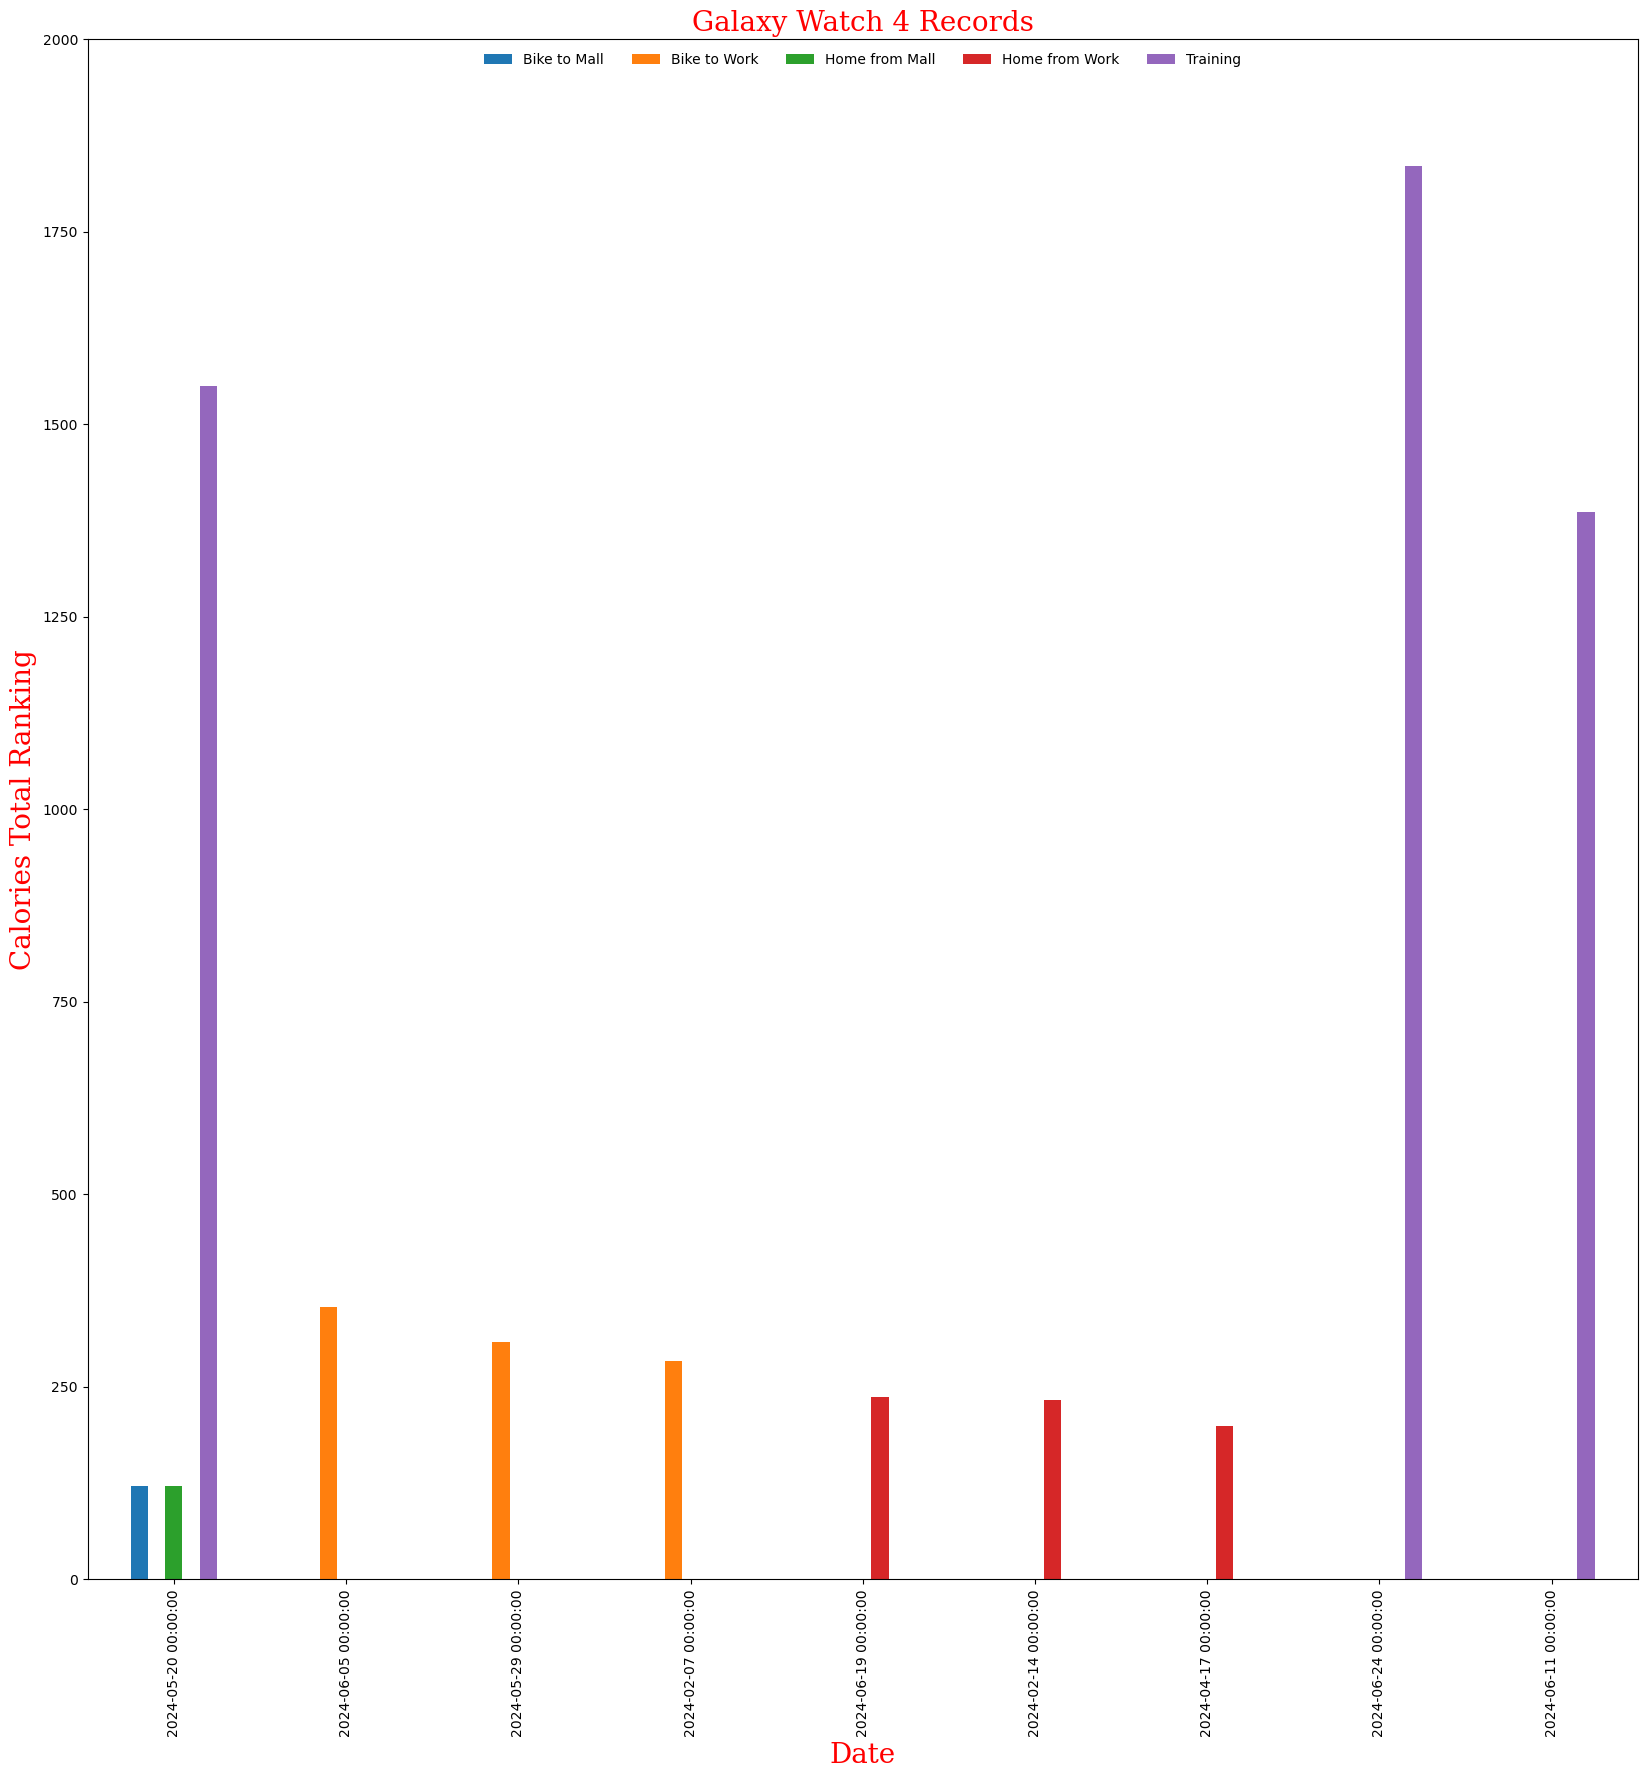

In [61]:
f1 = {'family': 'serif', 'size':20, 'color': 'red'}
cttr.plot(figsize=(20,20), kind="bar")
plt.legend(["Bike to Mall", "Bike to Work", "Home from Mall", "Home from Work", "Training"], borderpad=0.5, fontsize=10, loc="upper center", frameon=False, ncol=6)
plt.title('Galaxy Watch 4 Records', fontdict=f1)
plt.xlabel('Date', fontdict=f1)
plt.ylabel('Calories Total Ranking', fontdict=f1)
plt.ylim(0, 2000)
plt.savefig("fig/cttr_gw4.png")
plt.show()

In [37]:
#Rankings Distance
dbtm_r = d_btmd
dbtmr = dbtm_r["Bike to Mall"].rank(ascending=False)
dbtm_r['BTMR'] = dbtmr
dbtm_r = dbtm_r.sort_values('BTMR').head(3)

dbtw_r = d_btwd
dbtwr = dbtw_r["Bike to Work"].rank(ascending=False)
dbtw_r['BTWR'] = dbtwr
dbtw_r = dbtw_r.sort_values('BTWR').head(3)

dhfm_r = d_hfmd
dhfmr = dhfm_r["Home from Mall"].rank(ascending=False)
dhfm_r['HFMR'] = dhfmr
dhfm_r = dhfm_r.sort_values('HFMR').head(3)

dhfw_r = d_hfwd
dhfwr = dhfw_r["Home from Work"].rank(ascending=False)
dhfw_r['HFWR'] = dhfwr
dhfw_r = dhfw_r.sort_values('HFWR').head(3)

dtra_r = d_trad
dtrar = dtra_r["Training"].rank(ascending=False)
dtra_r['TRAR'] = dtrar
dtra_r = dtra_r.sort_values('TRAR').head(3)

dlistr = [dbtm_r, dbtw_r, dhfm_r, dhfw_r, dtra_r]
dtr = pd.concat(dlistr, axis=1).fillna('0').sort_values(['BTMR', 'BTWR', 'HFMR', 'HFWR', 'TRAR'], ascending=[True,True,True,True,True])
dtr.columns = pd.MultiIndex.from_product([["Distance"], ["Bike to Mall", "BTMR", "Bike to Work", "BTWR", "Home from Mall", "HFMR", "Home from Work", "HFWR", "Training", "TRAR"]])
dtr = dtr.iloc[:, [0, 2, 4, 6, 8]].astype(float)
dtr #distance total rank

Distance                                                    
           Bike to Mall Bike to Work Home from Mall Home from Work Training
Date                                                                       
2024-05-20         3.25         0.00           3.04           0.00     0.00
2024-06-19         0.00         7.99           0.00           7.37     0.00
2024-05-29         0.00         6.56           0.00           0.00     0.00
2024-06-05         0.00         6.31           0.00           0.00     0.00
2024-02-21         0.00         0.00           0.00           4.19     0.00
2024-03-20         0.00         0.00           0.00           4.15     0.00
2024-06-24         0.00         0.00           0.00           0.00    57.83
2024-06-17         0.00         0.00           0.00           0.00    38.95
2024-06-11         0.00         0.00           0.00           0.00    33.93

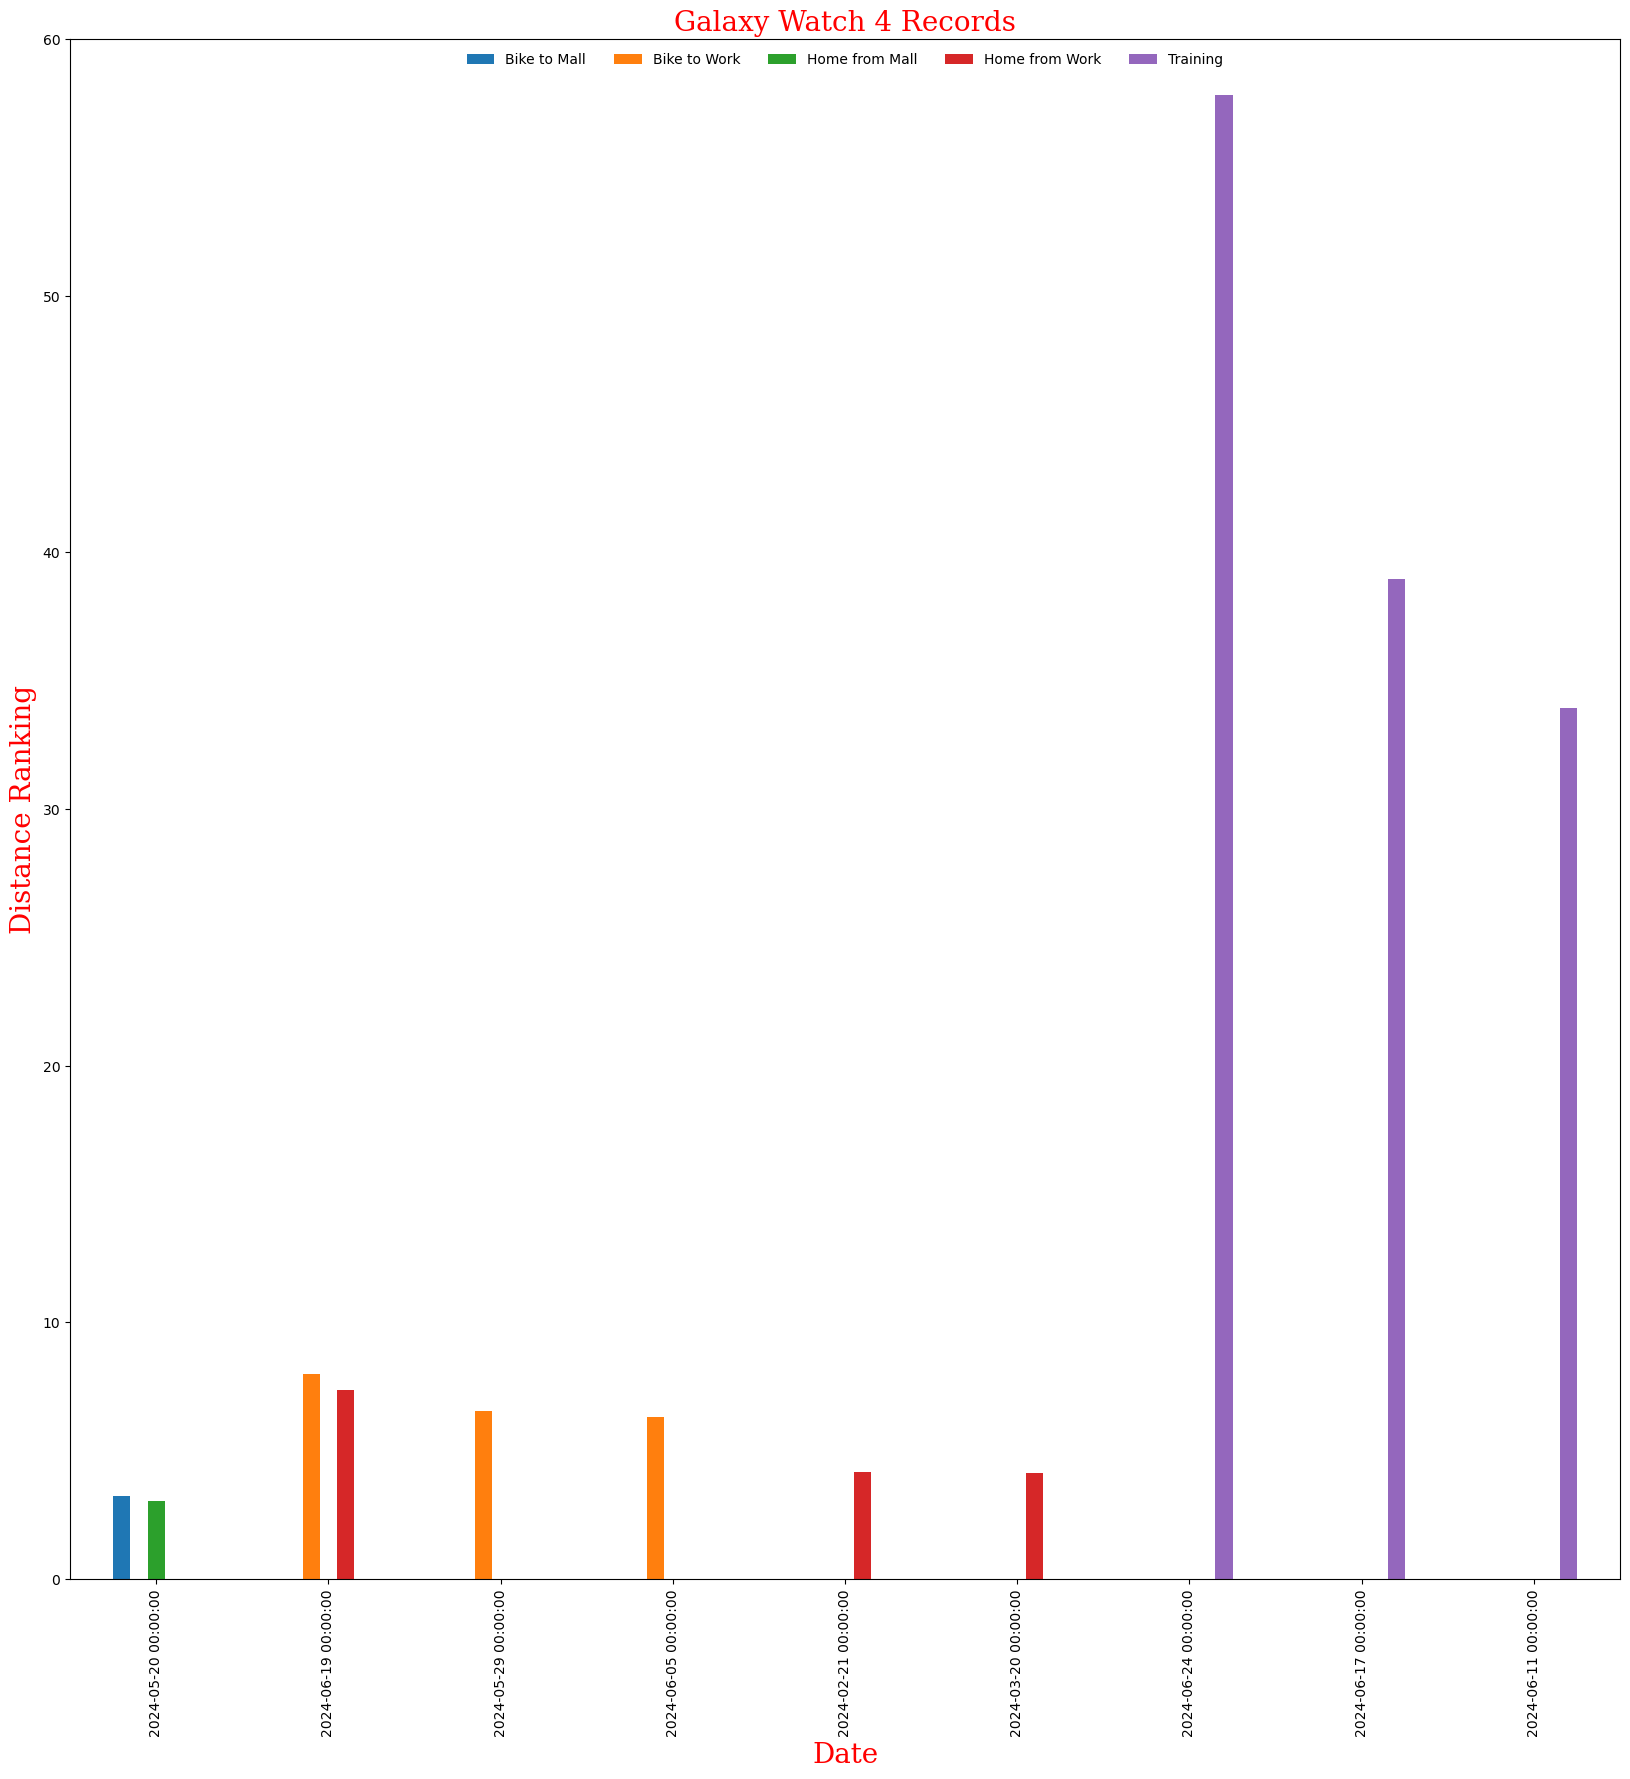

In [80]:
f1 = {'family': 'serif', 'size':20, 'color': 'red'}
dtr.plot(figsize=(20,20), kind="bar")
plt.legend(["Bike to Mall", "Bike to Work", "Home from Mall", "Home from Work", "Training"], borderpad=0.5, fontsize=10, loc="upper center", frameon=False, ncol=6)
plt.title('Galaxy Watch 4 Records', fontdict=f1)
plt.xlabel('Date', fontdict=f1)
plt.ylabel('Distance Ranking', fontdict=f1)
plt.ylim(0, 60)
plt.savefig("fig/dtr_gw4.png")
plt.show()

In [75]:
#Rankings Duration Total
dtbtm_r = dt_btmd
dtbtmr = dtbtm_r["Bike to Mall"].rank(ascending=True)
dtbtm_r['BTMR'] = dtbtmr
dtbtm_r = dtbtm_r.sort_values('BTMR').head(3)

dtbtw_r = dt_btwd
dtbtwr = dtbtw_r["Bike to Work"].rank(ascending=True)
dtbtw_r['BTWR'] = dtbtwr
dtbtw_r = dtbtw_r.sort_values('BTWR').head(3)

dthfm_r = dt_hfmd
dthfmr = dthfm_r["Home from Mall"].rank(ascending=True)
dthfm_r['HFMR'] = dthfmr
dthfm_r = dthfm_r.sort_values('HFMR').head(3)

dthfw_r = dt_hfwd
dthfwr = dthfw_r["Home from Work"].rank(ascending=True)
dthfw_r['HFWR'] = dthfwr
dthfw_r = dthfw_r.sort_values('HFWR').head(3)

dttra_r = dt_trad
dttrar = dttra_r["Training"].rank(ascending=True)
dttra_r['TRAR'] = dttrar
dttra_r = dttra_r.sort_values('TRAR').head(3)

dtlistr = [dtbtm_r, dtbtw_r, dthfm_r, dthfw_r, dttra_r]
dttr = pd.concat(dtlistr, axis=1).fillna('0').sort_values(['BTMR', 'BTWR', 'HFMR', 'HFWR', 'TRAR'], ascending=[True,True,True,True,True])
dttr.columns = pd.MultiIndex.from_product([["Duration Total"], ["Bike to Mall", "BTMR", "Bike to Work", "BTWR", "Home from Mall", "HFMR", "Home from Work", "HFWR", "Training", "TRAR"]])
dttr = dttr.iloc[:, [0, 2, 4, 6, 8]].astype(float)
dttr #duration total total rank

Duration Total                                                    
             Bike to Mall Bike to Work Home from Mall Home from Work Training
Date                                                                         
2024-05-20         1120.0          0.0          899.0            0.0  11013.0
2024-03-20            0.0       1350.0            0.0            0.0      0.0
2024-02-14            0.0       1420.0            0.0            0.0      0.0
2024-05-15            0.0       1661.0            0.0         1069.0      0.0
2024-05-22            0.0          0.0            0.0         1127.0      0.0
2024-05-08            0.0          0.0            0.0         1132.0      0.0
2024-06-03            0.0          0.0            0.0            0.0   8330.0
2024-05-27            0.0          0.0            0.0            0.0   9006.0

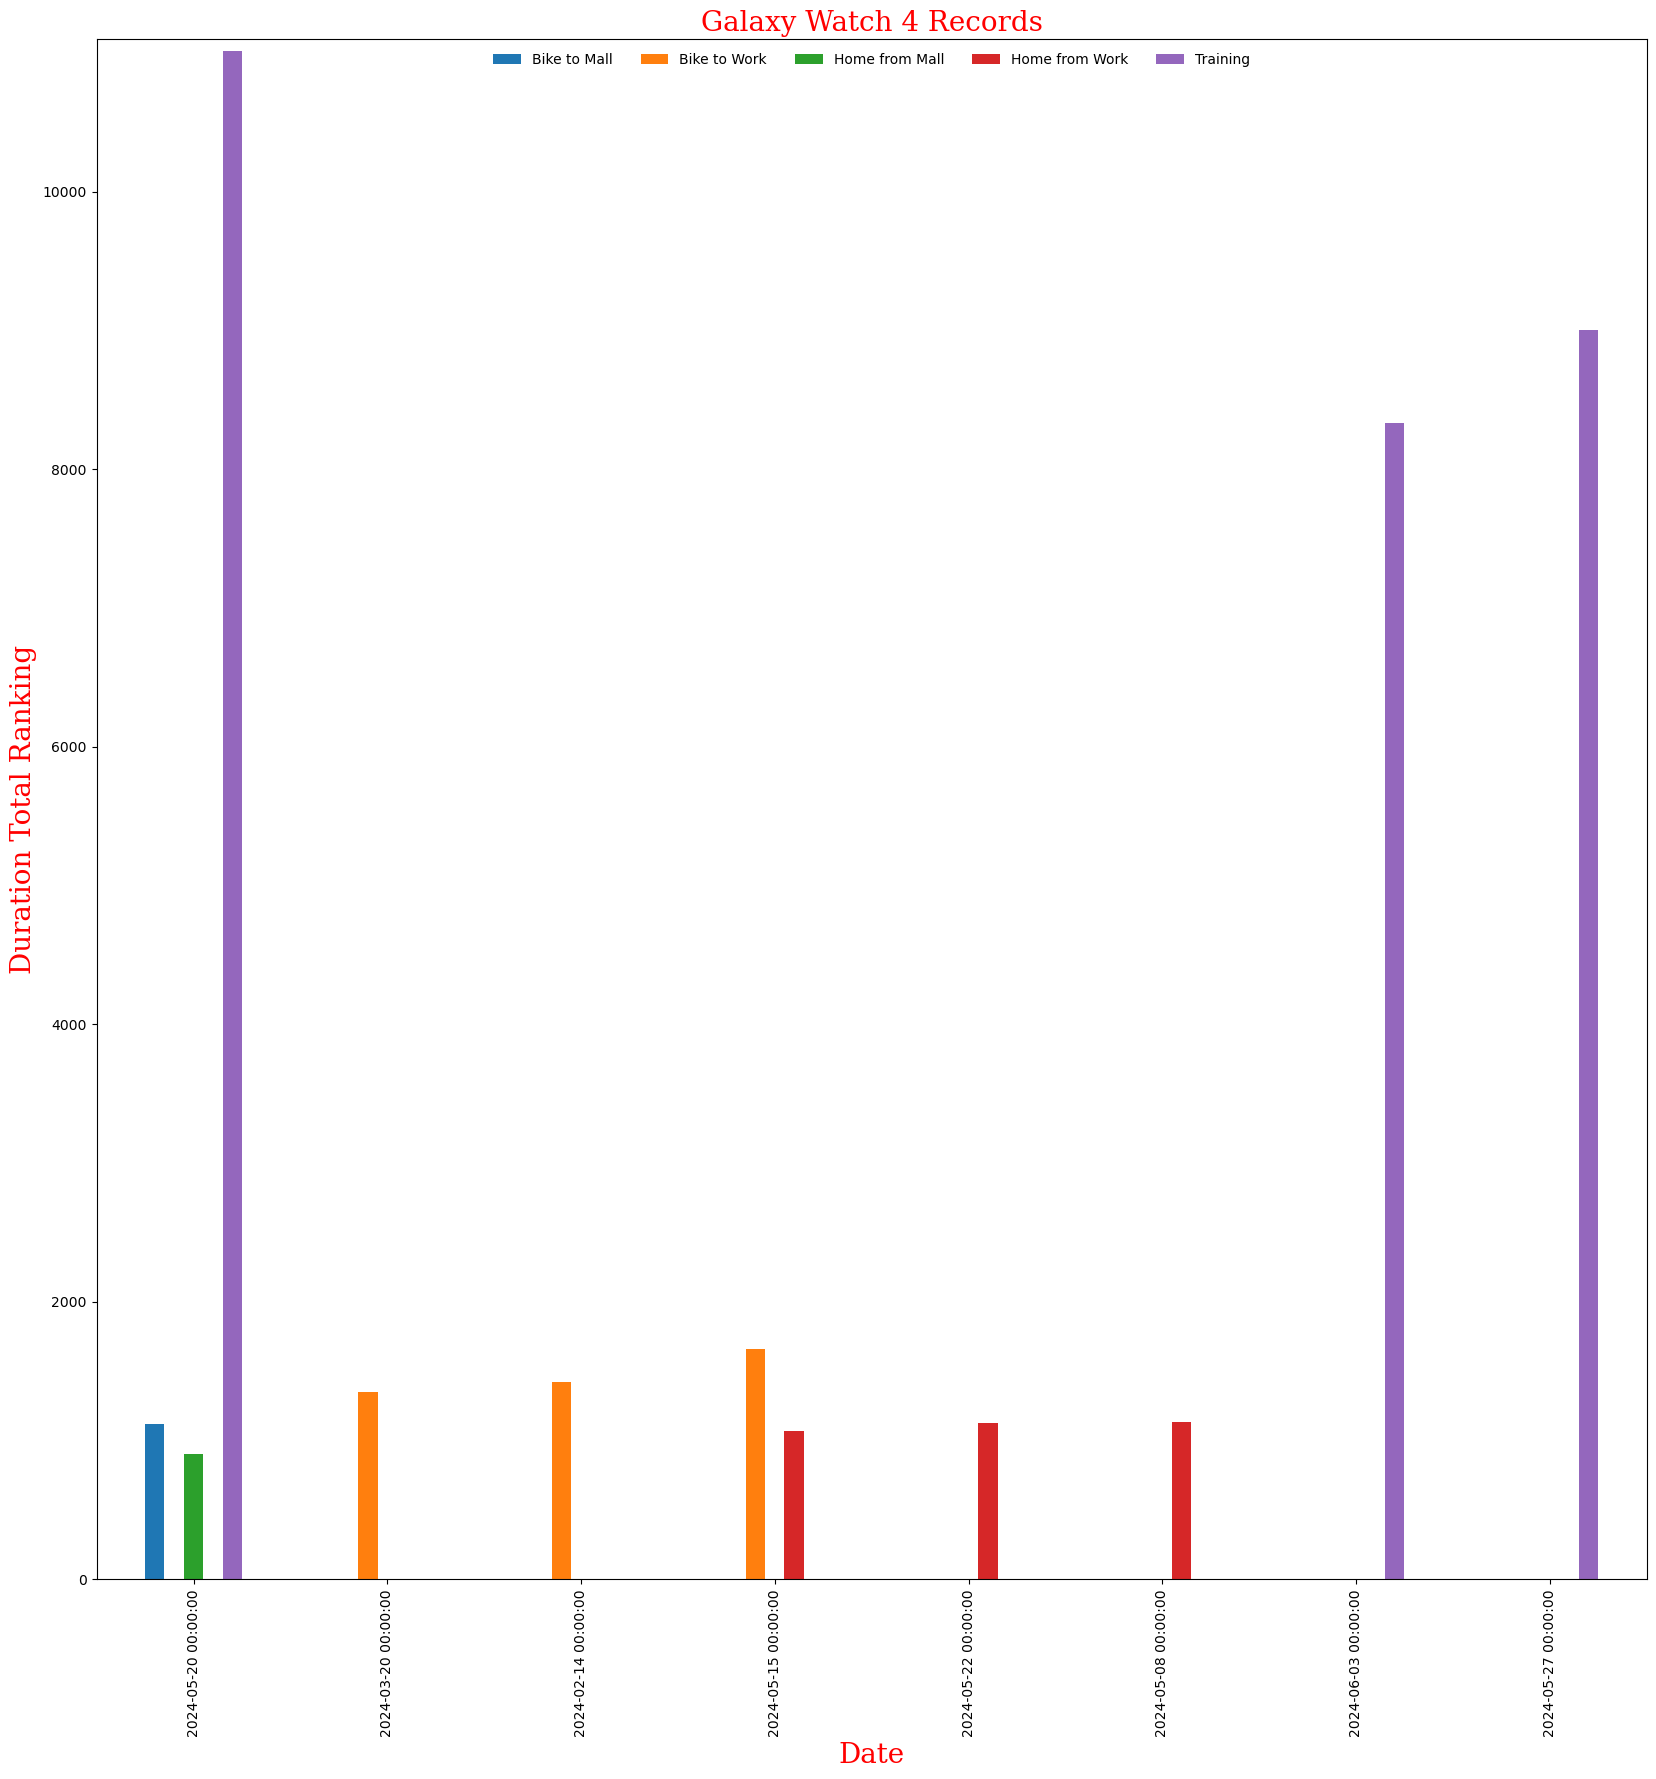

In [62]:
f1 = {'family': 'serif', 'size':20, 'color': 'red'}
dttr.plot(figsize=(20,20), kind="bar")
plt.legend(["Bike to Mall", "Bike to Work", "Home from Mall", "Home from Work", "Training"], borderpad=0.5, fontsize=10, loc="upper center", frameon=False, ncol=6)
plt.title('Galaxy Watch 4 Records', fontdict=f1)
plt.xlabel('Date', fontdict=f1)
plt.ylabel('Duration Total Ranking', fontdict=f1)
plt.ylim(0, 11100)
plt.savefig("fig/dttr_gw4.png")
plt.show()

In [41]:
#Rankings Elevation Gain
egbtm_r = eg_btmd
egbtmr = egbtm_r["Bike to Mall"].rank(ascending=False)
egbtm_r['BTMR'] = egbtmr
egbtm_r = egbtm_r.sort_values('BTMR').head(3)

egbtw_r = eg_btwd
egbtwr = egbtw_r["Bike to Work"].rank(ascending=False)
egbtw_r['BTWR'] = egbtwr
egbtw_r = egbtw_r.sort_values('BTWR').head(3)

eghfm_r = eg_hfmd
eghfmr = eghfm_r["Home from Mall"].rank(ascending=False)
eghfm_r['HFMR'] = eghfmr
eghfm_r = eghfm_r.sort_values('HFMR').head(3)

eghfw_r = eg_hfwd
eghfwr = eghfw_r["Home from Work"].rank(ascending=False)
eghfw_r['HFWR'] = eghfwr
eghfw_r = eghfw_r.sort_values('HFWR').head(3)

egtra_r = eg_trad
egtrar = egtra_r["Training"].rank(ascending=False)
egtra_r['TRAR'] = egtrar
egtra_r = egtra_r.sort_values('TRAR').head(3)

eglistr = [egbtm_r, egbtw_r, eghfm_r, eghfw_r, egtra_r]
egtr = pd.concat(eglistr, axis=1).fillna('0').sort_values(['BTMR', 'BTWR', 'HFMR', 'HFWR', 'TRAR'], ascending=[True,True,True,True,True])
egtr.columns = pd.MultiIndex.from_product([["Elevation Gain"], ["Bike to Mall", "BTMR", "Bike to Work", "BTWR", "Home from Mall", "HFMR", "Home from Work", "HFWR", "Training", "TRAR"]])
egtr = egtr.iloc[:, [0, 2, 4, 6, 8]].astype(float)
egtr #elevation gain total rank

Elevation Gain                                                    
             Bike to Mall Bike to Work Home from Mall Home from Work Training
Date                                                                         
2024-05-20           59.0          0.0            0.0            0.0      0.0
2024-06-19            0.0         45.0            0.0            0.0      0.0
2024-05-15            0.0         40.0            0.0            0.0      0.0
2024-05-22            0.0         35.0            0.0            0.0      0.0
2024-04-17            0.0          0.0            0.0           58.0      0.0
2024-02-07            0.0          0.0            0.0           37.0      0.0
2024-02-21            0.0          0.0            0.0           34.0      0.0
2024-06-24            0.0          0.0            0.0            0.0    180.0
2024-06-17            0.0          0.0            0.0            0.0    134.0
2024-06-03            0.0          0.0            0.0            0.0    111.0

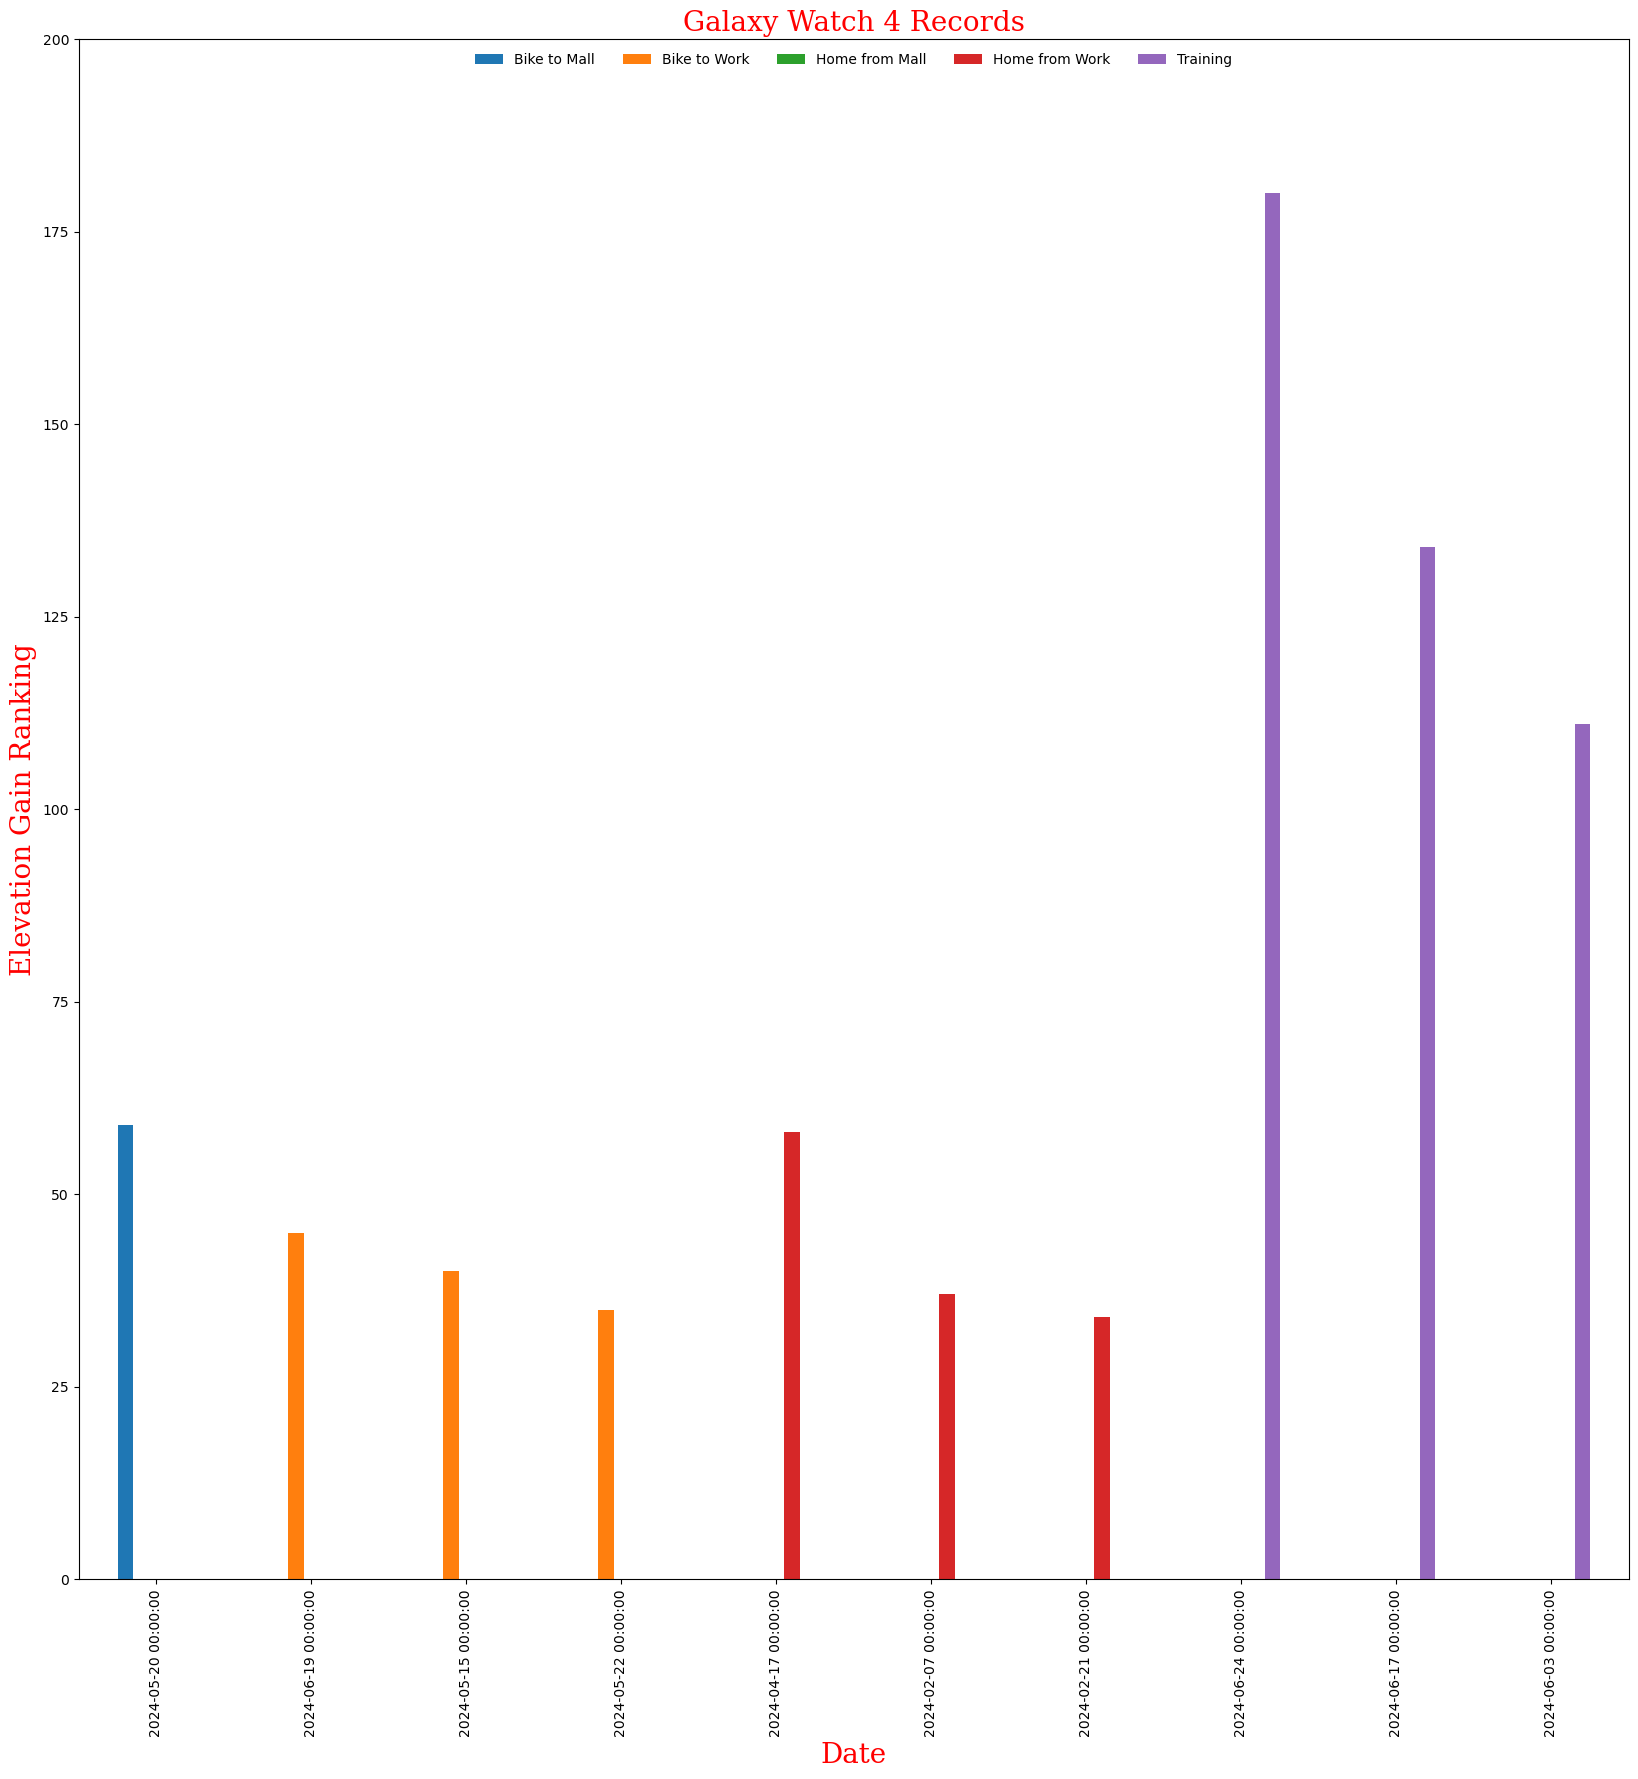

In [63]:
f1 = {'family': 'serif', 'size':20, 'color': 'red'}
egtr.plot(figsize=(20,20), kind="bar")
plt.legend(["Bike to Mall", "Bike to Work", "Home from Mall", "Home from Work", "Training"], borderpad=0.5, fontsize=10, loc="upper center", frameon=False, ncol=6)
plt.title('Galaxy Watch 4 Records', fontdict=f1)
plt.xlabel('Date', fontdict=f1)
plt.ylabel('Elevation Gain Ranking', fontdict=f1)
plt.ylim(0, 200)
plt.savefig("fig/egtr_gw4.png")
plt.show()

In [69]:
#Rankings Total Ascent Gradient
tagbtm_r = tag_btmd
tagbtmr = tagbtm_r["Bike to Mall"].rank(ascending=False)
tagbtm_r['BTMR'] = tagbtmr
tagbtm_r = tagbtm_r.sort_values('BTMR').head(3)

tagbtw_r = tag_btwd
tagbtwr = tagbtw_r["Bike to Work"].rank(ascending=False)
tagbtw_r['BTWR'] = tagbtwr
tagbtw_r = tagbtw_r.sort_values('BTWR').head(3)

taghfm_r = tag_hfmd
taghfmr = taghfm_r["Home from Mall"].rank(ascending=False)
taghfm_r['HFMR'] = taghfmr
taghfm_r = taghfm_r.sort_values('HFMR').head(3)

taghfw_r = tag_hfwd
taghfwr = taghfw_r["Home from Work"].rank(ascending=False)
taghfw_r['HFWR'] = taghfwr
taghfw_r = taghfw_r.sort_values('HFWR').head(3)

tagtra_r = tag_trad
tagtrar = tagtra_r["Training"].rank(ascending=False)
tagtra_r['TRAR'] = tagtrar
tagtra_r = tagtra_r.sort_values('TRAR').head(3)

taglistr = [tagbtm_r, tagbtw_r, taghfm_r, taghfw_r, tagtra_r]
tagtr = pd.concat(taglistr, axis=1).fillna('0').sort_values(['BTMR', 'BTWR', 'HFMR', 'HFWR', 'TRAR'], ascending=[True,True,True,True,True])
tagtr.columns = pd.MultiIndex.from_product([["Total Ascent Gradient"], ["Bike to Mall", "BTMR", "Bike to Work", "BTWR", "Home from Mall", "HFMR", "Home from Work", "HFWR", "Training", "TRAR"]])
tagtr = tagtr.iloc[:, [0, 2, 4, 6, 8]].astype(float)
tagtr #total ascent gradient total rank

Total Ascent Gradient                                             \
                    Bike to Mall Bike to Work Home from Mall Home from Work   
Date                                                                          
2024-05-20                  0.27         0.00            0.0           0.00   
2024-06-19                  0.00         0.37            0.0           0.04   
2024-02-14                  0.00         0.36            0.0           0.00   
2024-02-21                  0.00         0.36            0.0           0.00   
2024-03-20                  0.00         0.00            0.0           0.05   
2024-02-07                  0.00         0.00            0.0           0.01   
2024-06-17                  0.00         0.00            0.0           0.00   
2024-06-24                  0.00         0.00            0.0           0.00   
2024-06-11                  0.00         0.00            0.0           0.00   

                     
           Training  
Date                 
2024-05-20     0.00  
2024-06-19     0.00  
2024-02-14     0.00  
2024-02-21     0.00  
2024-03-20     0.00  
2024-02-07     0.00  
2024-06-17     0.95  
2024-06-24     0.82  
2024-06-11     0.76

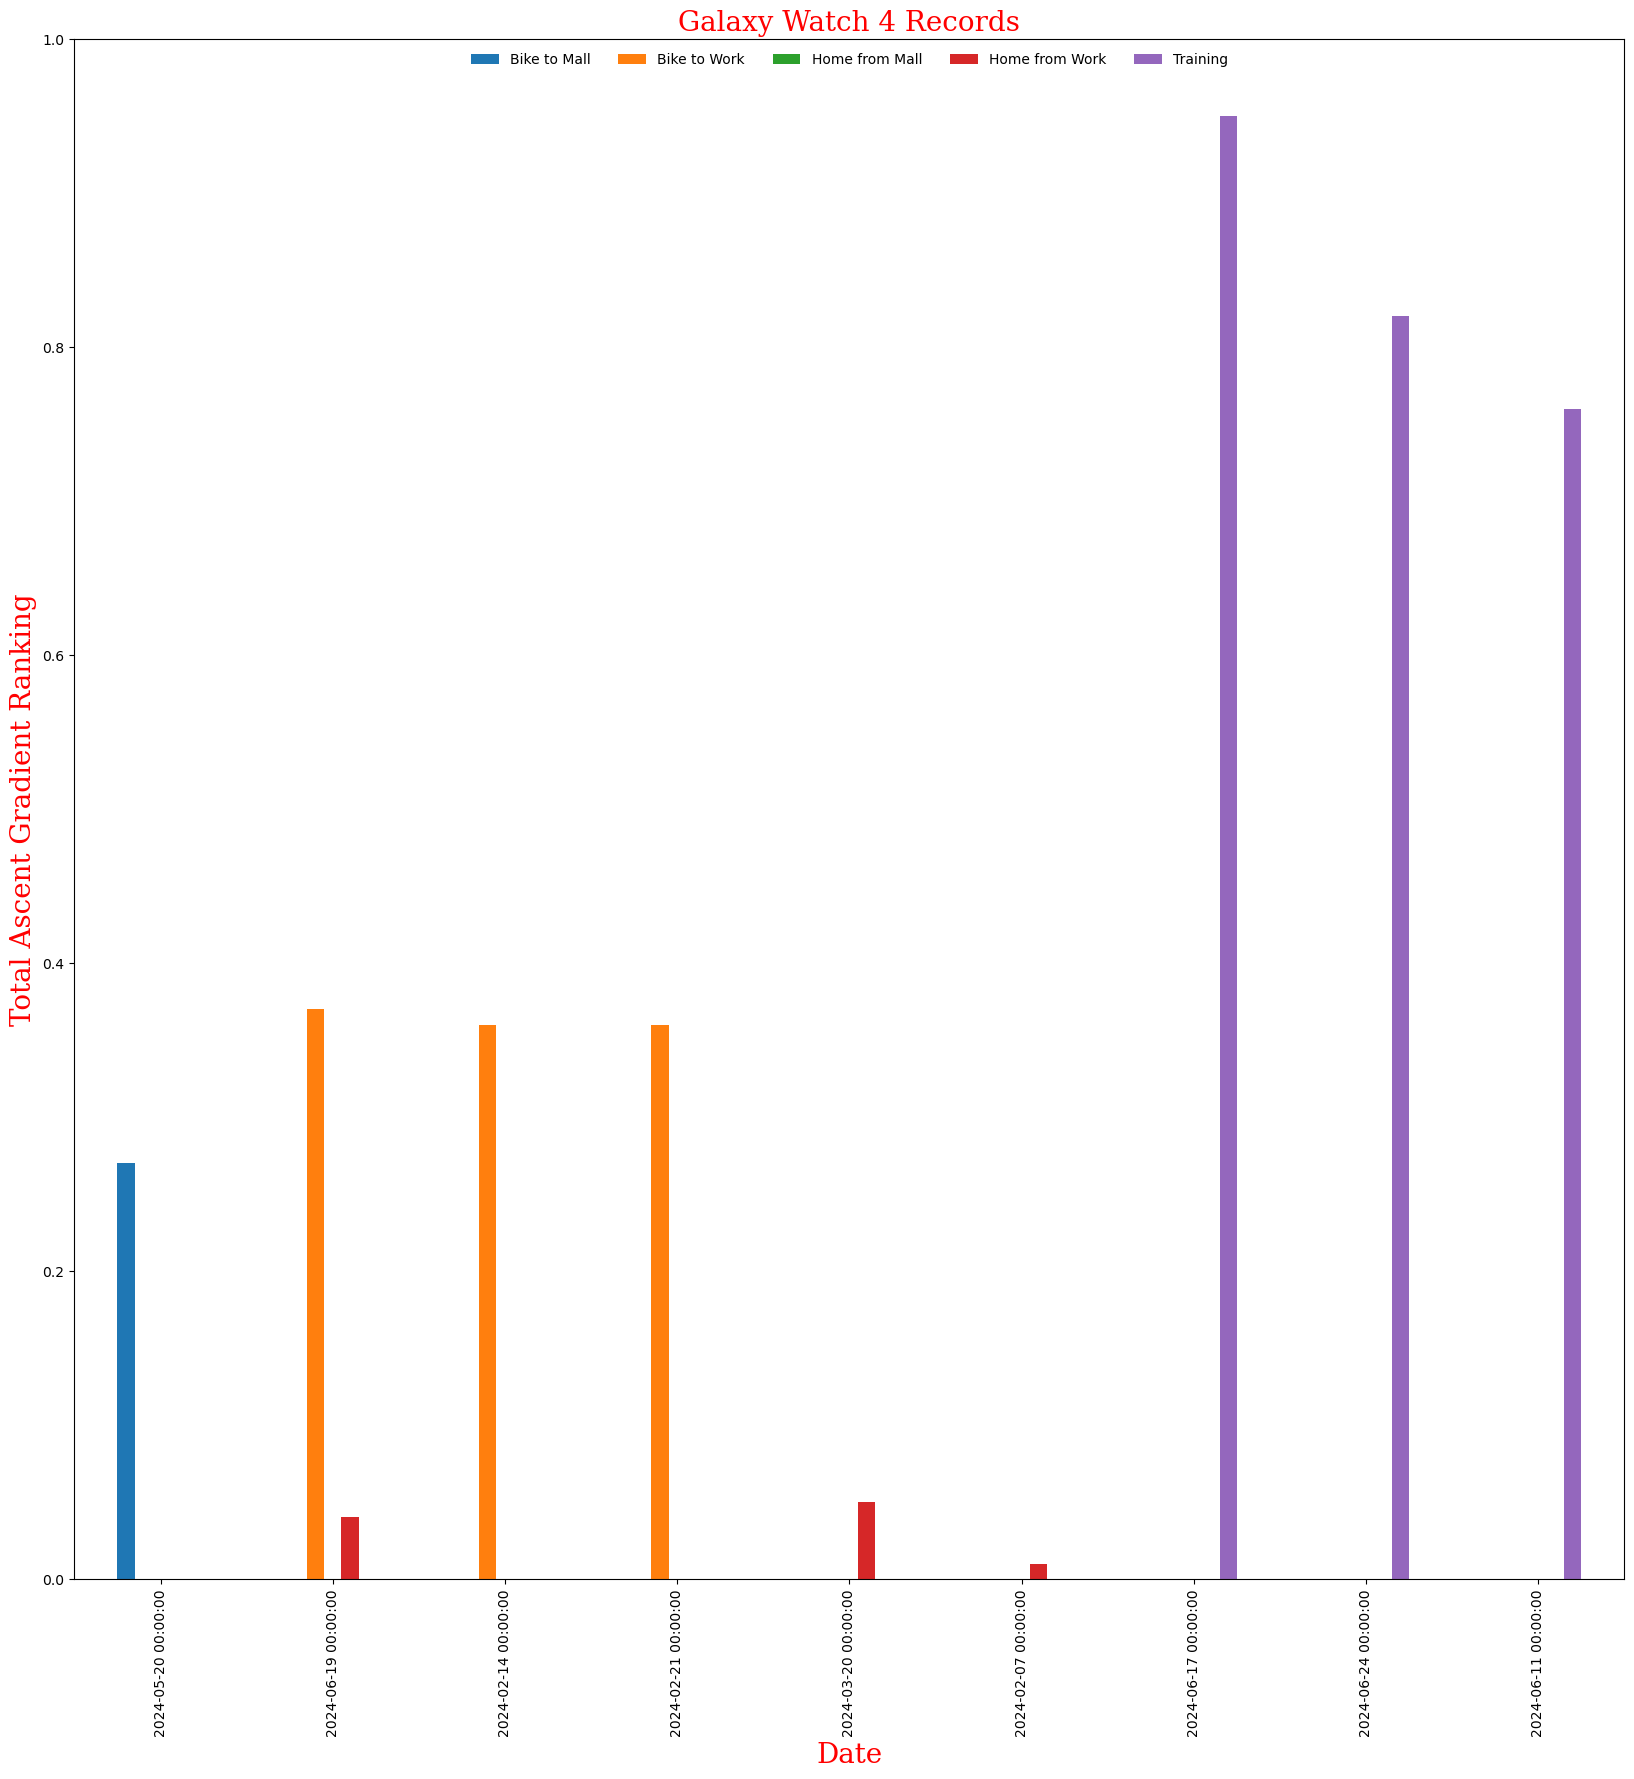

In [64]:
f1 = {'family': 'serif', 'size':20, 'color': 'red'}
tagtr.plot(figsize=(20,20), kind="bar")
plt.legend(["Bike to Mall", "Bike to Work", "Home from Mall", "Home from Work", "Training"], borderpad=0.5, fontsize=10, loc="upper center", frameon=False, ncol=6)
plt.title('Galaxy Watch 4 Records', fontdict=f1)
plt.xlabel('Date', fontdict=f1)
plt.ylabel('Total Ascent Gradient Ranking', fontdict=f1)
plt.ylim(0, 1)
plt.savefig("fig/tagtr_gw4.png")
plt.show()

In [71]:
#Rankings Total Descent Gradient
tdgbtm_r = tdg_btmd
tdgbtmr = tdgbtm_r["Bike to Mall"].rank(ascending=False)
tdgbtm_r['BTMR'] = tdgbtmr
tdgbtm_r = tdgbtm_r.sort_values('BTMR').head(3)

tdgbtw_r = tdg_btwd
tdgbtwr = tdgbtw_r["Bike to Work"].rank(ascending=False)
tdgbtw_r['BTWR'] = tdgbtwr
tdgbtw_r = tdgbtw_r.sort_values('BTWR').head(3)

tdghfm_r = tdg_hfmd
tdghfmr = tdghfm_r["Home from Mall"].rank(ascending=False)
tdghfm_r['HFMR'] = tdghfmr
tdghfm_r = tdghfm_r.sort_values('HFMR').head(3)

tdghfw_r = tdg_hfwd
tdghfwr = tdghfw_r["Home from Work"].rank(ascending=False)
tdghfw_r['HFWR'] = tdghfwr
tdghfw_r = tdghfw_r.sort_values('HFWR').head(3)

tdgtra_r = tdg_trad
tdgtrar = tdgtra_r["Training"].rank(ascending=False)
tdgtra_r['TRAR'] = tdgtrar
tdgtra_r = tdgtra_r.sort_values('TRAR').head(3)

tdglistr = [tdgbtm_r, tdgbtw_r, tdghfm_r, tdghfw_r, tdgtra_r]
tdgtr = pd.concat(tdglistr, axis=1).fillna('0').sort_values(['BTMR', 'BTWR', 'HFMR', 'HFWR', 'TRAR'], ascending=[True,True,True,True,True])
tdgtr.columns = pd.MultiIndex.from_product([["Total Descent Gradient"], ["Bike to Mall", "BTMR", "Bike to Work", "BTWR", "Home from Mall", "HFMR", "Home from Work", "HFWR", "Training", "TRAR"]])
tdgtr = tdgtr.iloc[:, [0, 2, 4, 6, 8]].astype(float)
tdgtr #total descent gradient total rank

Total Descent Gradient                                             \
                     Bike to Mall Bike to Work Home from Mall Home from Work   
Date                                                                           
2024-05-20                    0.0         0.00            0.3           0.00   
2024-06-19                    0.0         0.20            0.0           0.30   
2024-05-29                    0.0         0.12            0.0           0.00   
2024-05-15                    0.0         0.10            0.0           0.00   
2024-02-07                    0.0         0.00            0.0           0.31   
2024-05-22                    0.0         0.00            0.0           0.31   
2024-06-24                    0.0         0.00            0.0           0.00   
2024-06-03                    0.0         0.00            0.0           0.00   
2024-05-27                    0.0         0.00            0.0           0.00   

                     
           Training  
Date                 
2024-05-20     0.00  
2024-06-19     0.00  
2024-05-29     0.00  
2024-05-15     0.00  
2024-02-07     0.00  
2024-05-22     0.00  
2024-06-24     1.18  
2024-06-03     1.09  
2024-05-27     0.94

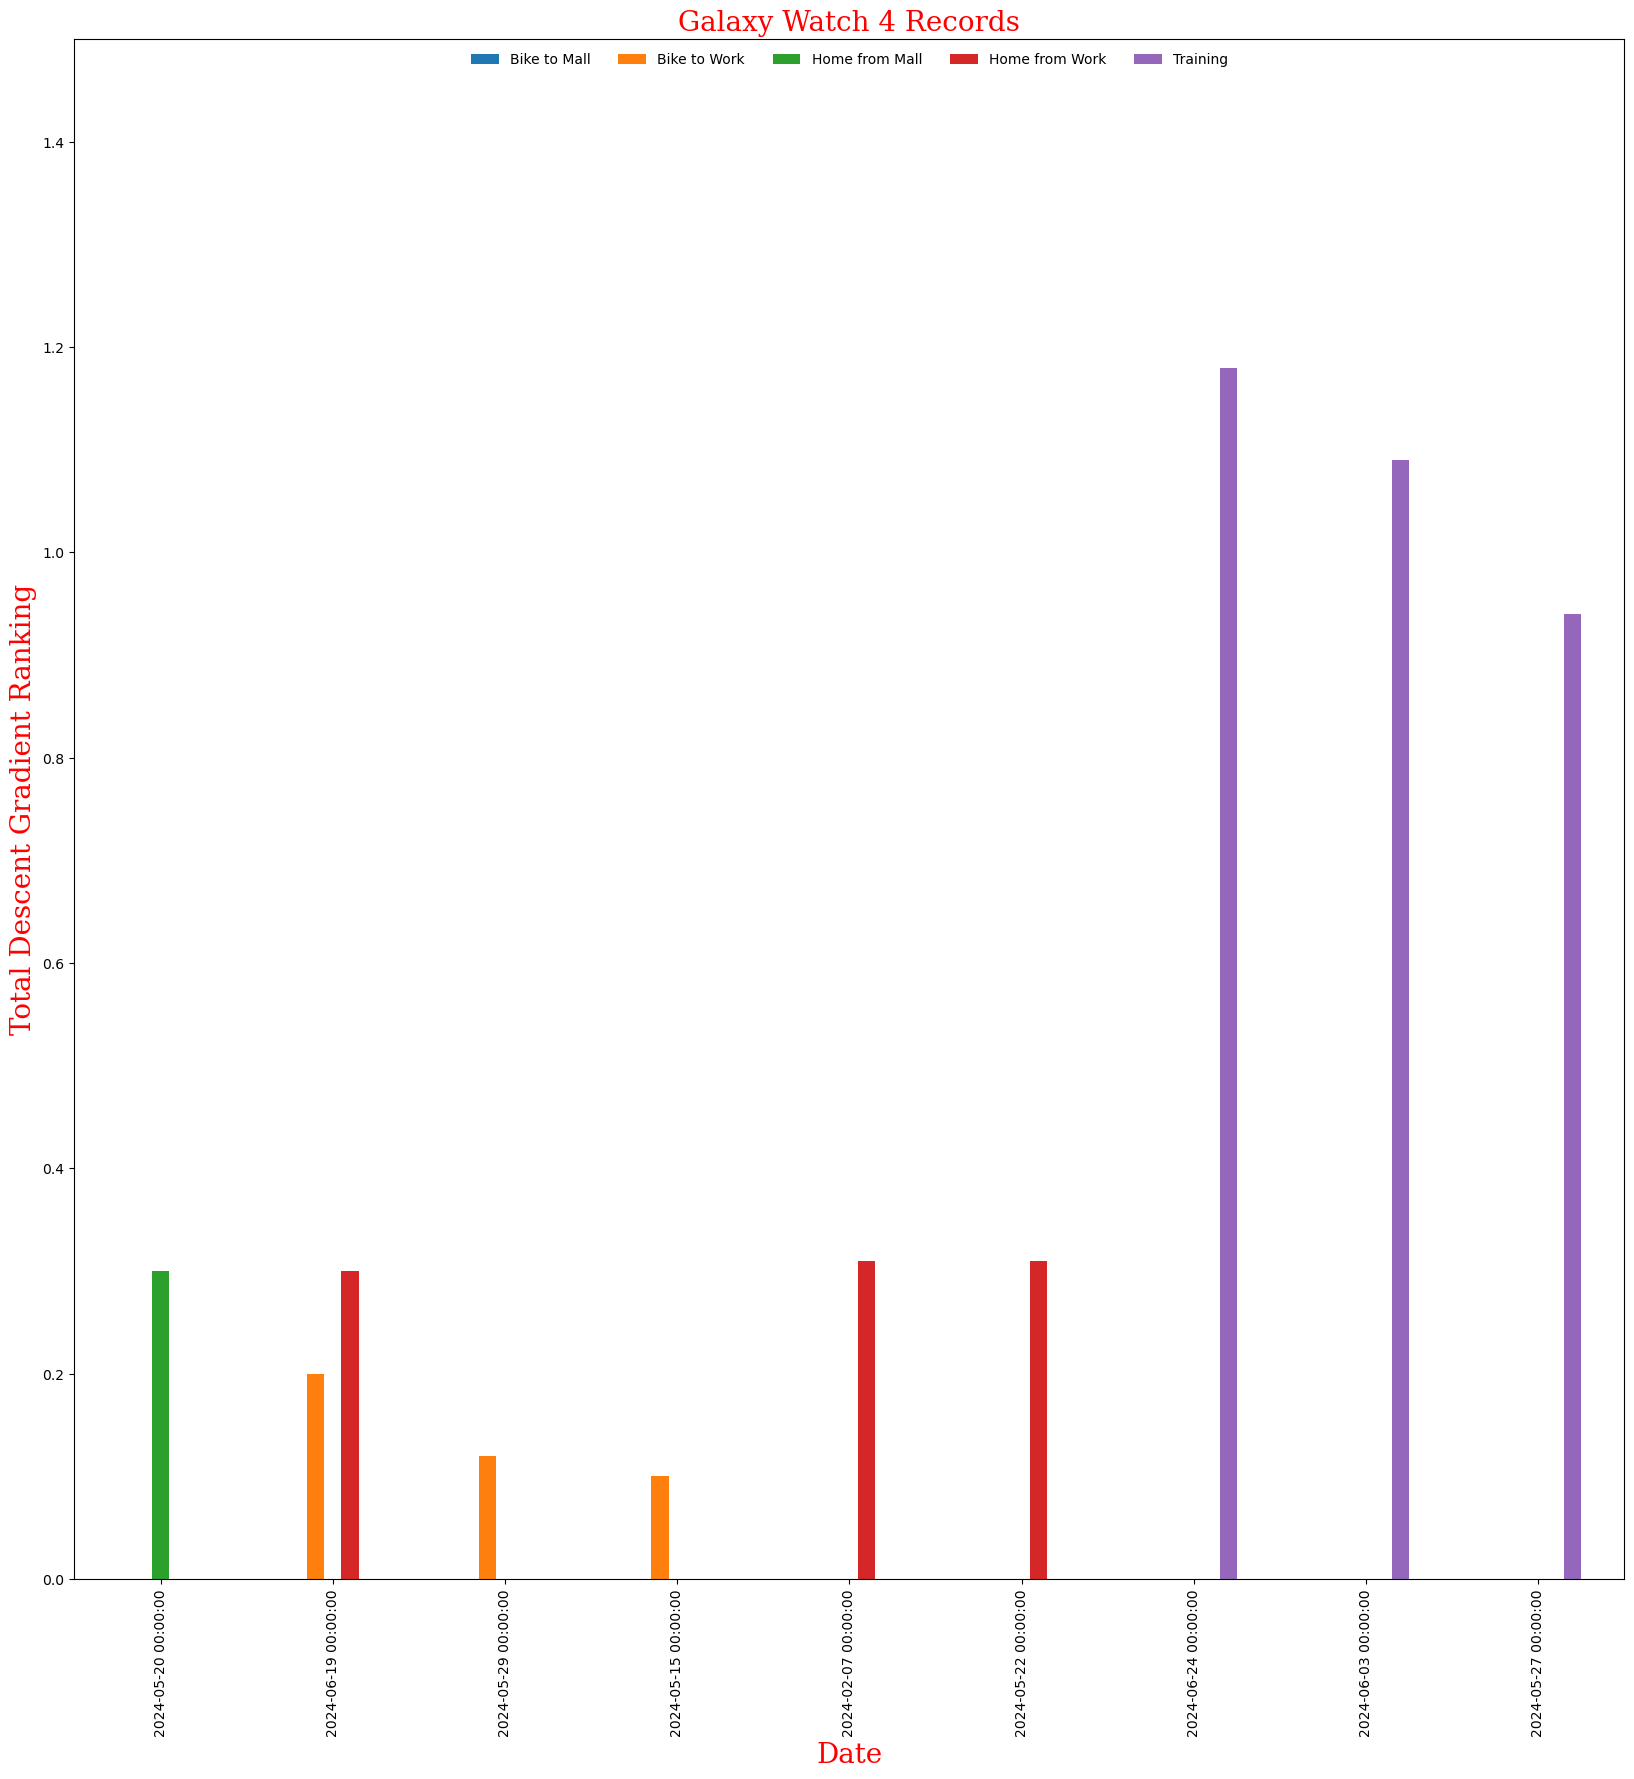

In [65]:
f1 = {'family': 'serif', 'size':20, 'color': 'red'}
tdgtr.plot(figsize=(20,20), kind="bar")
plt.legend(["Bike to Mall", "Bike to Work", "Home from Mall", "Home from Work", "Training"], borderpad=0.5, fontsize=10, loc="upper center", frameon=False, ncol=6)
plt.title('Galaxy Watch 4 Records', fontdict=f1)
plt.xlabel('Date', fontdict=f1)
plt.ylabel('Total Descent Gradient Ranking', fontdict=f1)
plt.ylim(0, 1.5)
plt.savefig("fig/tdgtr_gw4.png")
plt.show()

In [47]:
#Rankings Weather
wbtm_r = w_btmd
wbtmr = wbtm_r["Bike to Mall"].rank(ascending=False)
wbtm_r['BTMR'] = wbtmr
wbtm_r = wbtm_r.sort_values('BTMR').head(3)

wbtw_r = w_btwd
wbtwr = wbtw_r["Bike to Work"].rank(ascending=False)
wbtw_r['BTWR'] = wbtwr
wbtw_r = wbtw_r.sort_values('BTWR').head(3)

whfm_r = w_hfmd
whfmr = whfm_r["Home from Mall"].rank(ascending=False)
whfm_r['HFMR'] = whfmr
whfm_r = whfm_r.sort_values('HFMR').head(3)

whfw_r = w_hfwd
whfwr = whfw_r["Home from Work"].rank(ascending=False)
whfw_r['HFWR'] = whfwr
whfw_r = whfw_r.sort_values('HFWR').head(3)

wtra_r = w_trad
wtrar = wtra_r["Training"].rank(ascending=False)
wtra_r['TRAR'] = wtrar
wtra_r = wtra_r.sort_values('TRAR').head(3)

wlistr = [wbtm_r, wbtw_r, whfm_r, whfw_r, wtra_r]
wtr = pd.concat(wlistr, axis=1).fillna('0').sort_values(['BTMR', 'BTWR', 'HFMR', 'HFWR', 'TRAR'], ascending=[True,True,True,True,True])
wtr.columns = pd.MultiIndex.from_product([["Weather"], ["Bike to Mall", "BTMR", "Bike to Work", "BTWR", "Home from Mall", "HFMR", "Home from Work", "HFWR", "Training", "TRAR"]])
wtr = wtr.iloc[:, [0, 2, 4, 6, 8]].astype(float)
wtr #weather total rank

Weather                                                    
           Bike to Mall Bike to Work Home from Mall Home from Work Training
Date                                                                       
2024-05-20         36.0          0.0           32.0            0.0      0.0
2024-05-15          0.0         34.0            0.0            0.0      0.0
2024-05-08          0.0         33.0            0.0           33.0      0.0
2024-05-22          0.0         33.0            0.0            0.0      0.0
2024-04-17          0.0          0.0            0.0           33.0      0.0
2024-03-20          0.0          0.0            0.0           31.0      0.0
2024-05-27          0.0          0.0            0.0            0.0     32.0
2024-06-03          0.0          0.0            0.0            0.0     29.0
2024-06-11          0.0          0.0            0.0            0.0     28.0

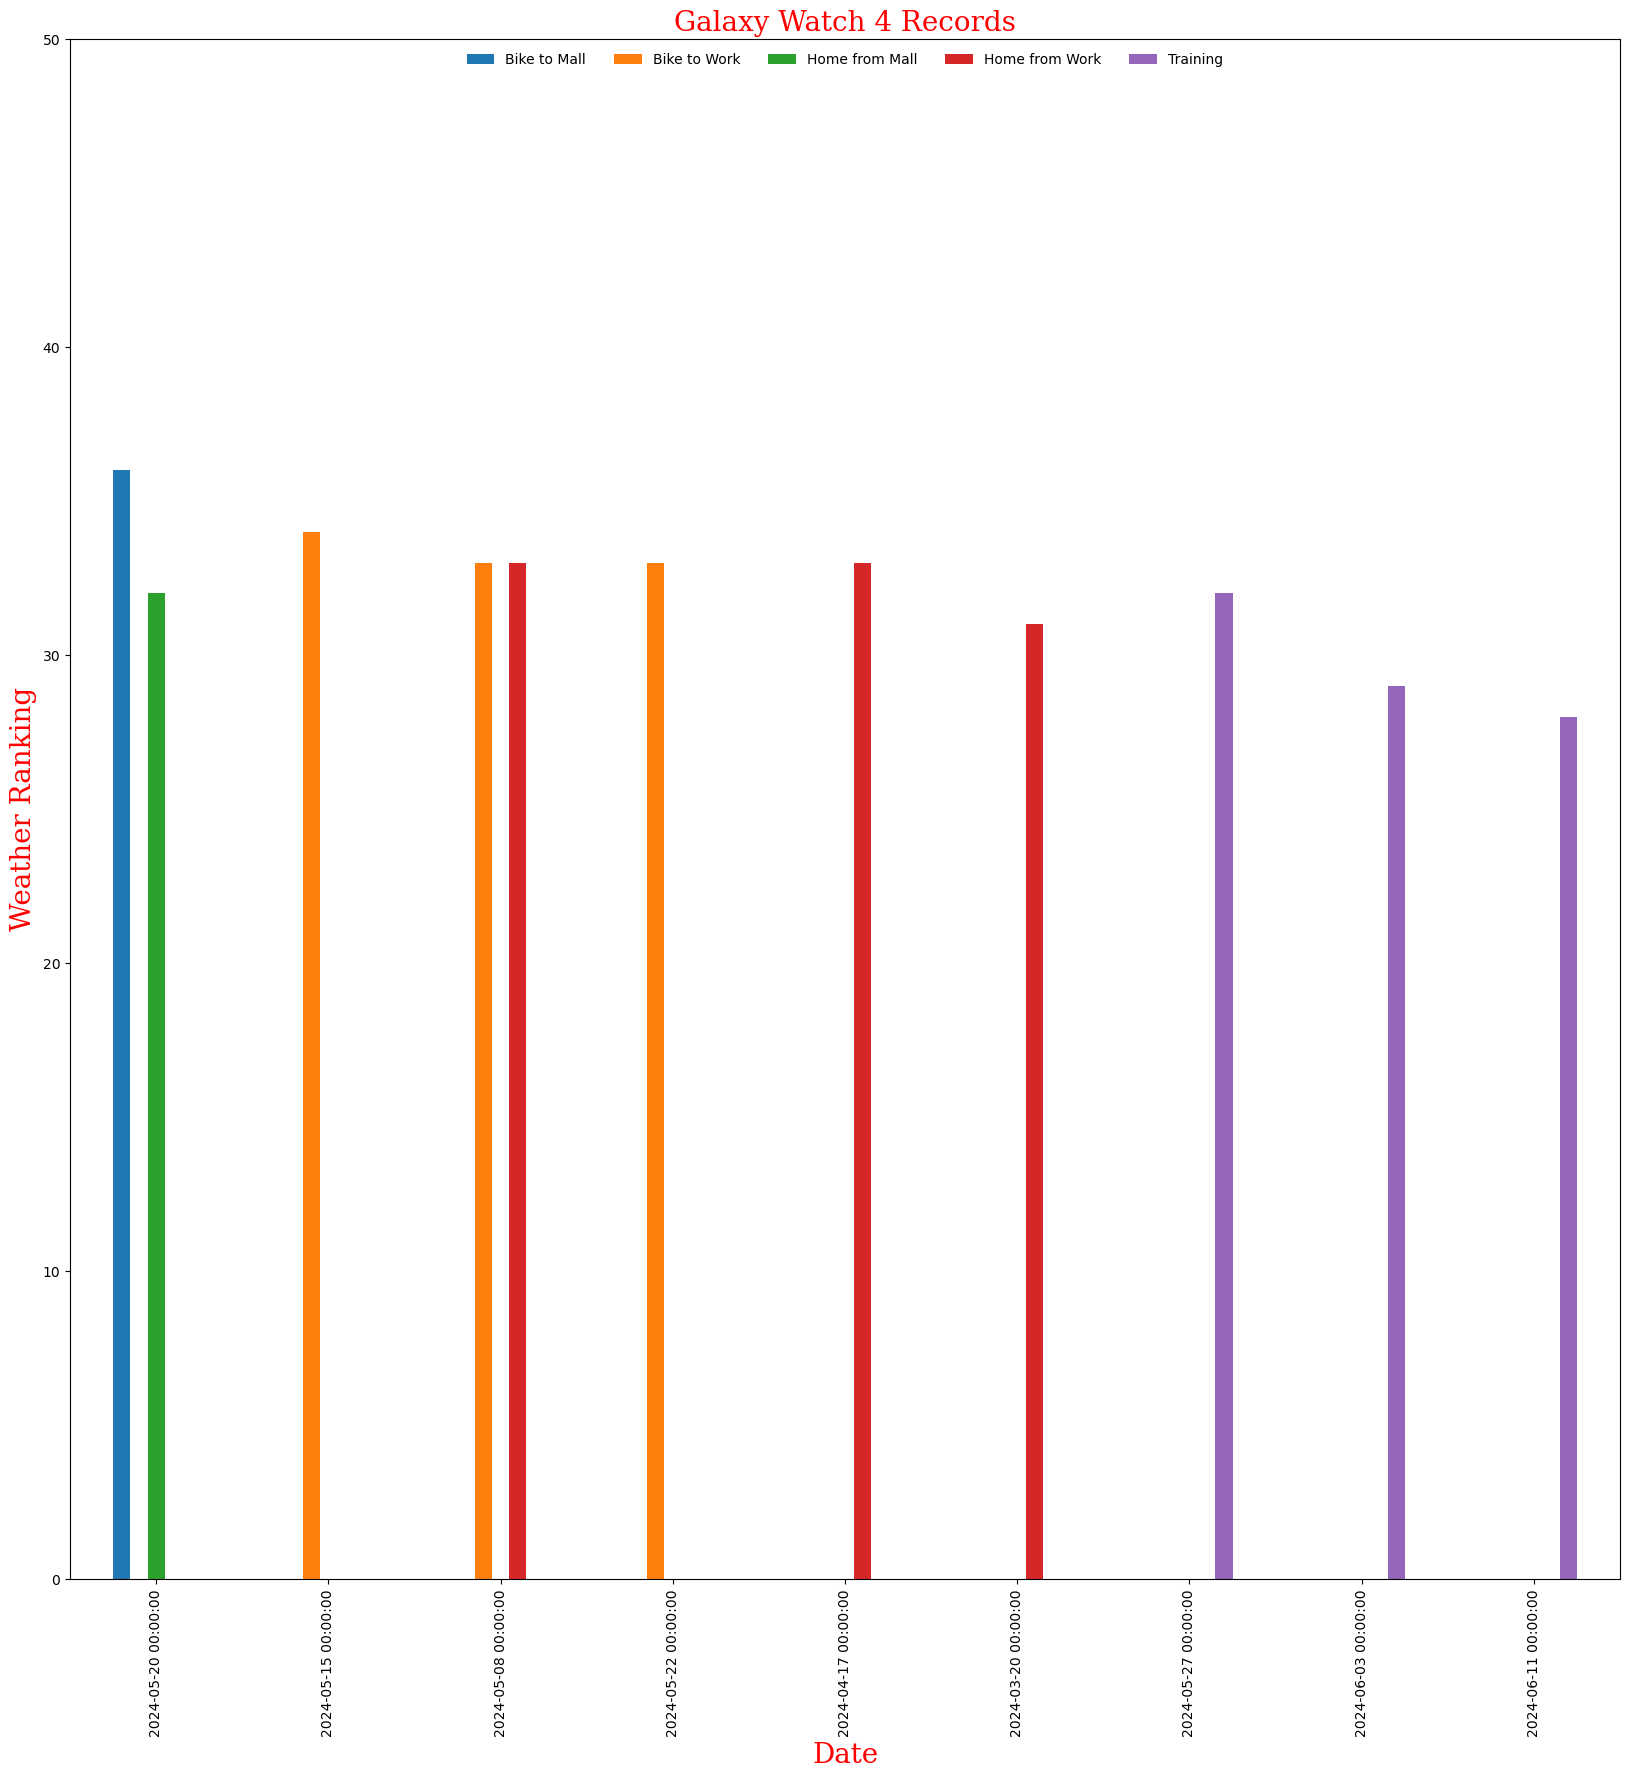

In [66]:
f1 = {'family': 'serif', 'size':20, 'color': 'red'}
wtr.plot(figsize=(20,20), kind="bar")
plt.legend(["Bike to Mall", "Bike to Work", "Home from Mall", "Home from Work", "Training"], borderpad=0.5, fontsize=10, loc="upper center", frameon=False, ncol=6)
plt.title('Galaxy Watch 4 Records', fontdict=f1)
plt.xlabel('Date', fontdict=f1)
plt.ylabel('Weather Ranking', fontdict=f1)
plt.ylim(0, 50)
plt.savefig("fig/wtr_gw4.png")
plt.show()

In [79]:
# Creating an HTML file 
Func = open("index.html","w") 
   
# Adding input data to the HTML file 
Func.write("<html>\n    <head>\n     <title>\n  Galaxy Watch 4 Records</title>\n     </head>\n    <table border='3' align='center' class='dataframe' style='text-align:left; width:1000px;'>\n       <h2 style='text-align:center;'>\n  Galaxy Watch 4 Report Summary</h2>\n     <thead>\n         <th colspan='18' style='text-align: center; padding:18px; font-size: 18px; background-color:#FFFF00'>General Information</th>\n        </thead>\n     <table border='3' align='center'class='dataframe' style='text-align:left; width:1000px;'>\n    <thead>\n      <tr style='text-align: center;'>\n        <th colspan='3'>Total Records</th>\n        <th colspan='3'>Files Loaded</th>\n        <th colspan='3'>Category</th>\n        <th colspan='3'>Unit</th>\n        <th colspan='3'>Purpose</th>\n        <th colspan='3'>Count</th>\n      </tr>\n    </thead>\n    <tbody>\n      <tr>\n        <th colspan='3' rowspan='10' style='text-align: center; font-size: 100px; color:#ffff00; background-color: #454541'>30</th>\n        <th colspan='3' rowspan='10' style='text-align: center; font-size: 100px; color:#ffff00; background-color: #454541'>18</th>\n        <th colspan='3'>Average Heart Rate [AHR]</th>\n        <td colspan='3'>bpm</td>\n        <th colspan='3' rowspan='2'>Bike to Mall [BtM]</th>\n        <td colspan='3' rowspan='2'>1</td>\n      </tr>\n      <tr>\n        <th colspan='3'>Average Pace [AP]</th>\n        <td colspan='3'>spk</td>\n      </tr>\n      <tr>\n        <th colspan='3'>Average Speed [AS]</th>\n        <td colspan='3'>kph</td>\n        <th colspan='3' rowspan='2'>Bike to Work [BtW]</th>\n        <td colspan='3' rowspan='2'>11</td>\n      </tr>\n      <tr>\n        <th colspan='3'>Calories Total [CT]</th>\n        <td colspan='3'>kcal</td>\n      </tr>\n      <tr>\n        <th colspan='3'>Distance [Di]</th>\n        <td colspan='3'>km</td>\n        <th colspan='3' rowspan='2'>Home from Mall [HfM]</th>\n        <td colspan='3' rowspan='2'>1</td>\n      </tr>\n      <tr>\n        <th colspan='3'>Duration Total [DT]</th>\n        <td colspan='3'>sec</td>\n      </tr>\n      <tr>\n        <th colspan='3'>Elevation Gain [EG]</th>\n        <td colspan='3'>m</td>\n        <th colspan='3' rowspan='2'>Home from Work [HfW]</th>\n        <td colspan='3' rowspan='2'>11</td>\n      </tr>\n      <tr>\n        <th colspan='3'>Total Ascent Gradient [TAG]</th>\n        <td colspan='3'>km</td>\n      </tr>\n      <tr>\n        <th colspan='3'>Total Descent Gradient [TDG]</th>\n        <td colspan='3'>km</td>\n        <th colspan='3' rowspan='2'>Training [Tr]</th>\n        <td colspan='3' rowspan='2'>6</td>\n      </tr>\n      <tr>\n        <th colspan='3'>Weather [We]</th>\n        <td colspan='3'>Celsius</td>\n      </tr>\n    </tbody>\n</table>\n     <table border='3' align='center' class='dataframe' style='text-align:left; width:1000px;'>\n     <thead>\n       <th colspan='18' style='text-align: center; padding:18px; font-size: 18px; background-color:#FFFF00'>Statistics</th>\n      </thead>\n    <table border='3' align='center'class='dataframe' style='text-align:left; width:1000px;'>\n    <thead>\n          <tr style='text-align: center;'>\n            <th rowspan='2'>Category</th>\n             <th colspan='5' style='text-align:center'>Min</th>\n              <th colspan='5' style='text-align:center'>Max</th>\n             <th rowspan='2'>Category</th>\n             <th rowspan='2'>Sum</th>\n          </tr>\n      <tr>\n                 <th>BtM</th>\n              <th>BtW</th>\n              <th>HfM</th>\n              <th>HfW</th>\n              <th>Tr</th>\n              <th>BtM</th>\n              <th>BtW</th>\n              <th>HfM</th>\n              <th>HfW</th>\n                 <th>Tr</th>\n          </tr>\n       </thead>\n      <tbody>\n          <tr>\n              <th>AHR</th>\n              <td style='font-size: 18px; color:#d12d2d'>0.0</td>\n              <td style='font-size: 18px; color:#d12d2d'>111.00</td>\n              <td style='font-size: 18px; color:#d12d2d'>0.00</td>\n              <td style='font-size: 18px; color:#d12d2d'>140.00</td>\n              <td style='font-size: 18px; color:#d12d2d'>131.00</td>\n              <td style='font-size: 18px; color:#68d12d'>0.00</td>\n              <td style='font-size: 18px; color:#68d12d'>168.00</td>\n              <td style='font-size: 18px; color:#68d12d'>0.00</td>\n              <td style='font-size: 18px; color:#68d12d'>151.00</td>\n              <td style='font-size: 18px; color:#68d12d'>165.00</td>\n                 <th rowspan='2'>CT</th>\n           <td rowspan='2' style='font-size: 18px; color:#357dc6'>13676.00</td>\n          </tr>\n          <tr>\n              <th>AP</th>\n              <td style='font-size: 18px; color:#d12d2d'>272.00</td>\n              <td style='font-size: 18px; color:#d12d2d'>207.00</td>\n              <td style='font-size: 18px; color:#d12d2d'>209.00</td>\n              <td style='font-size: 18px; color:#d12d2d'>1195.00</td>\n              <td style='font-size: 18px; color:#d12d2d'>200.00</td>\n              <td style='font-size: 18px; color:#68d12d'>272.00</td>\n              <td style='font-size: 18px; color:#68d12d'>418.00</td>\n              <td style='font-size: 18px; color:#68d12d'>209.00</td>\n              <td style='font-size: 18px; color:#68d12d'>269.00</td>\n              <td style='font-size: 18px; color:#68d12d'>310.00</td>\n               </tr>\n          <tr>\n              <th>AS</th>\n              <td style='font-size: 18px; color:#d12d2d'>13.20</td>\n              <td style='font-size: 18px; color:#d12d2d'>8.50</td>\n              <td style='font-size: 18px; color:#d12d2d'>17.20</td>\n              <td style='font-size: 18px; color:#d12d2d'>13.30</td>\n              <td style='font-size: 18px; color:#d12d2d'>11.50</td>\n              <td style='font-size: 18px; color:#68d12d'>13.20</td>\n              <td style='font-size: 18px; color:#68d12d'>17.30</td>\n              <td style='font-size: 18px; color:#68d12d'>17.20</td>\n              <td style='font-size: 18px; color:#68d12d'>18.30</td>\n              <td style='font-size: 18px; color:#68d12d'>17.90</td>\n                 <th rowspan='2'>Di</th>\n           <td rowspan='2' style='font-size: 18px; color:#357dc6'>326.09</td>\n          </tr>\n          <tr>\n              <th>CT</th>\n              <td style='font-size: 18px; color:#d12d2d'>121.00</td>\n              <td style='font-size: 18px; color:#d12d2d'>170.00</td>\n              <td style='font-size: 18px; color:#d12d2d'>121.00</td>\n              <td style='font-size: 18px; color:#d12d2d'>146.00</td>\n              <td style='font-size: 18px; color:#d12d2d'>1228.00</td>\n              <td style='font-size: 18px; color:#68d12d'>121.00</td>\n              <td style='font-size: 18px; color:#68d12d'>353.00</td>\n              <td style='font-size: 18px; color:#68d12d'>121.00</td>\n              <td style='font-size: 18px; color:#68d12d'>236.00</td>\n              <td style='font-size: 18px; color:#68d12d'>1835.00</td>\n               </tr>\n        <tr>\n              <th>Di</th>\n              <td style='font-size: 18px; color:#d12d2d'>3.25</td>\n              <td style='font-size: 18px; color:#d12d2d'>4.10</td>\n              <td style='font-size: 18px; color:#d12d2d'>3.04</td>\n              <td style='font-size: 18px; color:#d12d2d'>4.01</td>\n              <td style='font-size: 18px; color:#d12d2d'>25.11</td>\n              <td style='font-size: 18px; color:#68d12d'>3.25</td>\n              <td style='font-size: 18px; color:#68d12d'>7.99</td>\n              <td style='font-size: 18px; color:#68d12d'>3.04</td>\n              <td style='font-size: 18px; color:#68d12d'>7.37</td>\n              <td style='font-size: 18px; color:#68d12d'>57.83</td>\n                       <th rowspan='2'>DT</th>\n           <td rowspan='2' style='font-size: 18px; color:#357dc6'>109516.00</td>\n   </tr>\n        <tr>\n              <th>DT</th>\n              <td style='font-size: 18px; color:#d12d2d'>1120.00</td>\n              <td style='font-size: 18px; color:#d12d2d'>1350.00</td>\n              <td style='font-size: 18px; color:#d12d2d'>899.00</td>\n              <td style='font-size: 18px; color:#d12d2d'>1069.00</td>\n              <td style='font-size: 18px; color:#d12d2d'>8330.00</td>\n              <td style='font-size: 18px; color:#68d12d'>1120.00</td>\n              <td style='font-size: 18px; color:#68d12d'>2158.00</td>\n              <td style='font-size: 18px; color:#68d12d'>899.00</td>\n              <td style='font-size: 18px; color:#68d12d'>1985.00</td>\n              <td style='font-size: 18px; color:#68d12d'>16986.00</td>\n                          </tr>\n          <tr>\n              <th>EG</th>\n              <td style='font-size: 18px; color:#d12d2d'>59.00</td>\n              <td style='font-size: 18px; color:#d12d2d'>30.00</td>\n              <td style='font-size: 18px; color:#d12d2d'>0.00</td>\n              <td style='font-size: 18px; color:#d12d2d'>10.00</td>\n              <td style='font-size: 18px; color:#d12d2d'>75.00</td>\n              <td style='font-size: 18px; color:#68d12d'>59.00</td>\n              <td style='font-size: 18px; color:#68d12d'>45.00</td>\n              <td style='font-size: 18px; color:#68d12d'>0.00</td>\n              <td style='font-size: 18px; color:#68d12d'>58.00</td>\n              <td style='font-size: 18px; color:#68d12d'>180.00</td>\n               <th rowspan='2'>EG</th>\n           <td rowspan='2' style='font-size: 18px; color:#357dc6'>1391.00</td>\n    </tr>\n        <tr>\n              <th>TAG</th>\n              <td style='font-size: 18px; color:#d12d2d'>0.27</td>\n              <td style='font-size: 18px; color:#d12d2d'>0.10</td>\n              <td style='font-size: 18px; color:#d12d2d'>0.00</td>\n              <td style='font-size: 18px; color:#d12d2d'>0.00</td>\n              <td style='font-size: 18px; color:#d12d2d'>0.43</td>\n              <td style='font-size: 18px; color:#68d12d'>0.27</td>\n              <td style='font-size: 18px; color:#68d12d'>0.37</td>\n              <td style='font-size: 18px; color:#68d12d'>0.00</td>\n              <td style='font-size: 18px; color:#68d12d'>0.05</td>\n              <td style='font-size: 18px; color:#68d12d'>0.95</td>\n                           </tr>\n          <tr>\n              <th>TDG</th>\n              <td style='font-size: 18px; color:#d12d2d'>0.00</td>\n              <td style='font-size: 18px; color:#d12d2d'>0.01</td>\n              <td style='font-size: 18px; color:#d12d2d'>0.30</td>\n              <td style='font-size: 18px; color:#d12d2d'>0.23</td>\n              <td style='font-size: 18px; color:#d12d2d'>0.61</td>\n              <td style='font-size: 18px; color:#68d12d'>0.00</td>\n              <td style='font-size: 18px; color:#68d12d'>0.20</td>\n              <td style='font-size: 18px; color:#68d12d'>0.30</td>\n              <td style='font-size: 18px; color:#68d12d'>0.31</td>\n              <td style='font-size: 18px; color:#68d12d'>1.18</td>\n               <th>TAG</th>\n           <td style='font-size: 18px; color:#357dc6'>7.52</td>\n   </tr>\n        <tr>\n              <th>We</th>\n              <td style='font-size: 18px; color:#d12d2d'>36.00</td>\n              <td style='font-size: 18px; color:#d12d2d'>28.00</td>\n              <td style='font-size: 18px; color:#d12d2d'>32.00</td>\n              <td style='font-size: 18px; color:#d12d2d'>27.00</td>\n              <td style='font-size: 18px; color:#d12d2d'>27.00</td>\n              <td style='font-size: 18px; color:#68d12d'>36.00</td>\n              <td style='font-size: 18px; color:#68d12d'>34.00</td>\n              <td style='font-size: 18px; color:#68d12d'>32.00</td>\n              <td style='font-size: 18px; color:#68d12d'>33.00</td>\n              <td style='font-size: 18px; color:#68d12d'>32.00</td>\n                 <th>TDG</th>\n           <td style='font-size: 18px; color:#357dc6'>9.52</td>\n          </tr>\n        </tbody>\n</table>     <table border='3' align='center' class='dataframe' style='text-align:left; width:1000px;'>\n      <thead>\n            <tr>\n                  <th colspan='11' style='text-align: center'>Ave</th>\n            </tr>\n            <tr>\n               <th rowspan='2'>Purpose</th>\n                  <th rowspan='2'>AHR</th>\n                   <th>AP</th>\n                  <th>AS</th>\n                  <th>CT</th>\n                  <th>Di</th>\n                <th>DT</th>\n                  <th>EG</th>\n                  <th>TAG</th>\n                  <th>TDG</th>\n                <th>We</th>\n            </tr>\n        </thead>\n      <tbody>\n            <tr>\n                  <th>BtM</th>\n                  <td>0.0</td>\n                  <td>272.00</td>\n                  <td>13.20</td>\n                  <td>121.00</td>\n                  <td>3.25</td>\n                <td>1120.00</td>\n                  <td>59.00</td>\n                  <td>0.27</td>\n                  <td>0.00</td>\n                  <td>36.0</td>\n            </tr>\n            <tr>\n                  <th>BtW</th>\n                  <td>151.0</td>\n                  <td>270.82</td>\n                  <td>13.71</td>\n                  <td>245.27</td>\n                  <td>5.40</td>\n                <td>1737.91</td>\n                  <td>33.64</td>\n                  <td>0.27</td>\n                  <td>0.07</td>\n                  <td>31.5</td>\n            </tr>\n            <tr>\n                  <th>HfM</th>\n                 <td>0.0</td>\n                  <td>209.00</td>\n                  <td>17.20</td>\n                  <td>121.00</td>\n                  <td>3.04</td>\n                <td>899.00</td>\n                  <td>0.00</td>\n                  <td>0.00</td>\n                  <td>0.30</td>\n                  <td>32.0</td>\n           </tr>\n            <tr>\n                  <th>HfW</th>\n               <td>145.4</td>\n                  <td>233.64</td>\n                  <td>15.49</td>\n                  <td>187.09</td>\n                  <td>4.40</td>\n                <td>1392.91</td>\n                  <td>26.91</td>\n                  <td>0.01</td>\n                  <td>0.28</td>\n                  <td>30.2</td>\n            </tr>\n            <tr>\n                  <th>Tr</th>\n               <td>153.5</td>\n                  <td>245.33</td>\n                  <td>15.30</td>\n                  <td>1446.33</td>\n                  <td>35.34</td>\n                <td>12176.33</td>\n                  <td>111.00</td>\n                  <td>0.69</td>\n                  <td>0.91</td>\n                  <td>28.5</td>\n           </tr>\n        </tbody>\n  </table>       <table border='3' align='center' class='dataframe' style='text-align:left; width:1000px;'>\n       <thead>\n         <th colspan='18' style='text-align: center; padding:18px; font-size: 18px; background-color:#FFFF00'>Graph Chart</th>\n    </thead>\n     <table border='3' align='center'class='dataframe' style='text-align:left; width:1000px;'>\n    <thead>\n      <tr style='text-align: center;'>\n        <th colspan='3'><a href='fig/ahrt_gw4.png' target='_blank'>AHR</a></th>\n        <th colspan='3'><a href='fig/apt_gw4.png' target='_blank'>AP</a></th>\n        <th colspan='3'><a href='fig/ast_gw4.png' target='_blank'>AS</a></th>\n        <th colspan='3'><a href='fig/ctt_gw4.png' target='_blank'>CT</a></th>\n        <th colspan='3'><a href='fig/dt_gw4.png' target='_blank'>Di</a></th>\n        <th colspan='3'><a href='fig/dtt_gw4.png' target='_blank'>DT</a></th>\n        <th colspan='3'><a href='fig/egt_gw4.png' target='_blank'>EG</a></th>\n        <th colspan='3'><a href='fig/tagt_gw4.png' target='_blank'>TAG</a></th>\n        <th colspan='3'><a href='fig/tdgt_gw4.png' target='_blank'>TDG</a></th>\n        <th colspan='3'><a href='fig/wt_gw4.png' target='_blank'>We</a></th>\n      </tr>\n      <tr style='text-align: center;'>\n        <th colspan='3'><a href='fig/ahrtr_gw4.png' target='_blank'>AHRR</a></th>\n        <th colspan='3'><a href='fig/aptr_gw4.png' target='_blank'>APR</a></th>\n        <th colspan='3'><a href='fig/astr_gw4.png' target='_blank'>ASR</a></th>\n        <th colspan='3'><a href='fig/cttr_gw4.png' target='_blank'>CTR</a></th>\n        <th colspan='3'><a href='fig/dtr_gw4.png' target='_blank'>DiR</a></th>\n        <th colspan='3'><a href='fig/dttr_gw4.png' target='_blank'>DTR</a></th>\n        <th colspan='3'><a href='fig/egtr_gw4.png' target='_blank'>EGR</a></th>\n        <th colspan='3'><a href='fig/tagtr_gw4.png' target='_blank'>TAGR</a></th>\n        <th colspan='3'><a href='fig/tdgtr_gw4.png' target='_blank'>TDGR</a></th>\n        <th colspan='3'><a href='fig/wtr_gw4.png' target='_blank'>WeR</a></th>\n      </tr>\n    </thead>\n    <table border='3' align='center' class='dataframe' style='text-align:left; width:1000px;'>\n       <thead>\n         <th colspan='18' style='text-align: center; padding:18px; font-size: 18px; background-color:#FFFF00'>Rankings</th>\n        </thead>\n   <table border='3' align='center'class='dataframe' style='text-align:left; width:1000px;'>\n    <thead>\n      <tr style='text-align: center;'>\n        <th rowspan='2'>Rank</th>\n        <th colspan='10' style='background-color:#ffff00'>BtM</th>\n      </tr>\n      <tr style='text-align: center;'>\n        <th>AHR</th>\n        <th>AP</th>\n        <th>AS</th>\n        <th>CT</th>\n        <th>Di</th>\n        <th>DT</th>\n        <th>EG</th>\n        <th>TAG</th>\n        <th>TDG</th>\n        <th>We</th>\n      </tr>\n      <tr style='text-align: center;'>\n        <th style='font-size:18px; color:#ffff00; background-color: #454541'>1</th>\n        <td style='font-size:18px; color:#ffff00; background-color: #454541'>-</td>\n        <td style='font-size:18px; color:#ffff00; background-color: #454541'>2024-05-20	(272.0)</td>\n        <td style='font-size:18px; color:#ffff00; background-color: #454541'>2024-05-20 (13.2)</td>\n        <td style='font-size:18px; color:#ffff00; background-color: #454541'>2024-05-20 (121.0)</td>\n        <td style='font-size:18px; color:#ffff00; background-color: #454541'>2024-05-20 (3.25)</td>\n        <td style='font-size:18px; color:#ffff00; background-color: #454541'>2024-05-20	(1120.0	)</td>\n        <td style='font-size:18px; color:#ffff00; background-color: #454541'>2024-05-20 (59.0)</td>\n        <td style='font-size:18px; color:#ffff00; background-color: #454541'>2024-05-20 (0.27)</td>\n        <td style='font-size:18px; color:#ffff00; background-color: #454541'>-</td>\n        <td style='font-size:18px; color:#ffff00; background-color: #454541'>2024-05-20 (36.0)</td>\n      </tr>\n      <tr style='text-align: center;'>\n        <th rowspan='2'>Rank</th>\n      <th colspan='10' style='background-color:#ffff00'>BtW</th>\n      </tr>\n      <tr style='text-align: center;'>\n        <th>AHR</th>\n        <th>AP</th>\n        <th>AS</th>\n        <th>CT</th>\n        <th>Di</th>\n        <th>DT</th>\n        <th>EG</th>\n        <th>TAG</th>\n        <th>TDG</th>\n        <th>We</th>\n      </tr>\n      <tr style='text-align: center;'>\n        <th style='font-size:18px; color:#ffff00; background-color: #454541'>1</th>\n        <td style='font-size:18px; color:#ffff00; background-color: #454541'>2024-04-03	(111.0)</td>\n        <td style='font-size:18px; color:#ffff00; background-color: #454541'>2024-06-05	(207.0)</td>\n        <td style='font-size:18px; color:#ffff00; background-color: #454541'>2024-06-05 (17.3)</td>\n        <td style='font-size:18px; color:#ffff00; background-color: #454541'>2024-06-05 (353.0)</td>\n        <td style='font-size:18px; color:#ffff00; background-color: #454541'>2024-06-19 (7.99	)</td>\n        <td style='font-size:18px; color:#ffff00; background-color: #454541'>2024-03-20 (1350.0)</td>\n        <td style='font-size:18px; color:#ffff00; background-color: #454541'>2024-06-19 (45.0)</td>\n        <td style='font-size:18px; color:#ffff00; background-color: #454541'>2024-06-19	(0.37)</td>\n        <td style='font-size:18px; color:#ffff00; background-color: #454541'>2024-06-19 (0.20)</td>\n        <td style='font-size:18px; color:#ffff00; background-color: #454541'>2024-05-15	(34.0)</td>\n      </tr>\n      <tr style='text-align: center;'>\n        <th>2</th>\n        <td>2024-03-20 (153.0)</td>\n        <td>2024-05-29 (220.0)</td>\n        <td>2024-05-29 (16.3)</td>\n        <td>2024-05-29 (308.0)</td>\n        <td>2024-05-29 (6.56)</td>\n        <td>2024-02-14 (1420.0)</td>\n        <td>2024-05-15 (40.0)</td>\n        <td>2024-02-14 (0.36)</td>\n        <td>2024-05-29 (0.12)</td>\n        <td>2024-05-08 (33.0)</td>\n      </tr>\n      <tr style='text-align: center;'>\n        <th>3</th>\n        <td>2024-06-05 (156.0)</td>\n        <td>2024-06-19 (227.0)</td>\n        <td>2024-06-19 (15.8)</td>\n        <td>2024-02-07 (283.0)</td>\n        <td>2024-06-05 (6.31)</td>\n        <td>2024-05-15 (1661.0)</td>\n        <td>2024-05-22 (35.0)</td>\n        <td>2024-02-21 (0.36)</td>\n        <td>2024-05-15 (0.10)</td>\n        <td>2024-05-22 (33.0)</td>\n      </tr>\n            <tr style='text-align: center;'>\n        <th rowspan='2'>Rank</th>\n        <th colspan='10' style='background-color:#ffff00'>HfM</th>\n      </tr>\n      <tr style='text-align: center;'>\n        <th>AHR</th>\n        <th>AP</th>\n        <th>AS</th>\n        <th>CT</th>\n        <th>Di</th>\n        <th>DT</th>\n        <th>EG</th>\n        <th>TAG</th>\n        <th>TDG</th>\n        <th>We</th>\n      </tr>\n      <tr style='text-align: center;'>\n    <th style='font-size:18px; color:#ffff00; background-color: #454541'>1</th>\n        <td style='font-size:18px; color:#ffff00; background-color: #454541'>-</td>\n        <td style='font-size:18px; color:#ffff00; background-color: #454541'>2024-05-20 (209.0)</td>\n        <td style='font-size:18px; color:#ffff00; background-color: #454541'>2024-05-20 (17.2)</td>\n        <td style='font-size:18px; color:#ffff00; background-color: #454541'>2024-05-20 (121.0)</td>\n        <td style='font-size:18px; color:#ffff00; background-color: #454541'>2024-05-20 (3.04)</td>\n        <td style='font-size:18px; color:#ffff00; background-color: #454541'>2024-05-20 (899.0)</td>\n        <td style='font-size:18px; color:#ffff00; background-color: #454541'>-</td>\n        <td style='font-size:18px; color:#ffff00; background-color: #454541'>-</td>\n        <td style='font-size:18px; color:#ffff00; background-color: #454541'>2024-05-20 (0.3)</td>\n        <td style='font-size:18px; color:#ffff00; background-color: #454541'>2024-05-20 (32.0)</td>\n      </tr>\n      </tr>\n      <tr style='text-align: center;'>\n        <th rowspan='2'>Rank</th>\n        <th colspan='10' style='background-color:#ffff00'>HfW</th>\n      </tr>\n      <tr style='text-align: center;'>\n        <th>AHR</th>\n        <th>AP</th>\n        <th>AS</th>\n        <th>CT</th>\n        <th>Di</th>\n        <th>DT</th>\n        <th>EG</th>\n        <th>TAG</th>\n        <th>TDG</th>\n        <th>We</th>\n      </tr>\n      <tr style='text-align: center;'>\n        <th style='font-size:18px; color:#ffff00; background-color: #454541'>1</th>\n        <td style='font-size:18px; color:#ffff00; background-color: #454541'>2024-05-29	(140.0)</td>\n        <td style='font-size:18px; color:#ffff00; background-color: #454541'>2024-05-22	(195.0)</td>\n        <td style='font-size:18px; color:#ffff00; background-color: #454541'>2024-05-22 (18.3)</td>\n        <td style='font-size:18px; color:#ffff00; background-color: #454541'>2024-06-19	(236.0)</td>\n        <td style='font-size:18px; color:#ffff00; background-color: #454541'>2024-06-19 (7.37)</td>\n        <td style='font-size:18px; color:#ffff00; background-color: #454541'>2024-05-15 (1069.0)</td>\n        <td style='font-size:18px; color:#ffff00; background-color: #454541'>2024-04-17	(58.0)</td>\n        <td style='font-size:18px; color:#ffff00; background-color: #454541'>2024-03-20 (0.05)</td>\n        <td style='font-size:18px; color:#ffff00; background-color: #454541'>2024-02-07 (0.31)</td>\n        <td style='font-size:18px; color:#ffff00; background-color: #454541'>2024-05-08 (33.0)</td>\n      </tr>\n      <tr style='text-align: center;'>\n        <th>2</th>\n        <td>2024-04-17 (142.0)</td>\n        <td>2024-05-15 (206.0)</td>\n        <td>2024-05-15 (17.4)</td>\n        <td>2024-02-14 (233.0)</td>\n        <td>2024-02-21 (4.19)</td>\n        <td>2024-05-22 (1127.0)</td>\n        <td>2024-02-07 (37.0)</td>\n        <td>2024-06-19 (0.04)</td>\n        <td>2024-05-22 (0.31)</td>\n        <td>2024-04-17 (33.0)</td>\n      </tr>\n      <tr style='text-align: center;'>\n        <th>3</th>\n        <td>2024-03-20 (146.0)</td>\n        <td>2024-06-05 (208.0)</td>\n        <td>2024-06-05 (17.2)</td>\n        <td>2024-04-17 (199.0)</td>\n        <td>2024-03-20 (4.15)</td>\n        <td>2024-05-08 (1132.0)</td>\n        <td>2024-02-21 (34.0)</td>\n        <td>2024-02-07 (0.01)</td>\n        <td>2024-06-19 (0.30)</td>\n        <td>2024-03-20 (31.0)</td>\n      </tr>\n          <tr style='text-align: center;'>\n        <th rowspan='2'>Rank</th>\n        <th colspan='10' style='background-color:#ffff00'>Tr</th>\n      </tr>\n      <tr style='text-align: center;'>\n        <th>AHR</th>\n        <th>AP</th>\n        <th>AS</th>\n        <th>CT</th>\n        <th>Di</th>\n        <th>DT</th>\n        <th>EG</th>\n        <th>TAG</th>\n        <th>TDG</th>\n        <th>We</th>\n      </tr>\n      <tr style='text-align: center;'>\n        <th style='font-size:18px; color:#ffff00; background-color: #454541'>1</th>\n        <td style='font-size:18px; color:#ffff00; background-color: #454541'>2024-05-20	(131.0)</td>\n        <td style='font-size:18px; color:#ffff00; background-color: #454541'>2024-06-11 (200.0)</td>\n        <td style='font-size:18px; color:#ffff00; background-color: #454541'>2024-06-11	(17.9)</td>\n        <td style='font-size:18px; color:#ffff00; background-color: #454541'>2024-06-24	(1835.0)</td>\n        <td style='font-size:18px; color:#ffff00; background-color: #454541'>2024-06-24	(57.83)</td>\n        <td style='font-size:18px; color:#ffff00; background-color: #454541'>2024-06-03	(8330.0)</td>\n        <td style='font-size:18px; color:#ffff00; background-color: #454541'>2024-06-24 (180.0)</td>\n        <td style='font-size:18px; color:#ffff00; background-color: #454541'>2024-06-17	(0.95)</td>\n        <td style='font-size:18px; color:#ffff00; background-color: #454541'>2024-06-24	(1.18)</td>\n        <td style='font-size:18px; color:#ffff00; background-color: #454541'>2024-05-27 (32.0)</td>\n      </tr>\n      <tr style='text-align: center;'>\n        <th>2</th>\n        <td>2024-06-11 (157.0)</td>\n        <td>2024-06-03 (210.0)</td>\n        <td>2024-06-03 (17.0)</td>\n        <td>2024-05-20 (1550.0)</td>\n        <td>2024-06-17 (38.95)</td>\n        <td>2024-05-27 (9006.0)</td>\n        <td>2024-06-17 (134.0)</td>\n        <td>2024-06-24 (0.82)</td>\n        <td>2024-06-03 (1.09)</td>\n        <td>2024-06-03 (29.0)</td>\n      </tr>\n      <tr style='text-align: center;'>\n        <th>3</th>\n        <td>2024-05-27 (161.0)</td>\n        <td>2024-06-24 (229.0)</td>\n        <td>2024-06-24 (15.7)</td>\n        <td>2024-06-11 (1386.0)</td>\n        <td>2024-06-11 (33.93)</td>\n        <td>2024-05-20 (11013.0)</td>\n        <td>2024-06-03 (111.0)</td>\n        <td>2024-06-11 (0.76)</td>\n        <td>2024-05-27 (0.94)</td>\n        <td>2024-06-11 (28.0)</td>\n      </tr>\n       </thead>\n</table>\n   </table>\n</html>\n")
              
# Saving the data into the HTML file 
Func.close()